In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

In [141]:
df = pd.read_csv('/Users/shenyan/downloads/capstone/Data_OANDA/USD_JPY_M15_2005_202206.csv', encoding='utf-8')
df.reset_index(drop=True, inplace=True)    
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%dT%H:%M:%S.000000000Z')

big_win = 60
small_win = 15

df['SMA15'] = df['close'].rolling(small_win).mean()
df['SMA60'] = df['close'].rolling(big_win).mean()
df.dropna(inplace=True)

# Add columns to df and initialize their values
df['label'] = 'no'
# df['top line 15/60'] = 'SMA'+str(small_win)
df['angle'] = float(0)

df

datetime     open     high      low    close       SMA15  \
59     2005-01-03 09:30:00  102.515  102.775  102.515  102.725  102.804333   
60     2005-01-03 09:45:00  102.725  102.775  102.635  102.745  102.782667   
61     2005-01-03 10:00:00  102.735  102.735  102.655  102.675  102.756333   
62     2005-01-03 10:15:00  102.675  102.715  102.635  102.685  102.729333   
63     2005-01-03 10:30:00  102.685  102.775  102.685  102.705  102.725667   
...                    ...      ...      ...      ...      ...         ...   
441277 2022-06-30 22:30:00  135.730  135.767  135.730  135.748  135.717067   
441278 2022-06-30 22:45:00  135.746  135.750  135.718  135.738  135.727333   
441279 2022-06-30 23:00:00  135.736  135.818  135.734  135.776  135.734667   
441280 2022-06-30 23:15:00  135.782  135.844  135.779  135.820  135.745600   
441281 2022-06-30 23:30:00  135.818  135.874  135.800  135.814  135.753867   

             SMA60 label  angle  
59      102.733083    no    0.0  
60      102.737000    no    0.0  
61      102.738917    no    0.0  
62      102.738500    no    0.0  
63      102.738917    no    0.0  
...            ...   ...    ...  
441277  135.929250    no    0.0  
441278  135.921250    no    0.0  
441279  135.913950    no    0.0  
441280  135.907183    no    0.0  
441281  135.899333    no    0.0  

[441223 rows x 9 columns]

In [142]:
df['top line'] = df.apply(lambda x: 'SMA60' if x['SMA60'] > x['SMA15'] else 'SMA15', axis =1 )

In [143]:
for i in range(len(df)):
    #if top line at i-1 is SMA15 and top line at i is SMA60, then there is an intersection.
    if (df.iloc[i]['top line'] == 'SMA15' and df.iloc[i-1]['top line']) == 'SMA60' or (df.iloc[i-1]['top line'] == 'SMA15' and df.iloc[i]['top line']=='SMA60'):
        df.iloc[i-1:i+1,7] ='yes'
        
        #angle formed by SMA15 and horizontal line
        a1= np.arctan(abs(df.iloc[i-1]['SMA15']-df.iloc[i]['SMA15']))*180/np.pi  
        #angle formed by SMA60 and horizontal line
        a2= np.arctan(abs(df.iloc[i]['SMA60']-df.iloc[i-1]['SMA15']))*180/np.pi
        #cross over angle =a1+a2
      
        df.iloc[i-1:i+1,8] =a1+a2
        


In [144]:
df.to_excel("/Users/shenyan/desktop/USD_JPY_M15_2005_202206MA.xlsx",header=True,index=False)

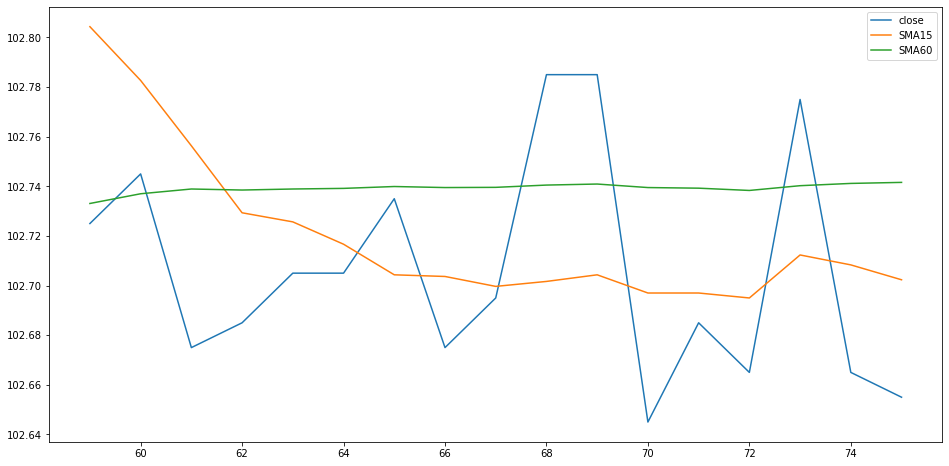

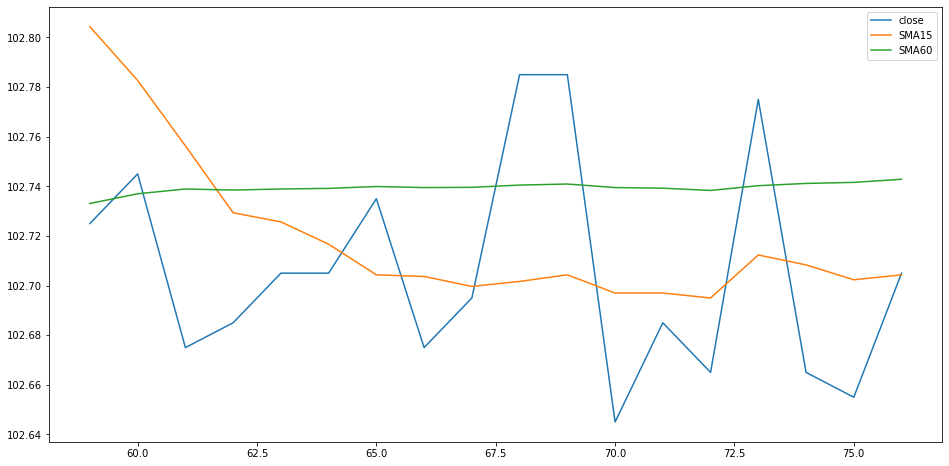

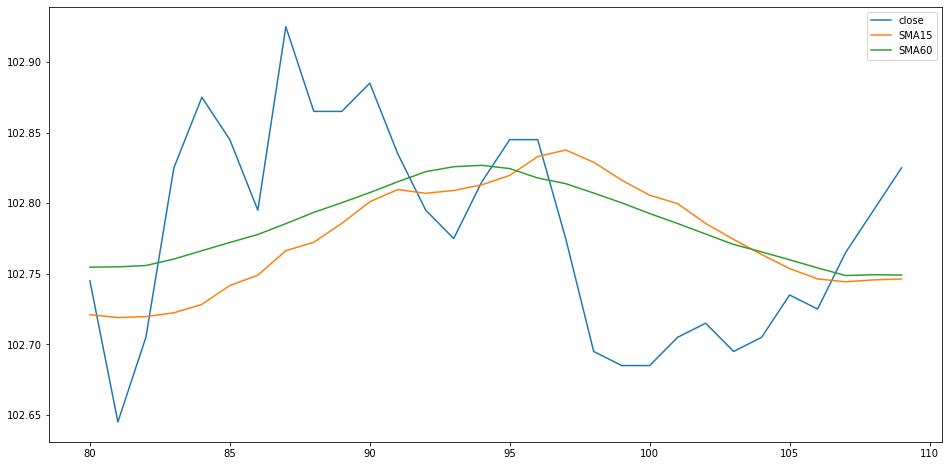

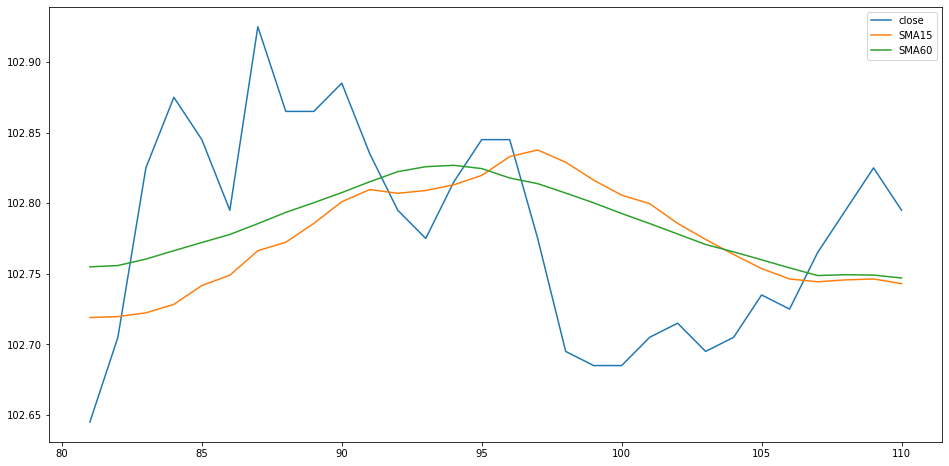

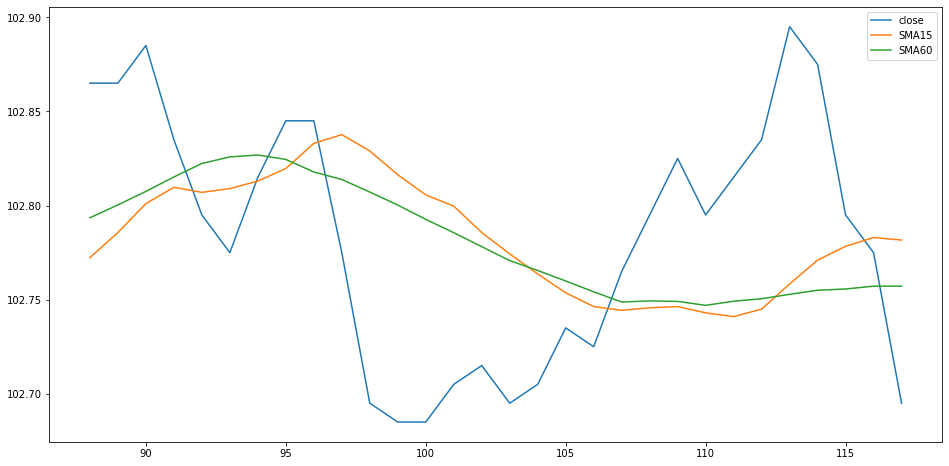

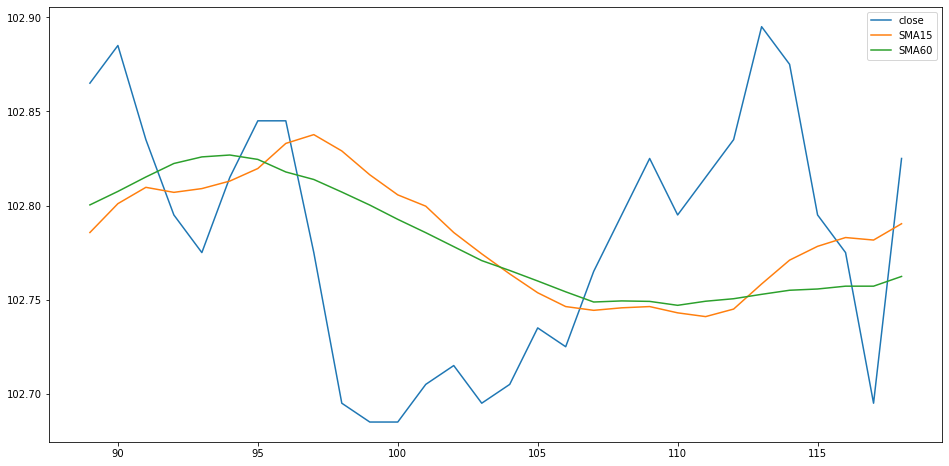

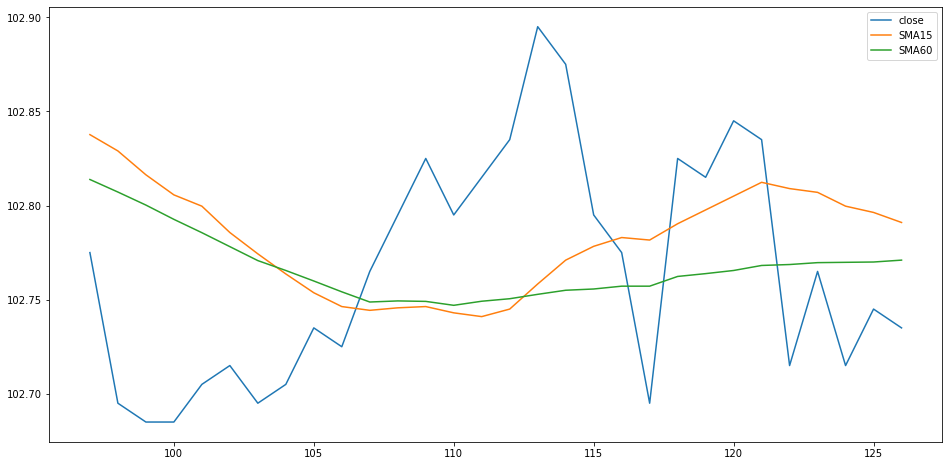

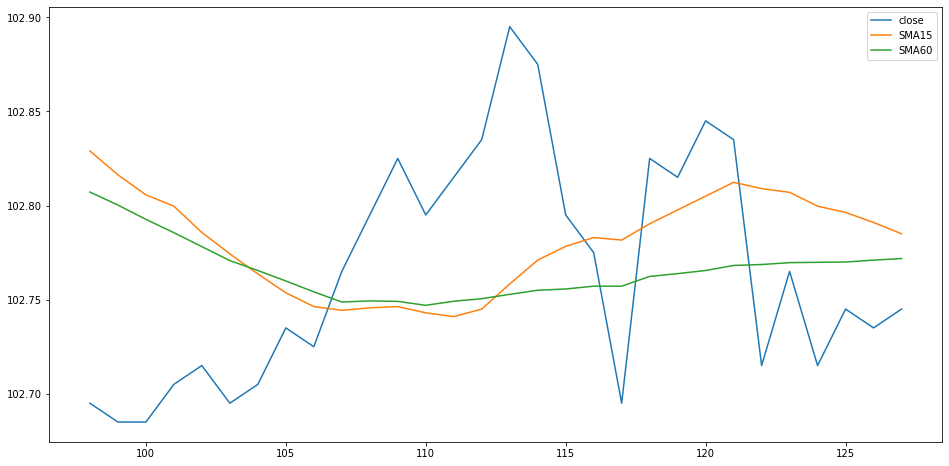

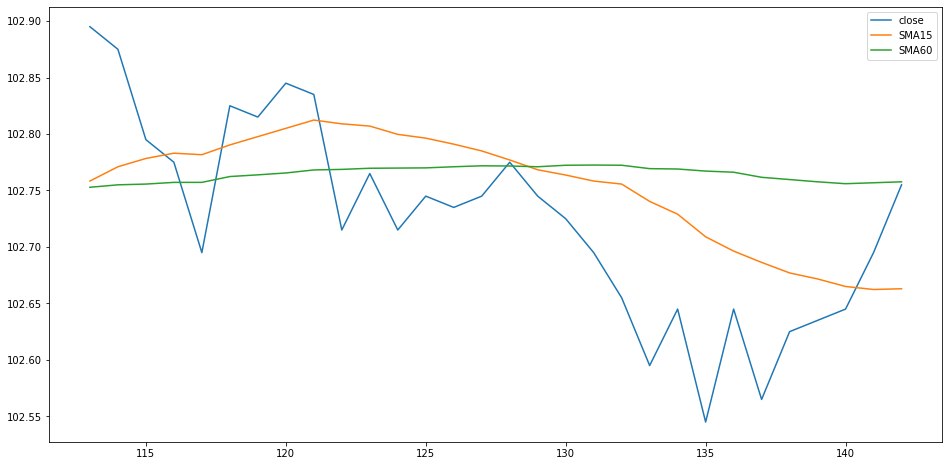

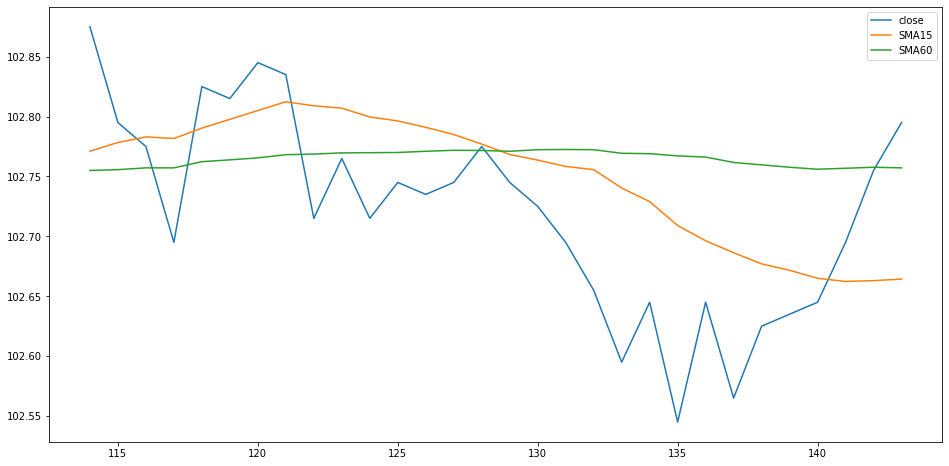

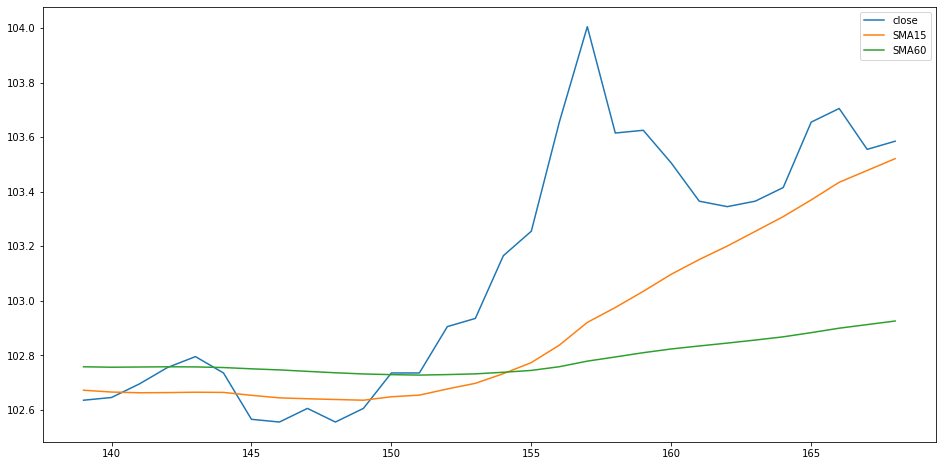

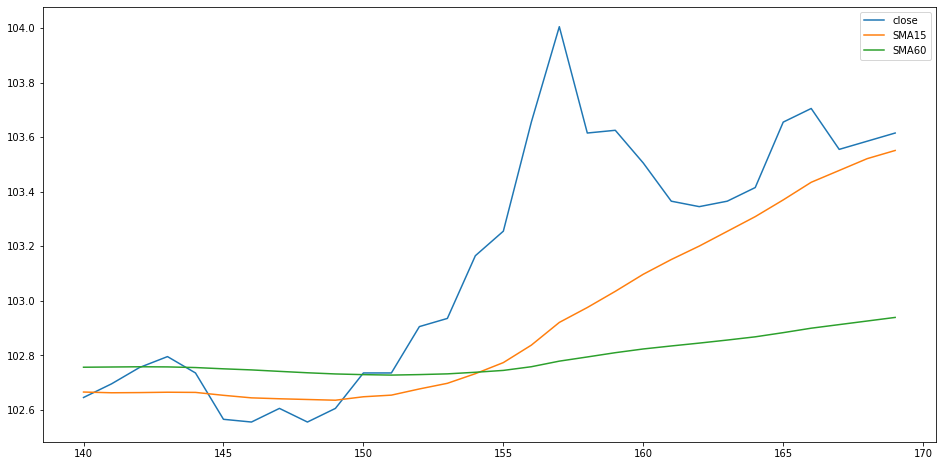

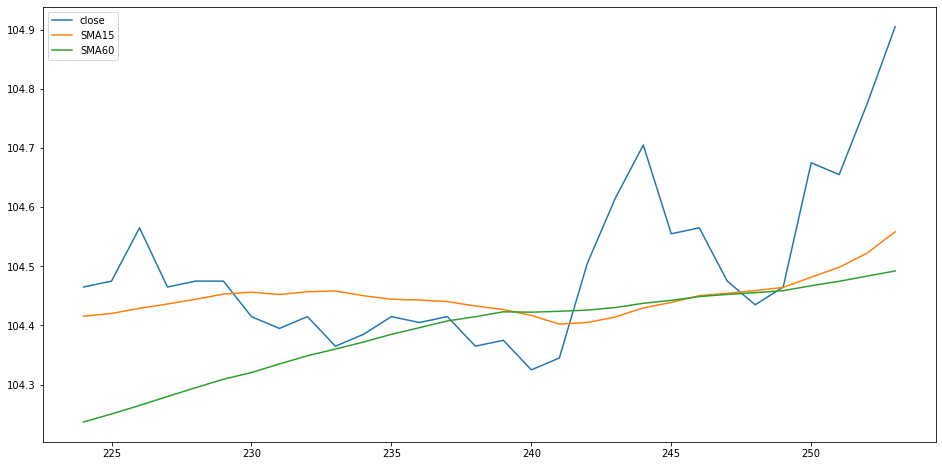

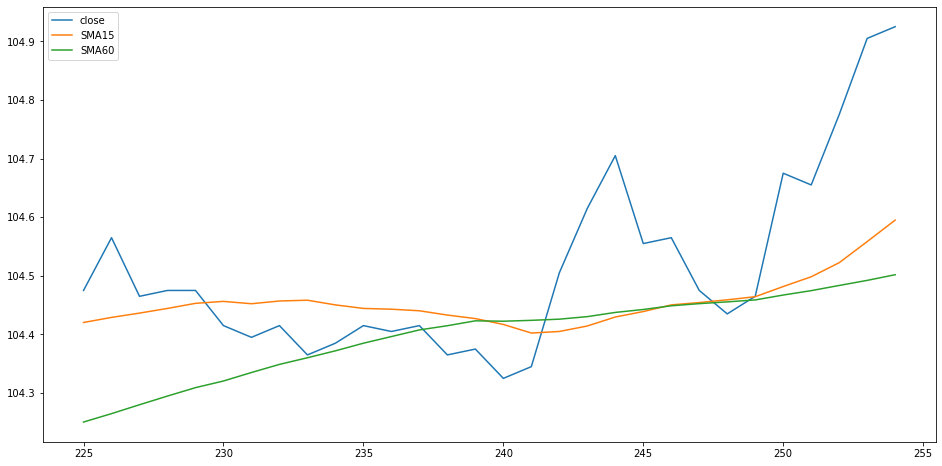

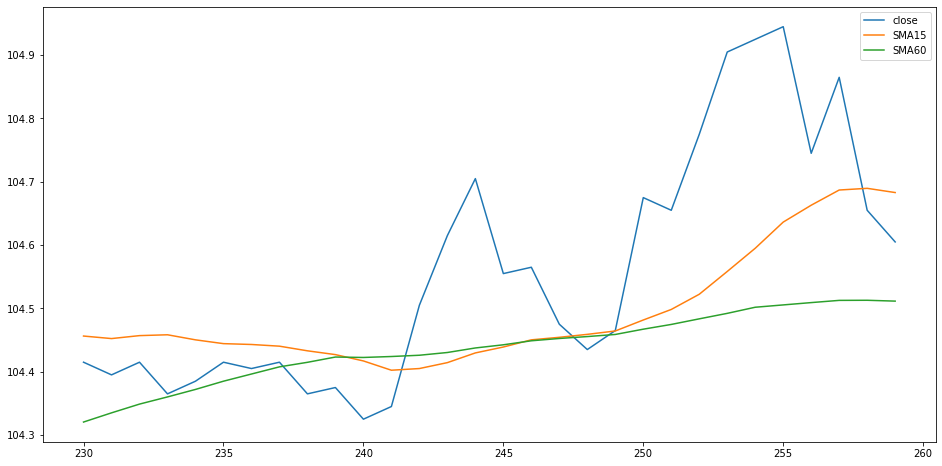

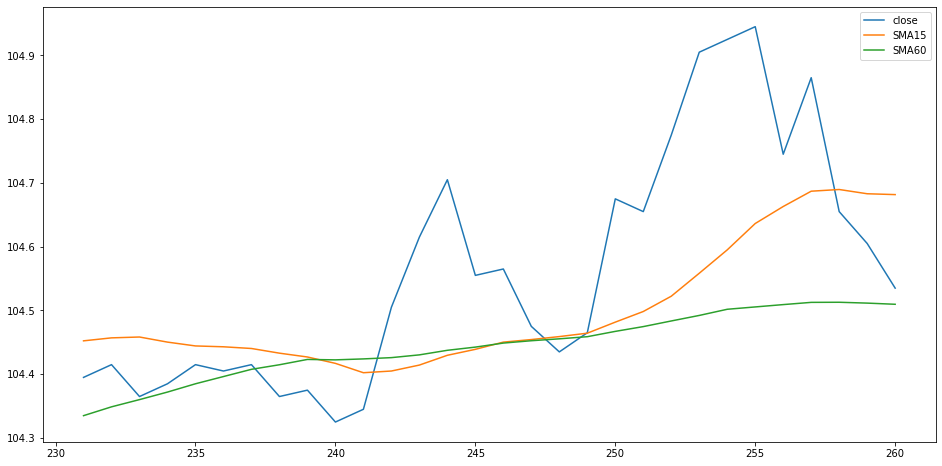

In [146]:
#visualize label yes
import plotly.graph_objects as go
from datetime import datetime
from plotly.subplots import make_subplots

for i in range(0,200):
    if df.iloc[i]['label'] == 'yes':
        dfpl = df[max(0,i-15):i+15]
        dfpl[['close', 'SMA15','SMA60']].plot(figsize=(16, 8))

/Users/shenyan/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


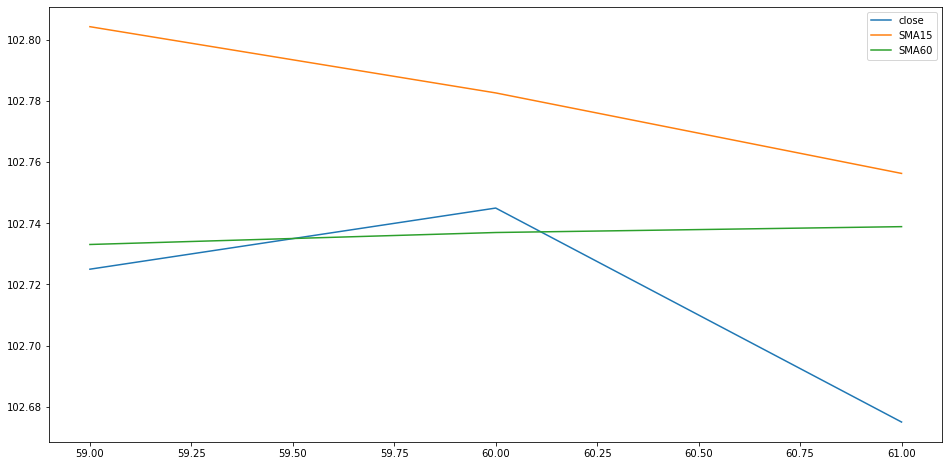

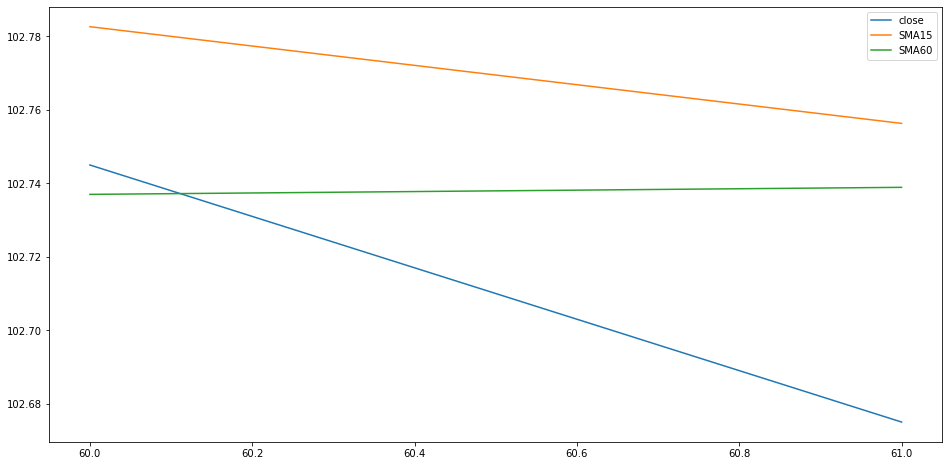

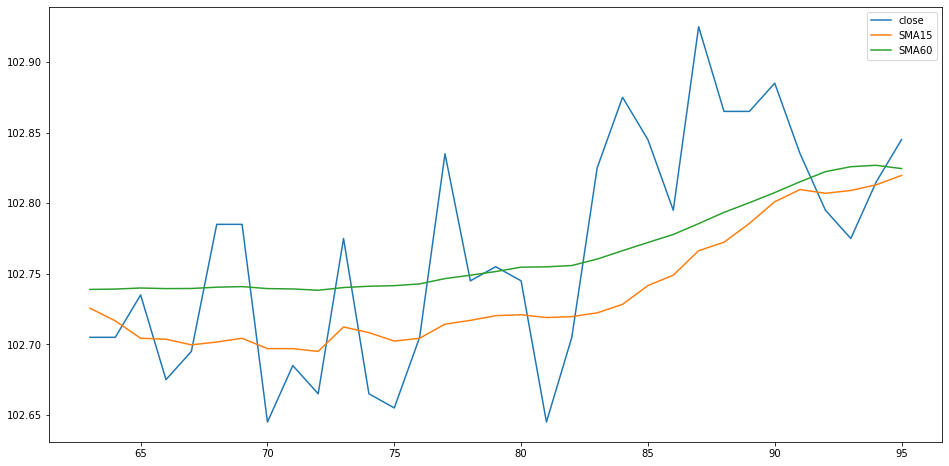

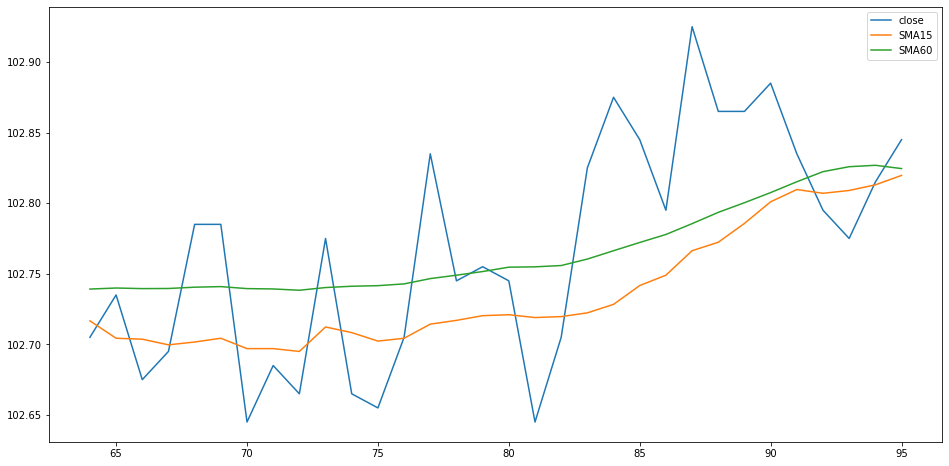

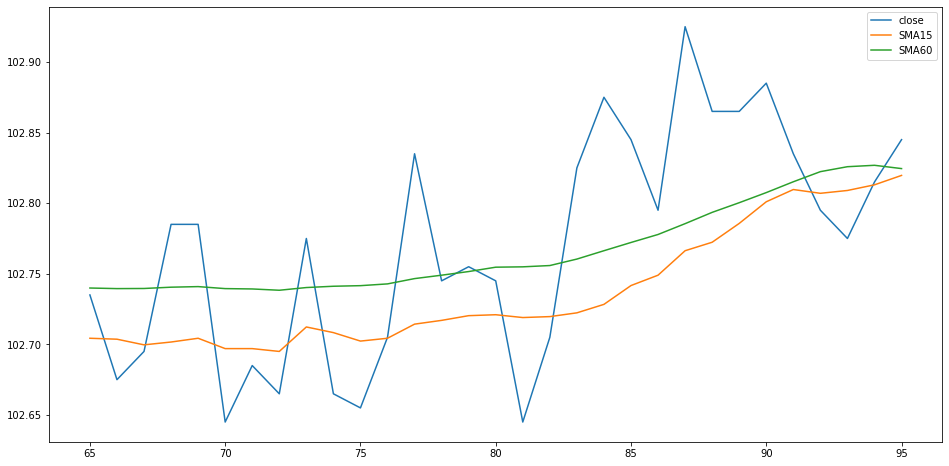

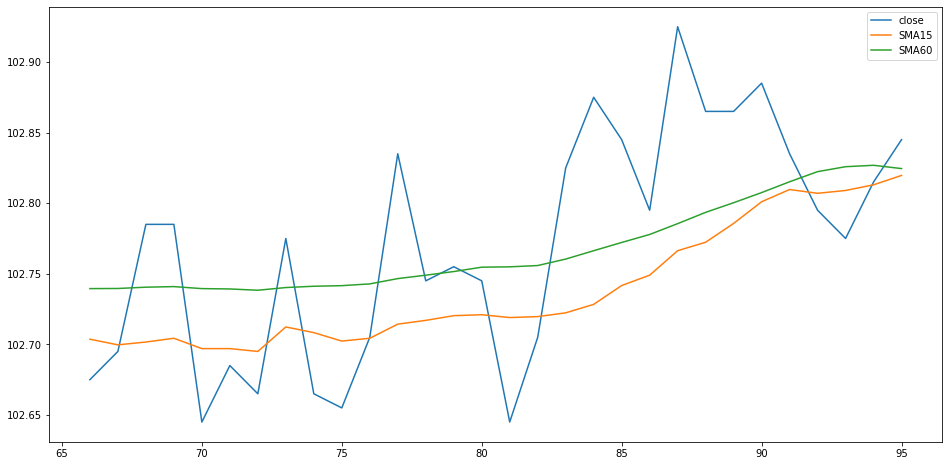

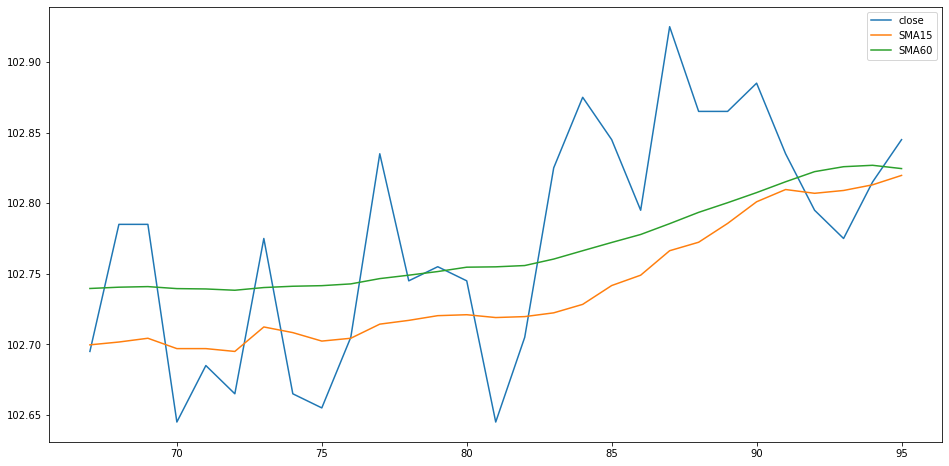

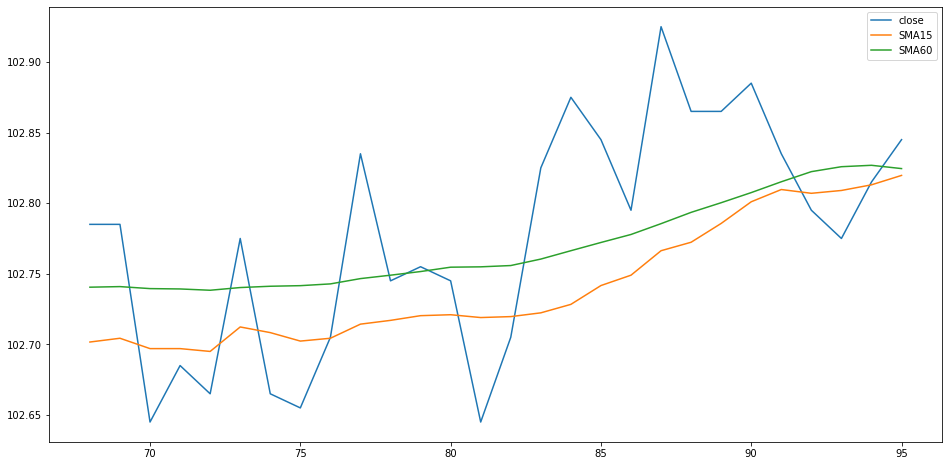

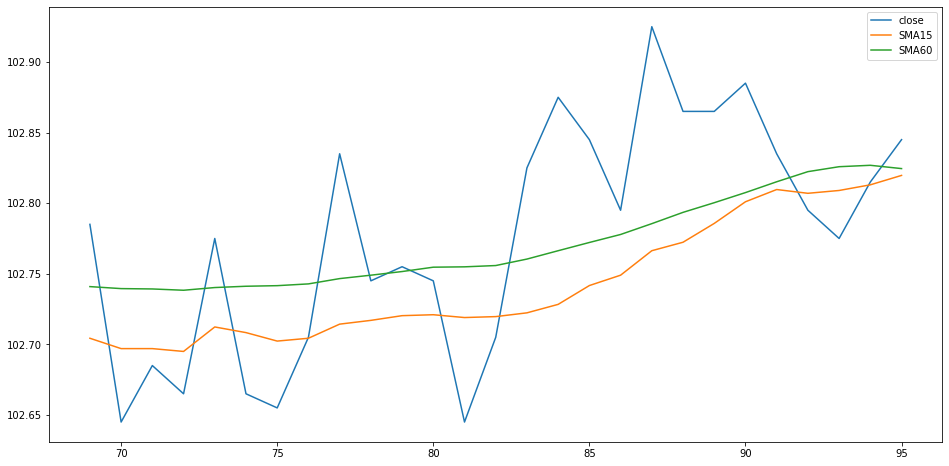

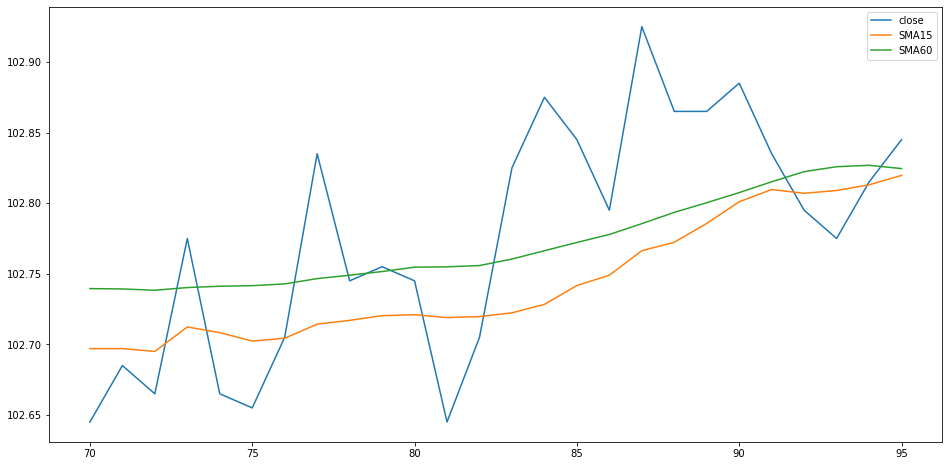

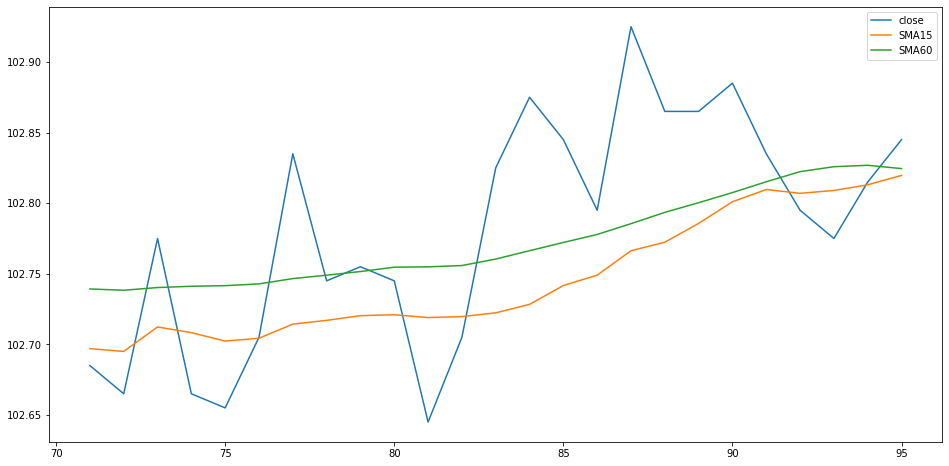

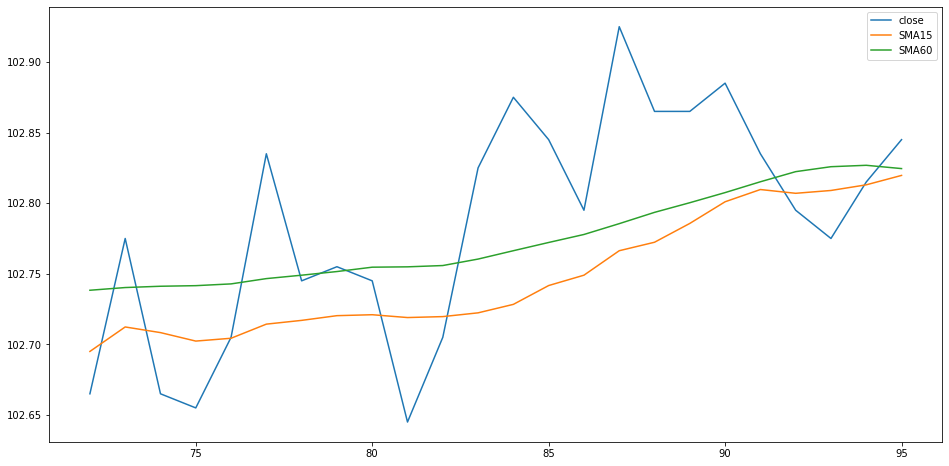

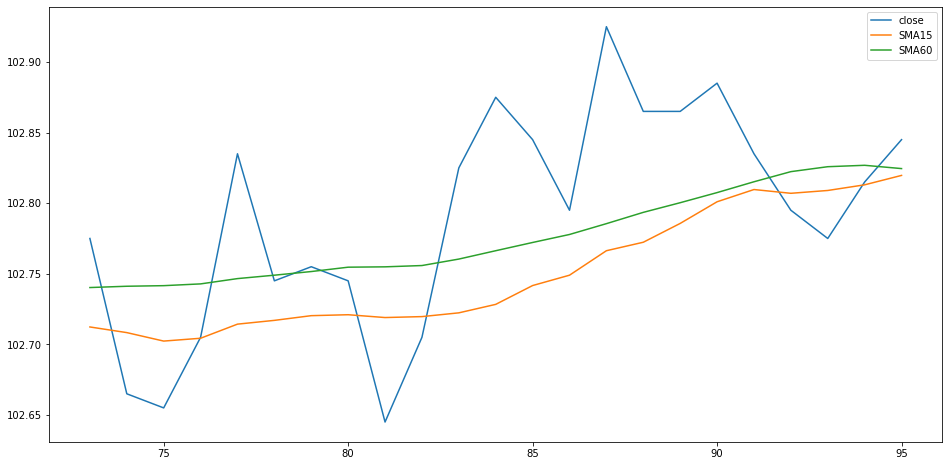

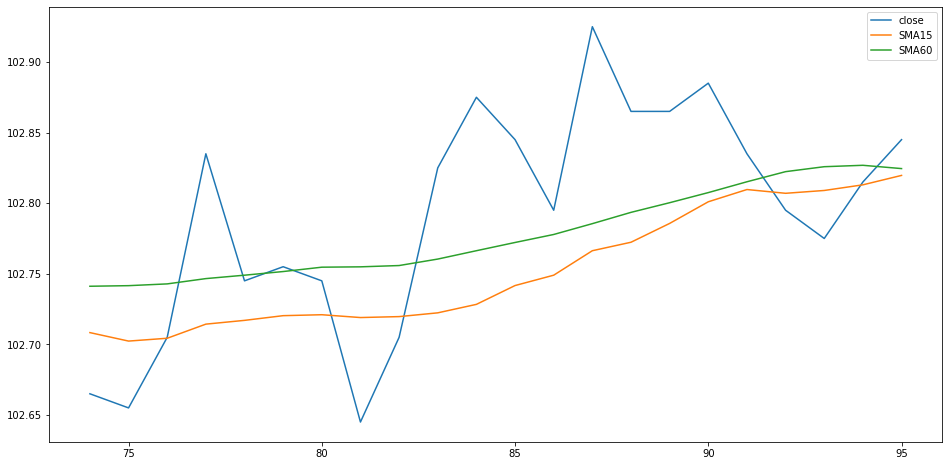

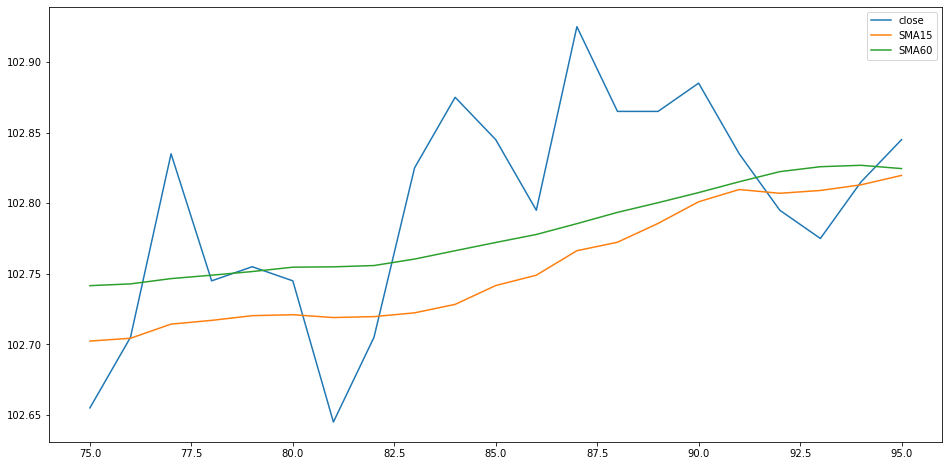

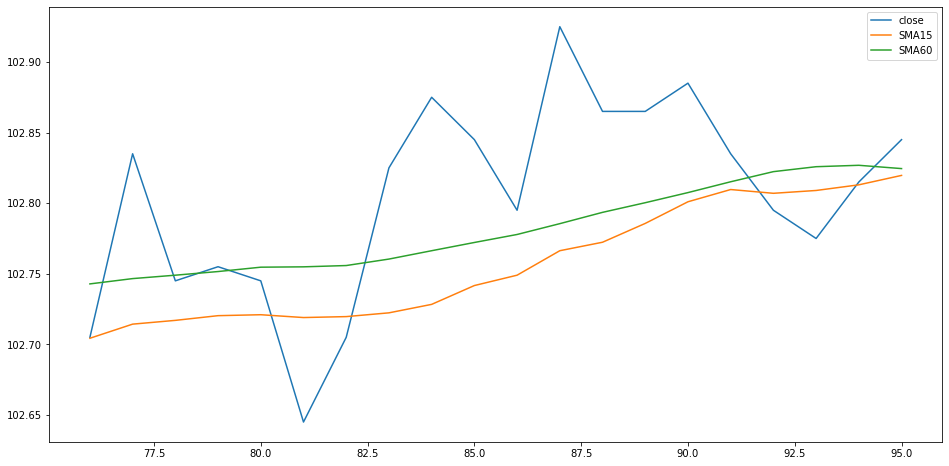

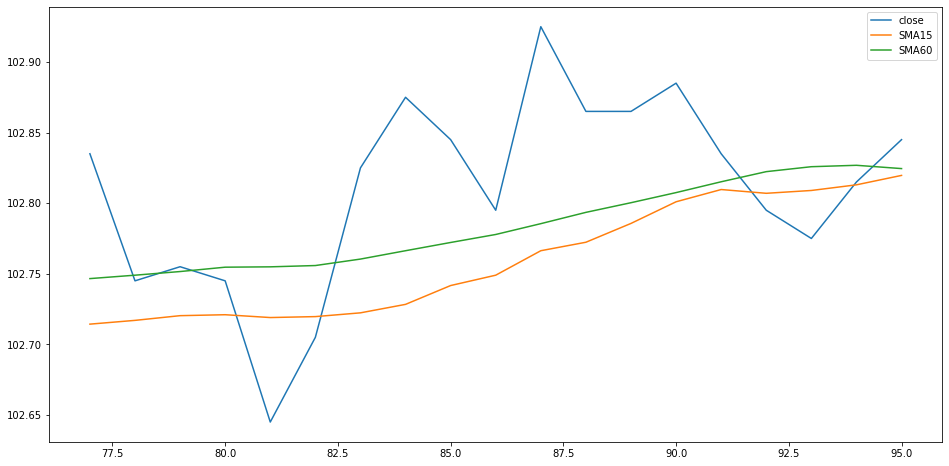

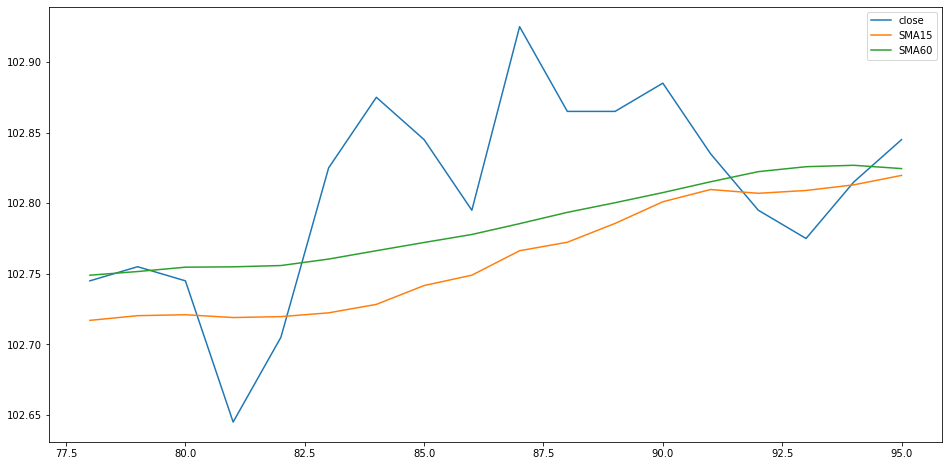

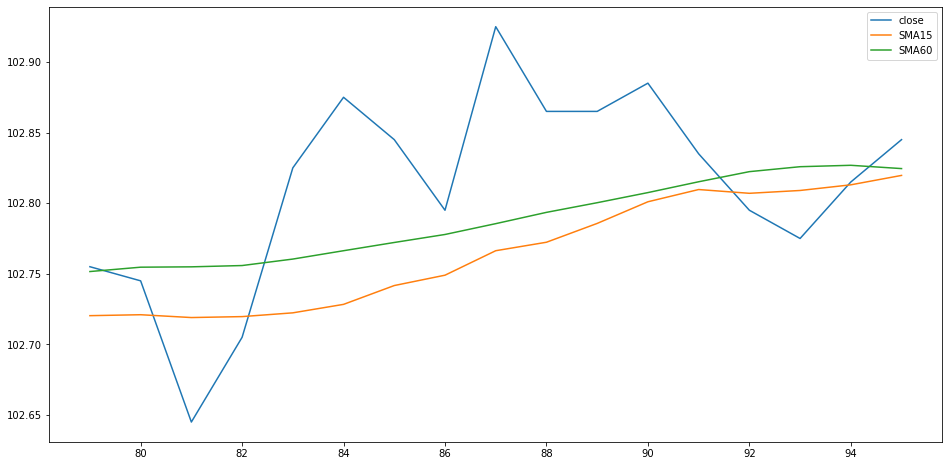

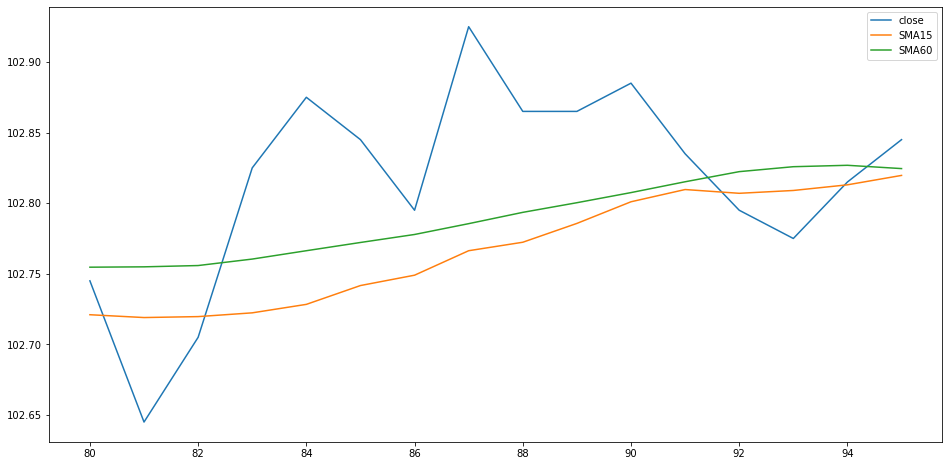

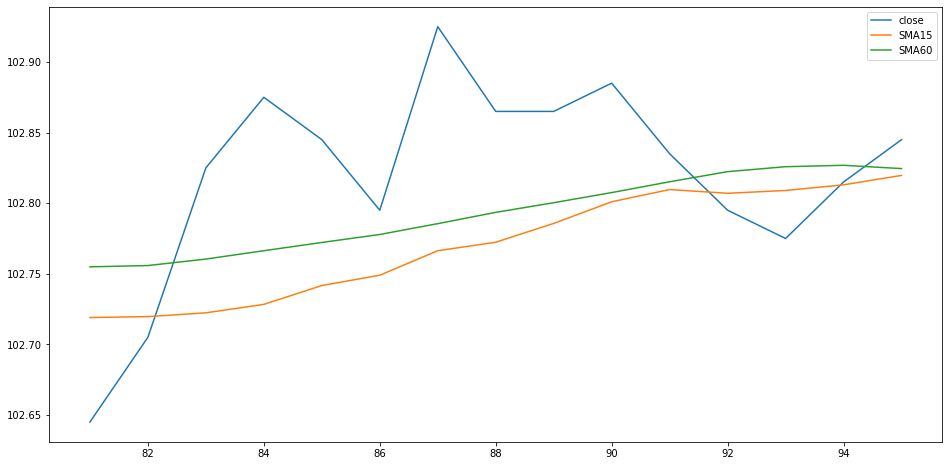

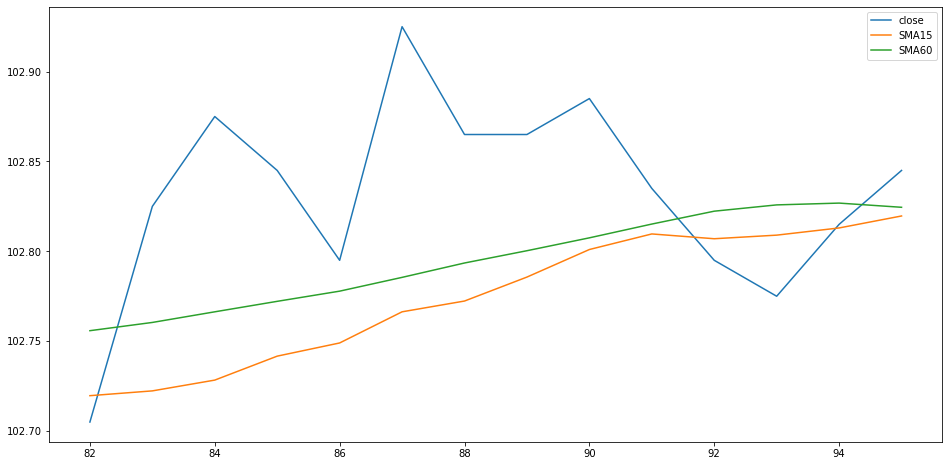

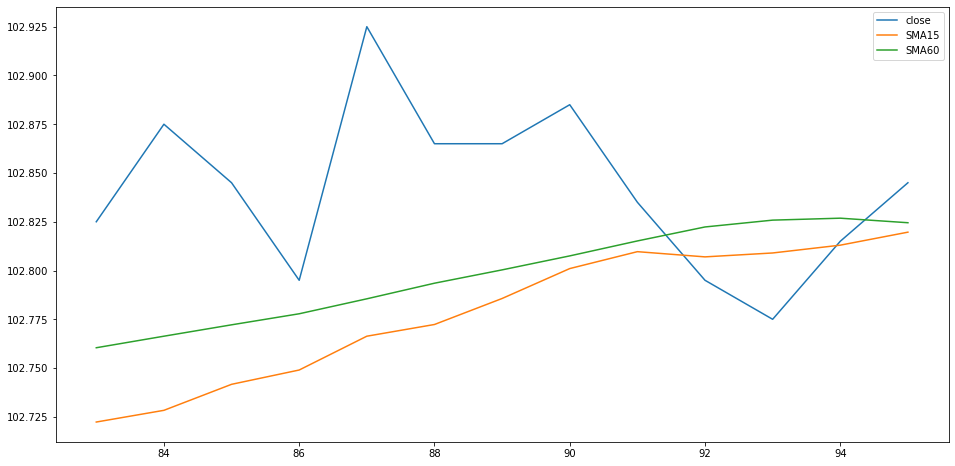

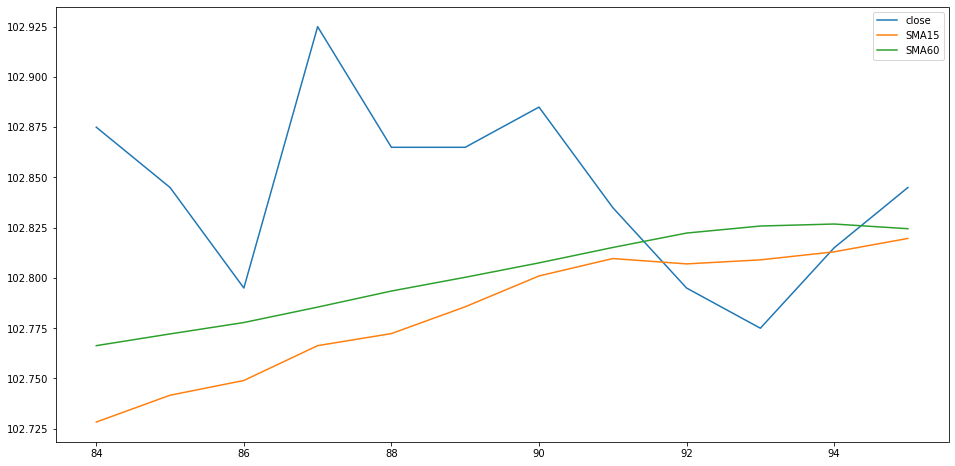

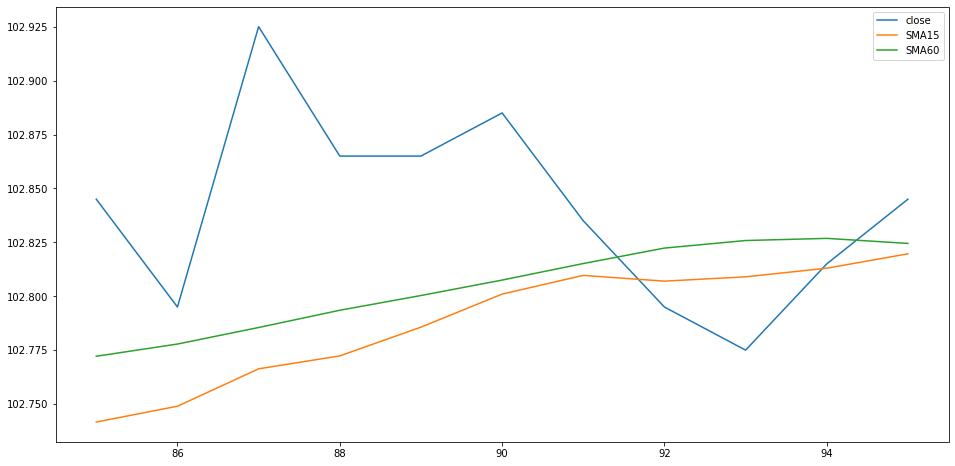

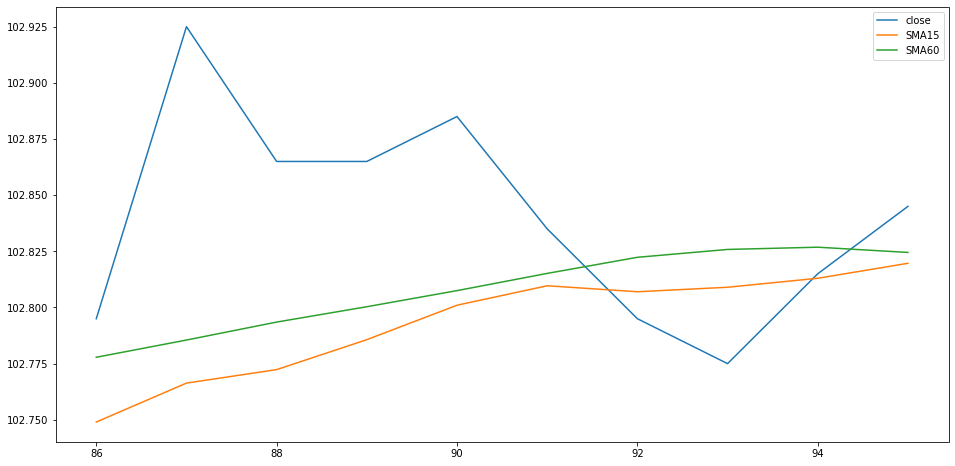

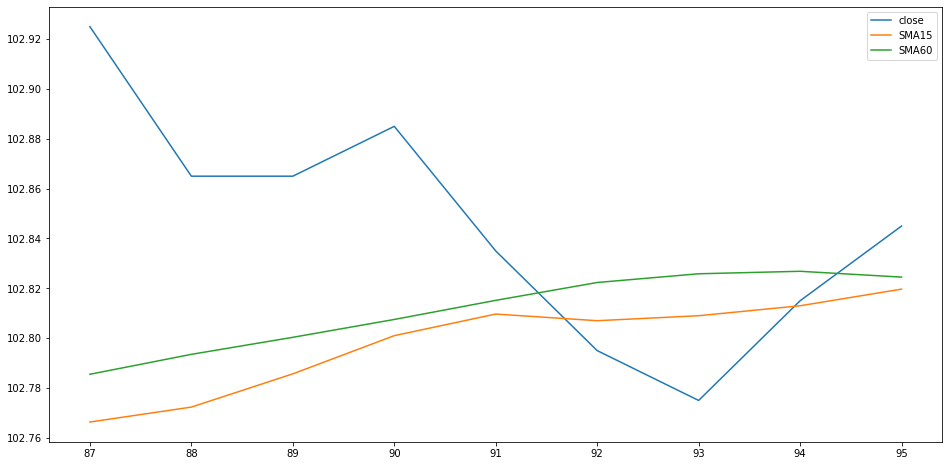

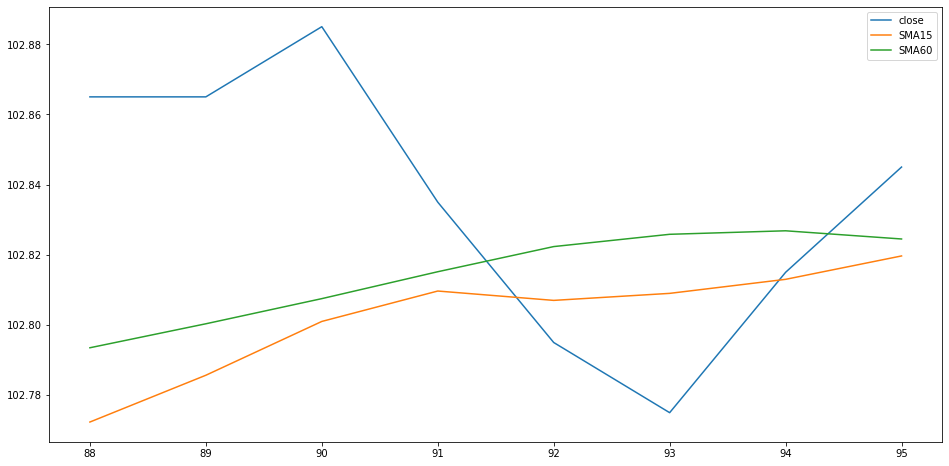

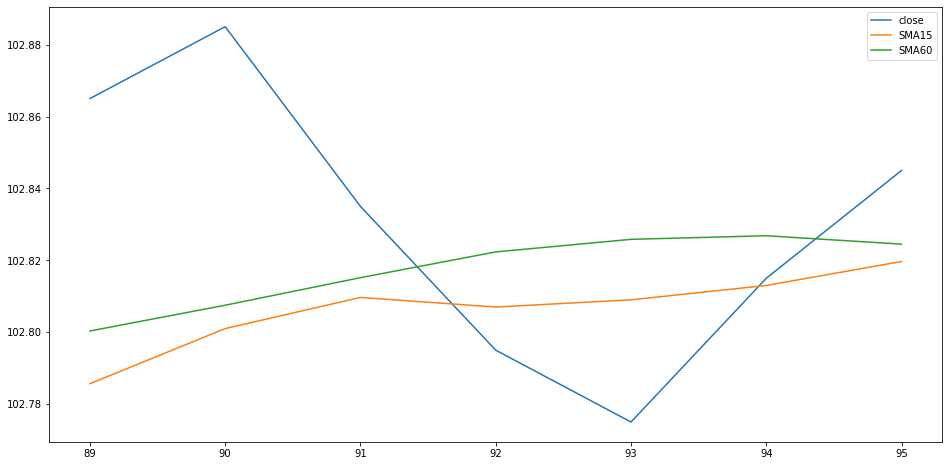

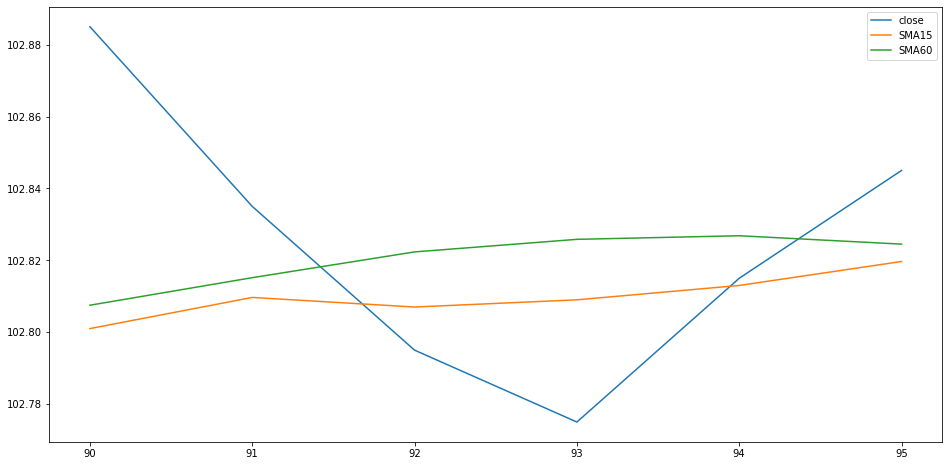

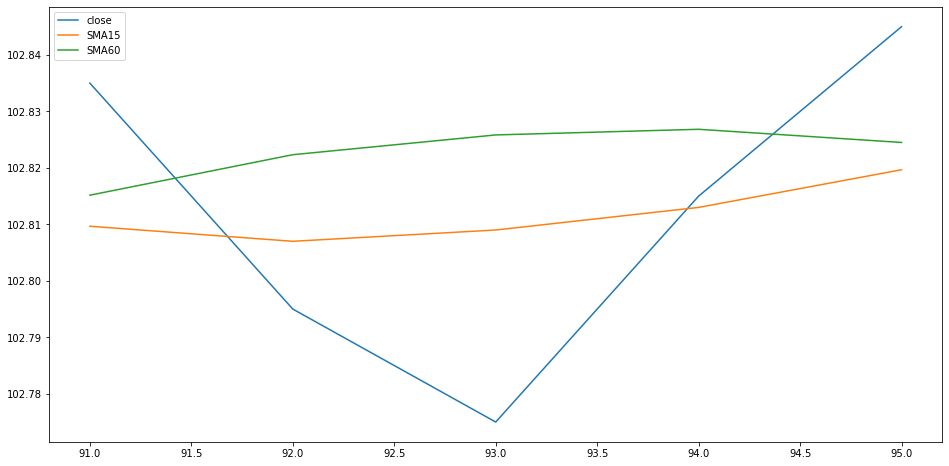

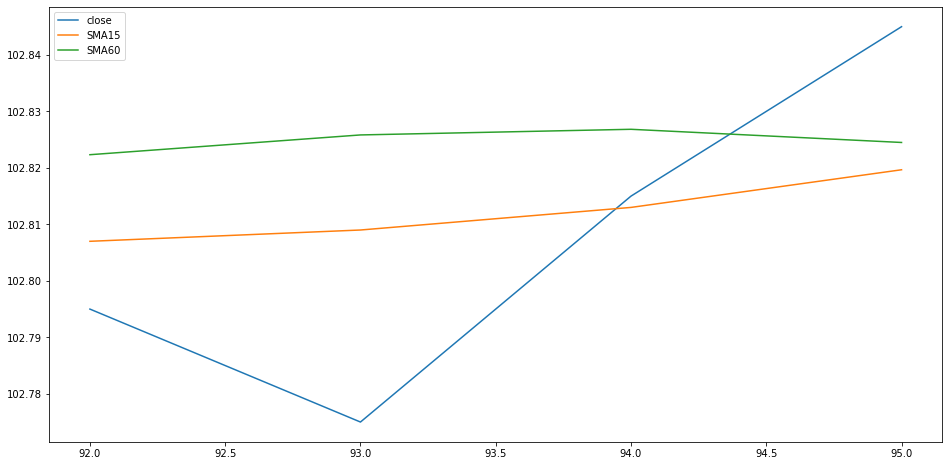

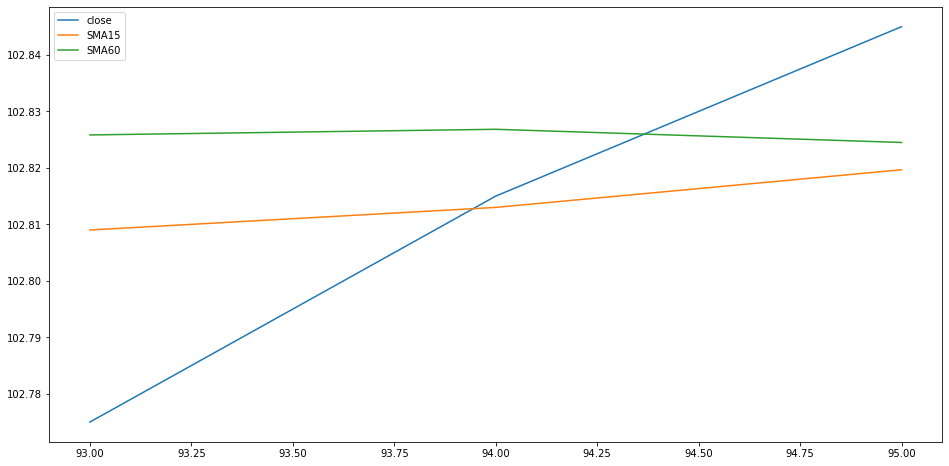

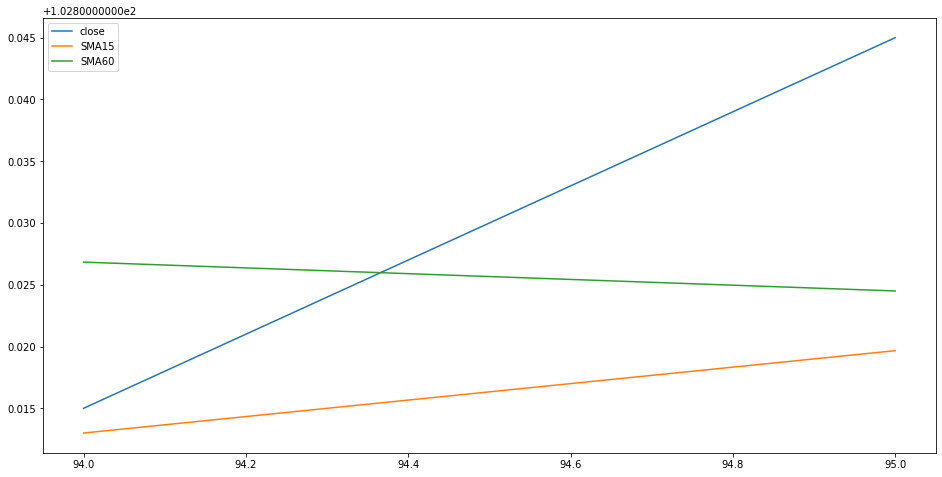

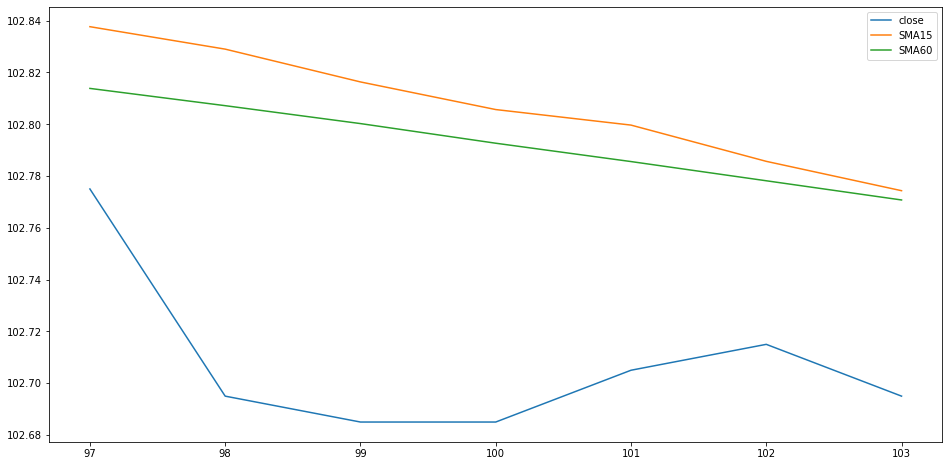

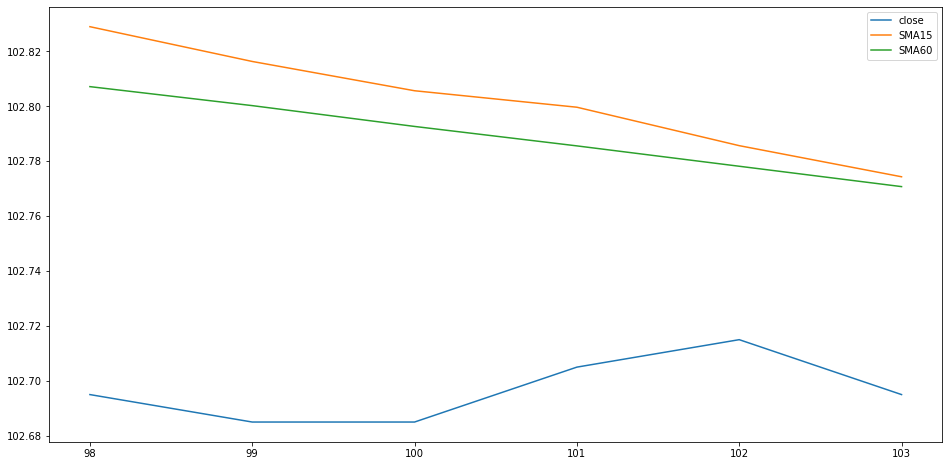

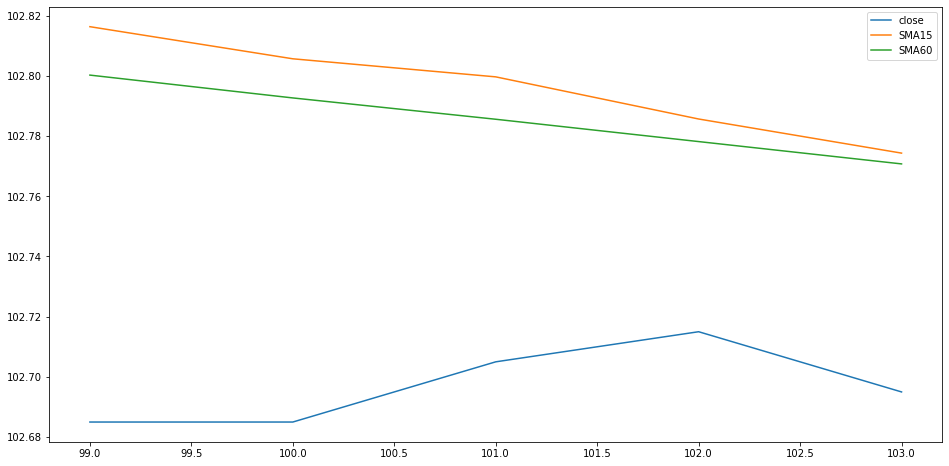

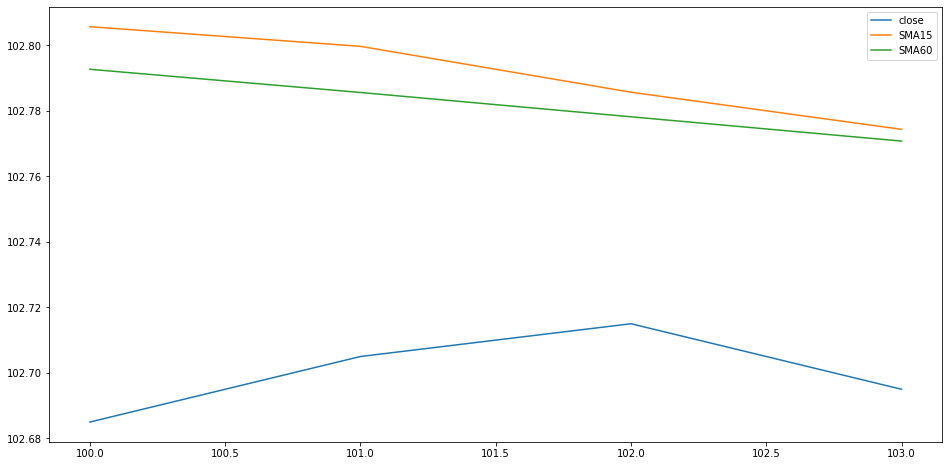

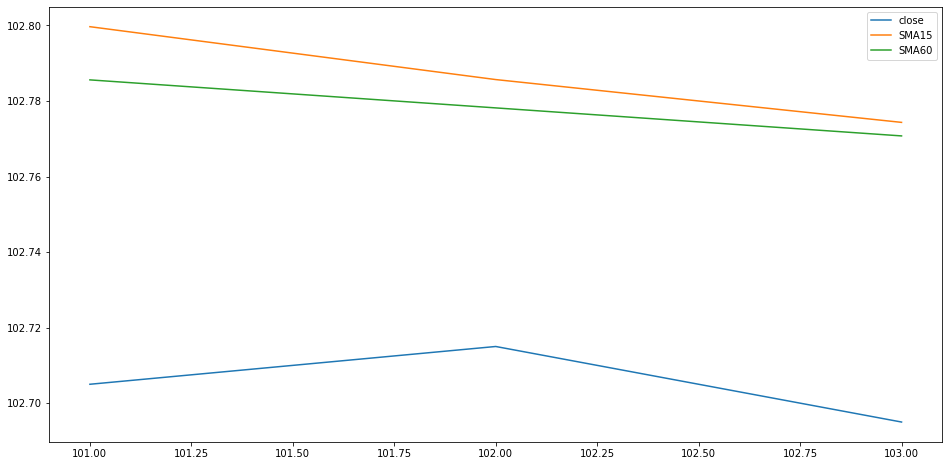

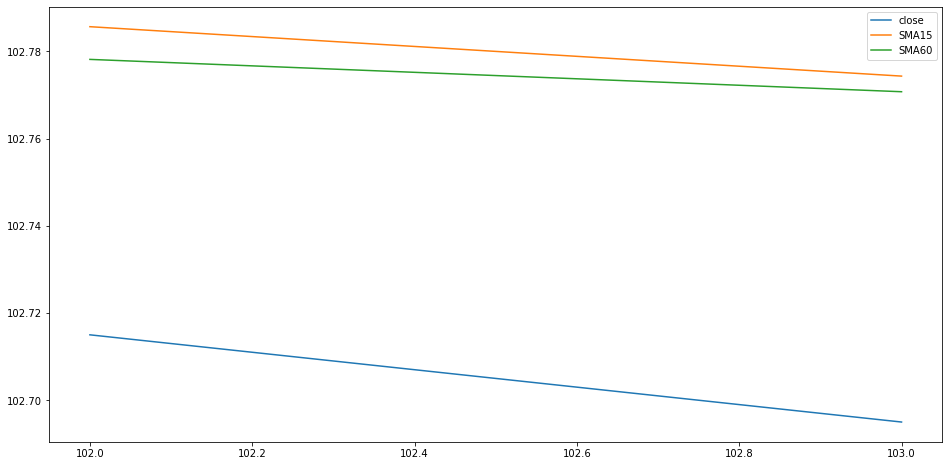

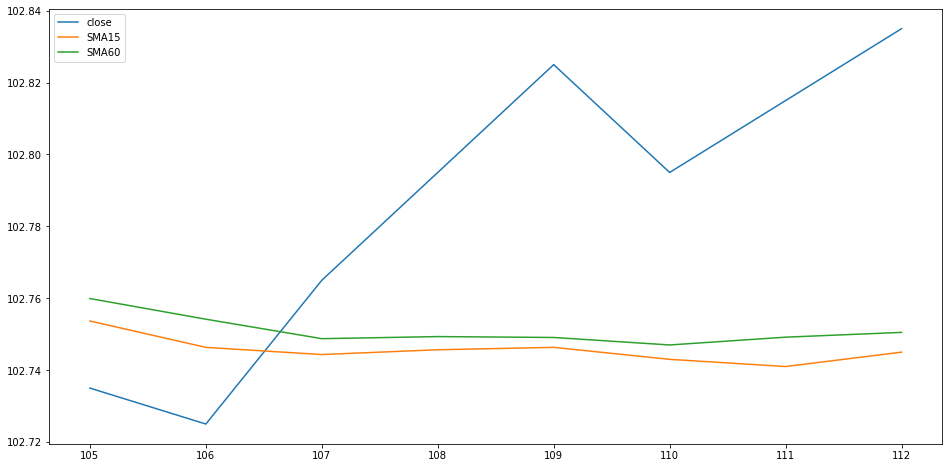

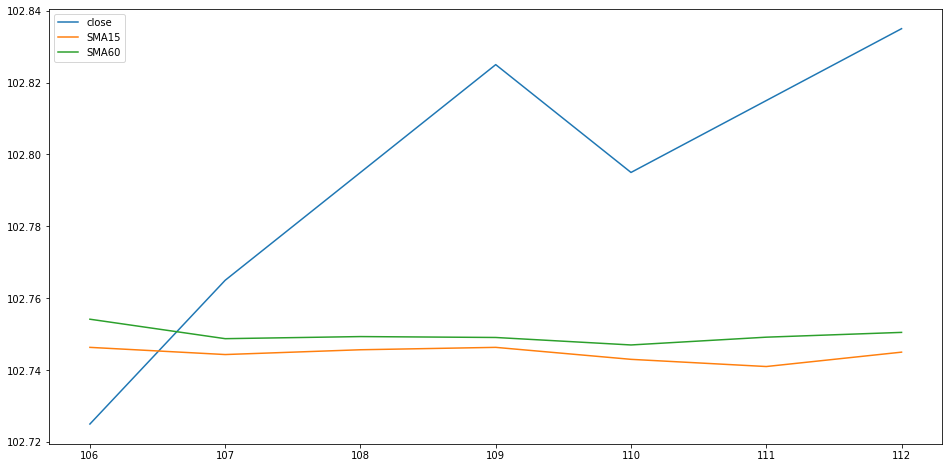

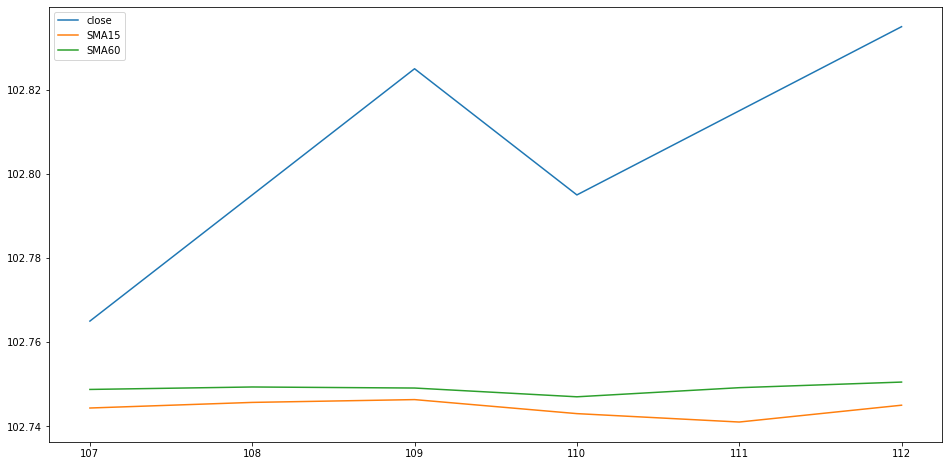

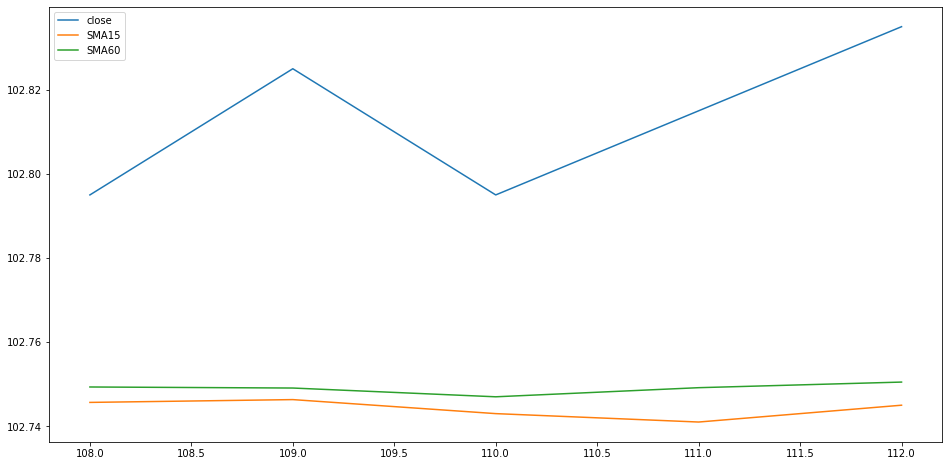

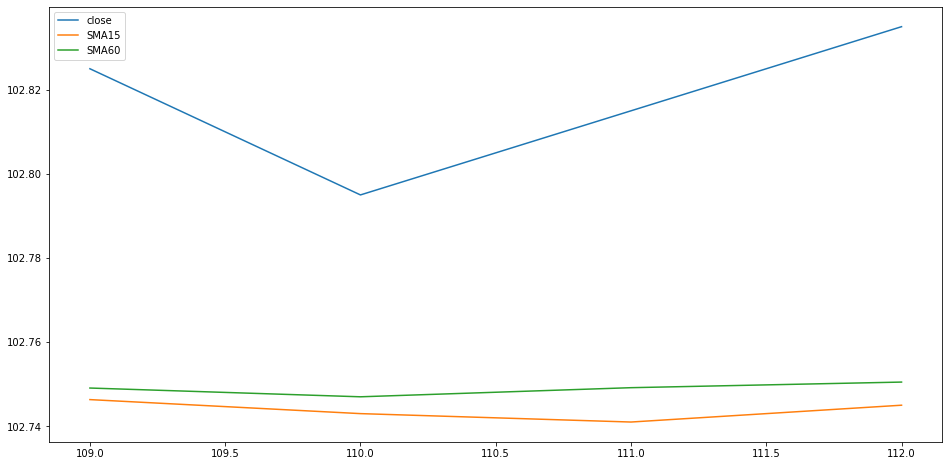

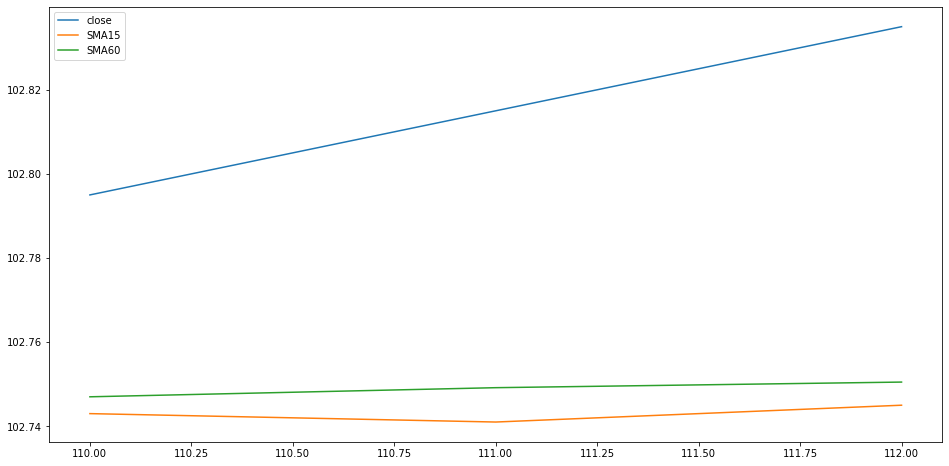

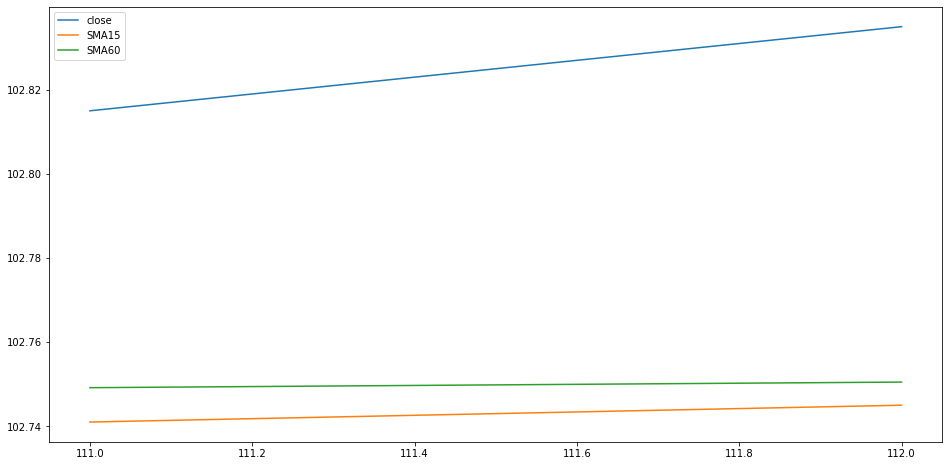

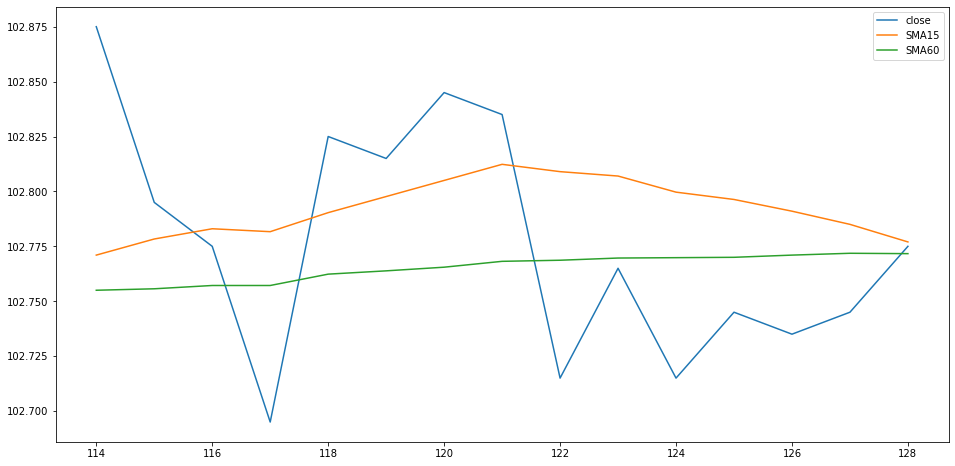

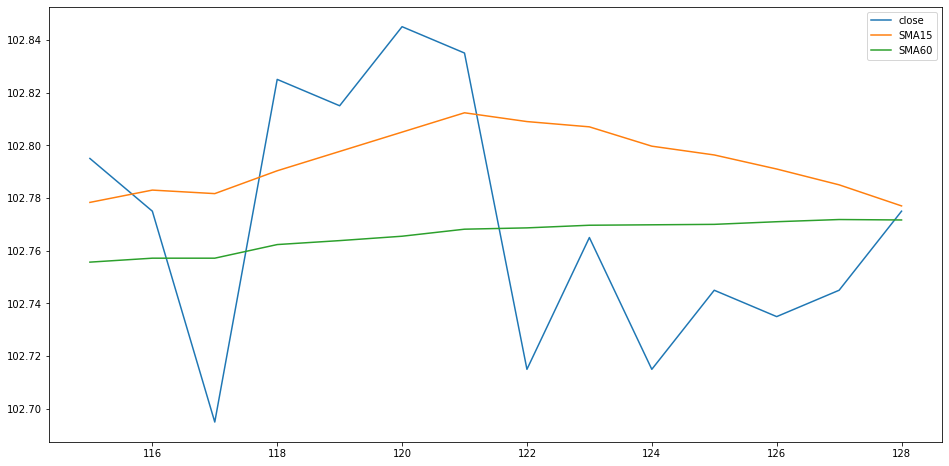

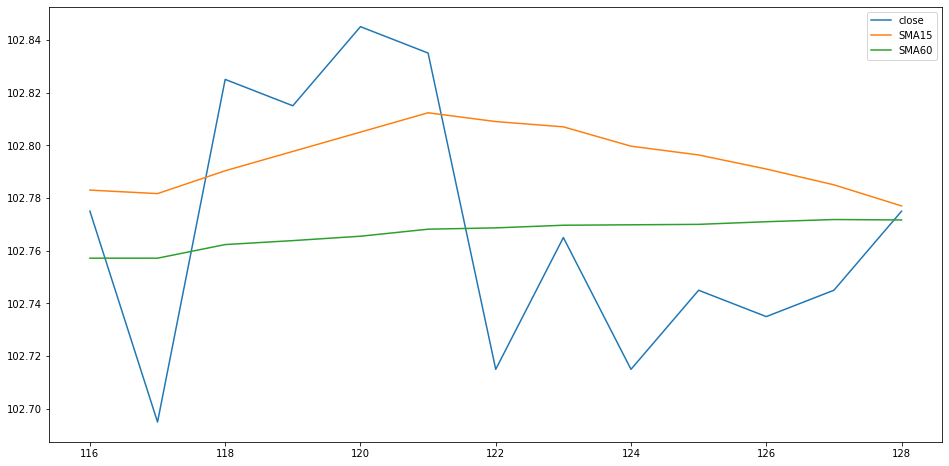

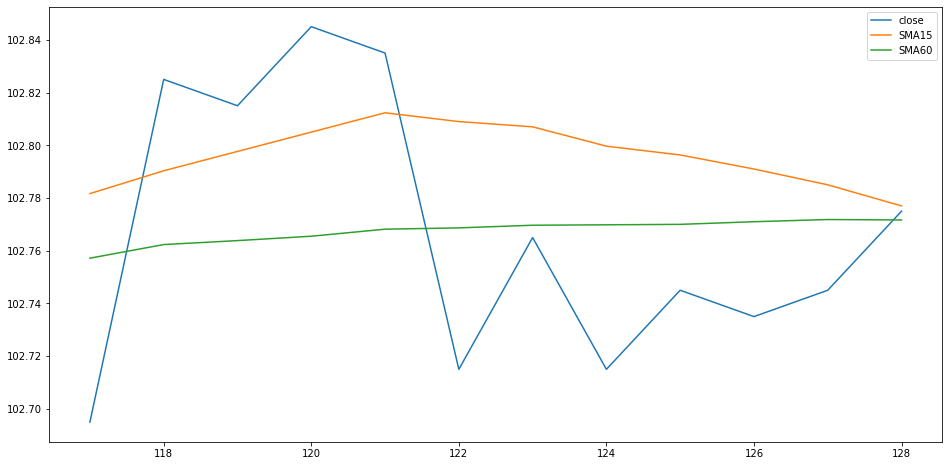

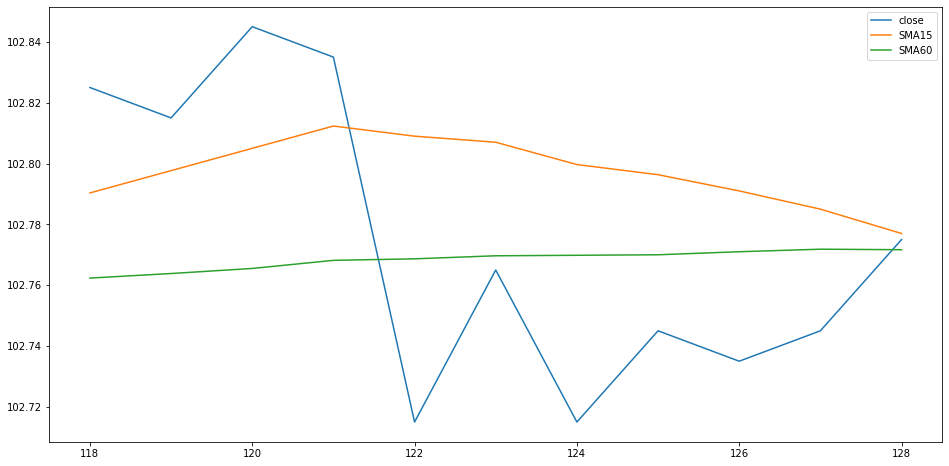

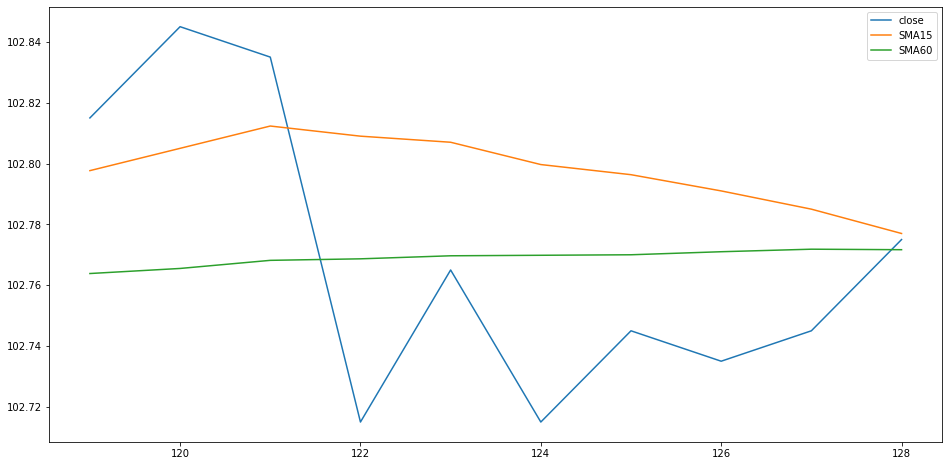

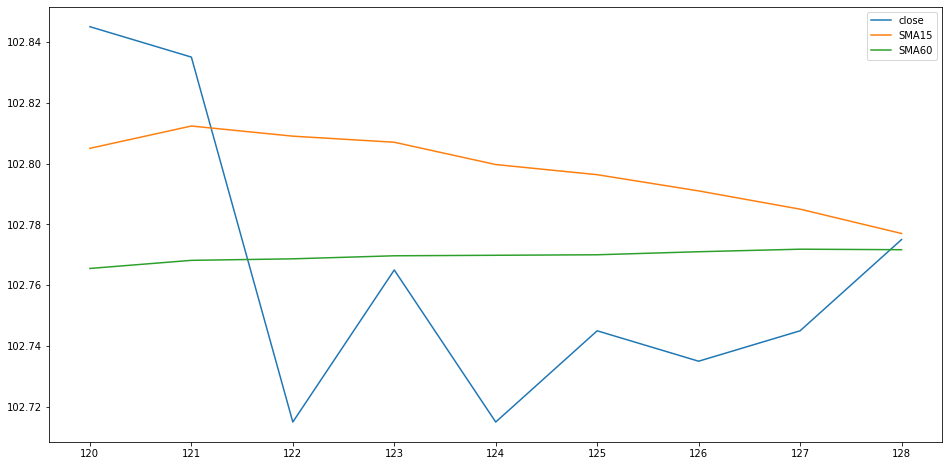

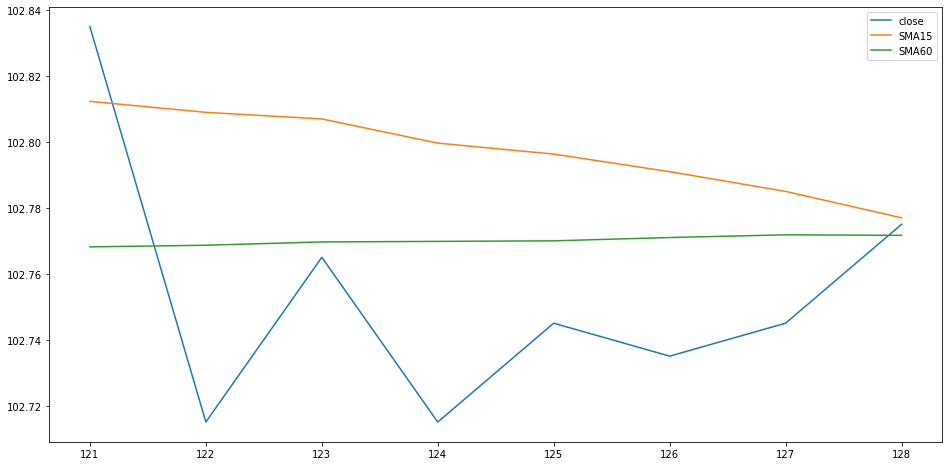

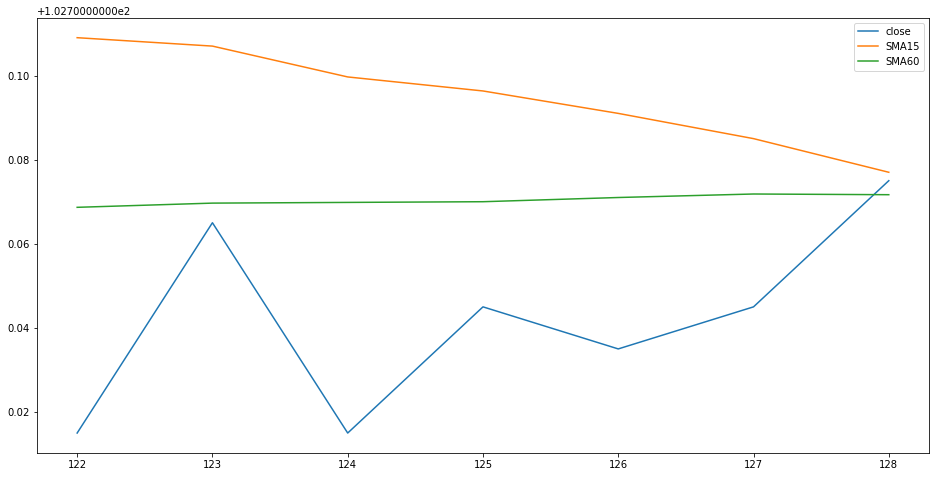

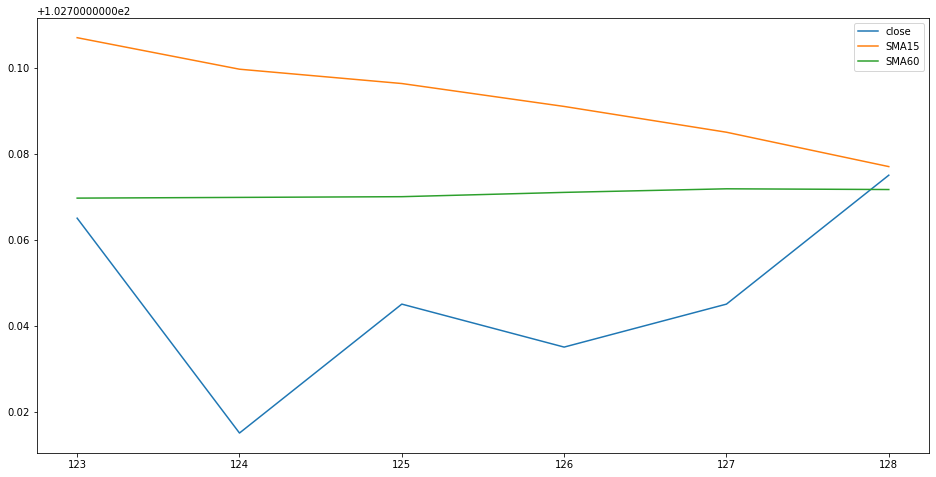

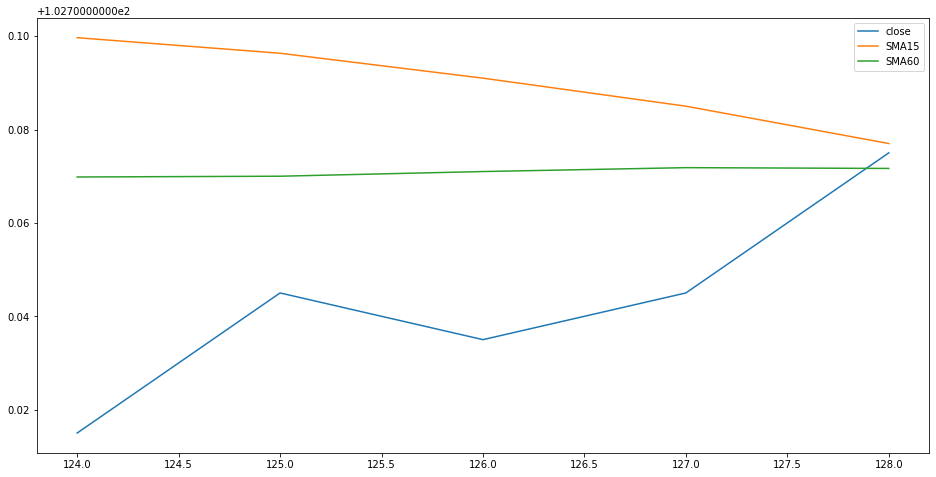

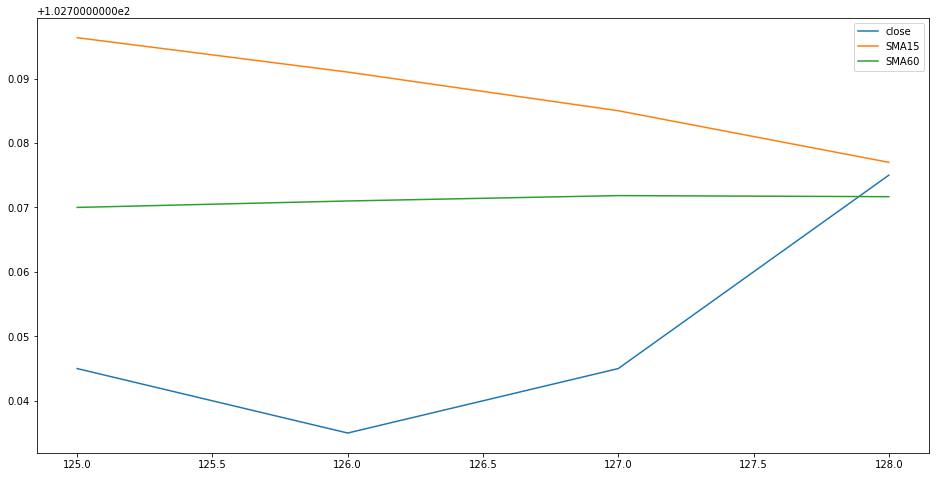

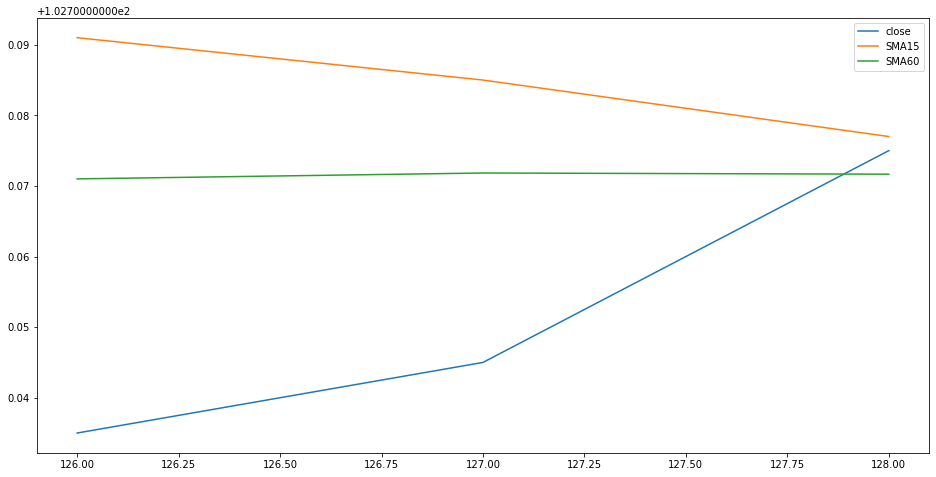

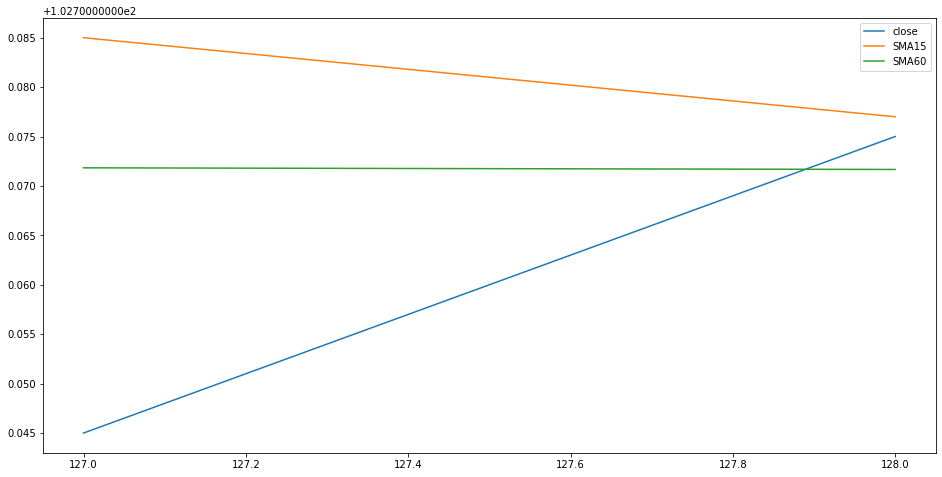

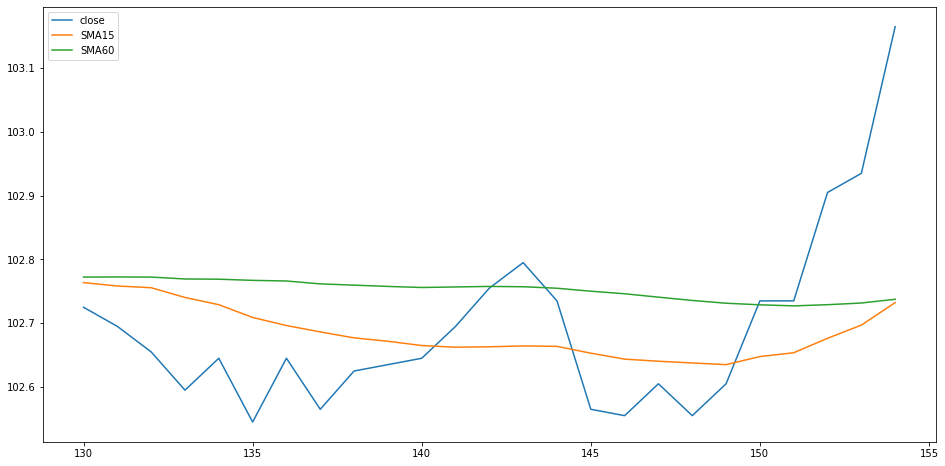

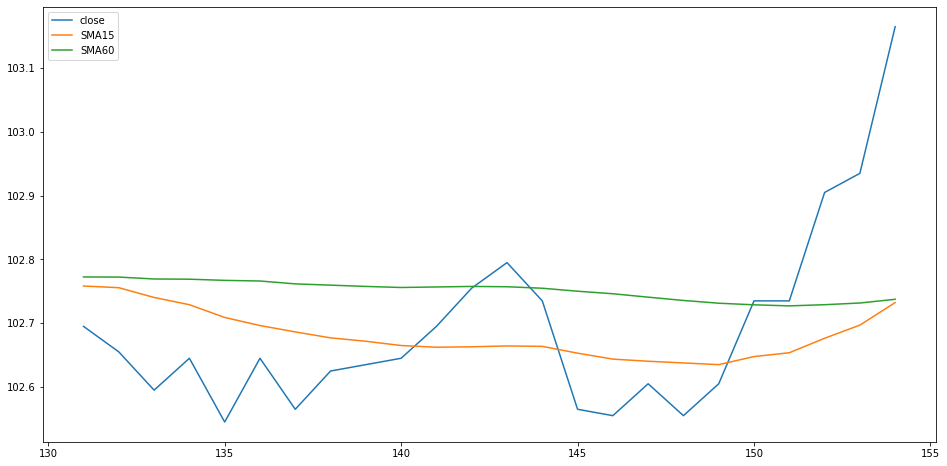

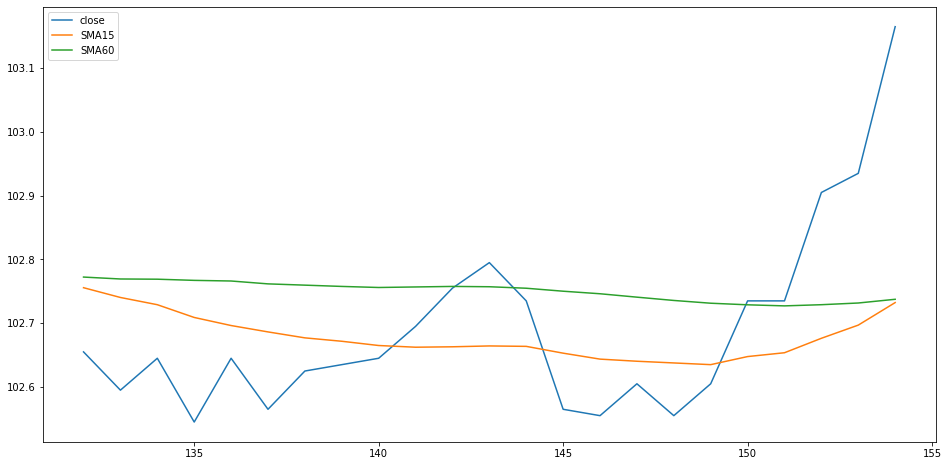

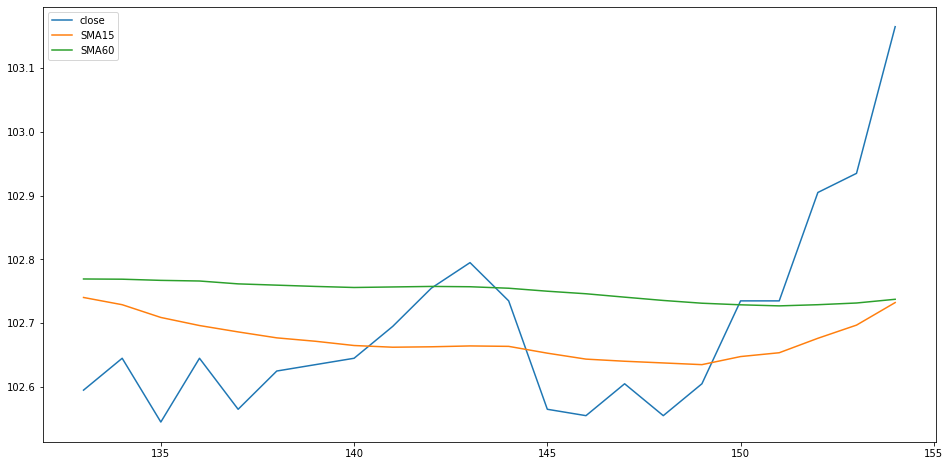

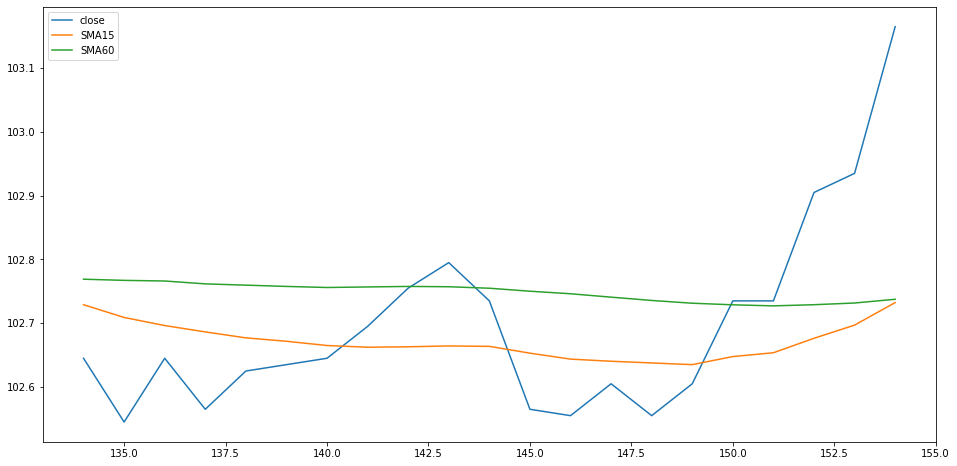

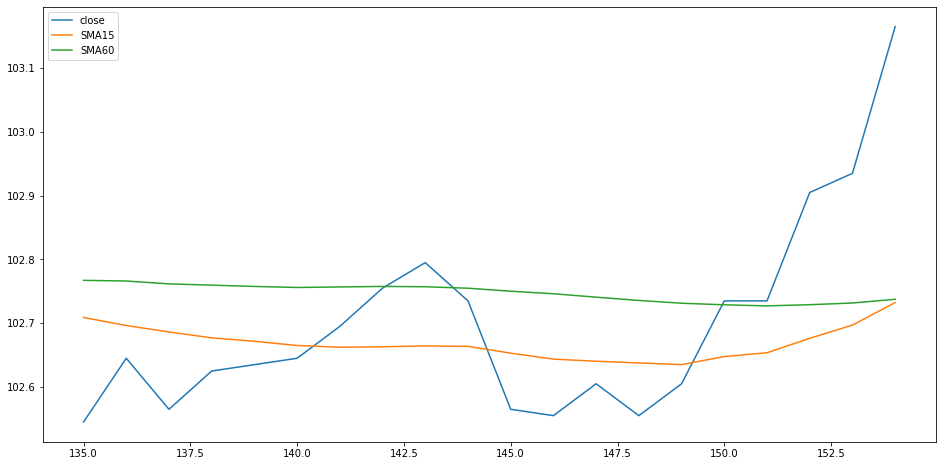

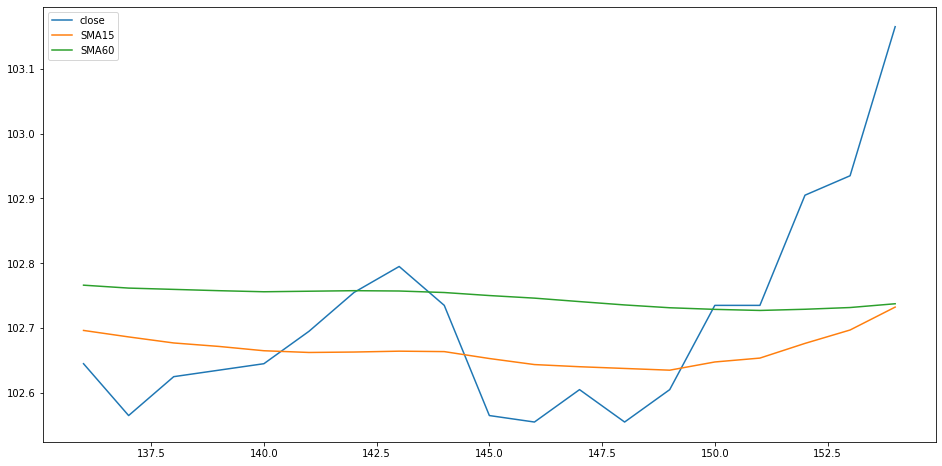

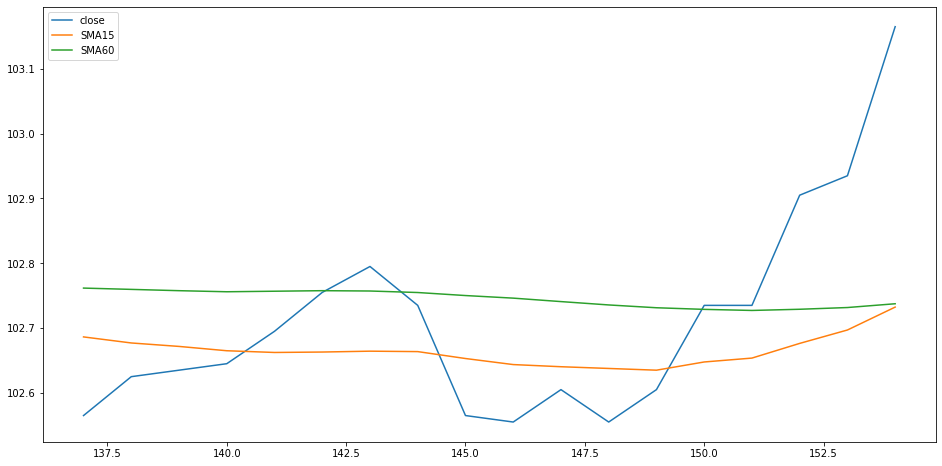

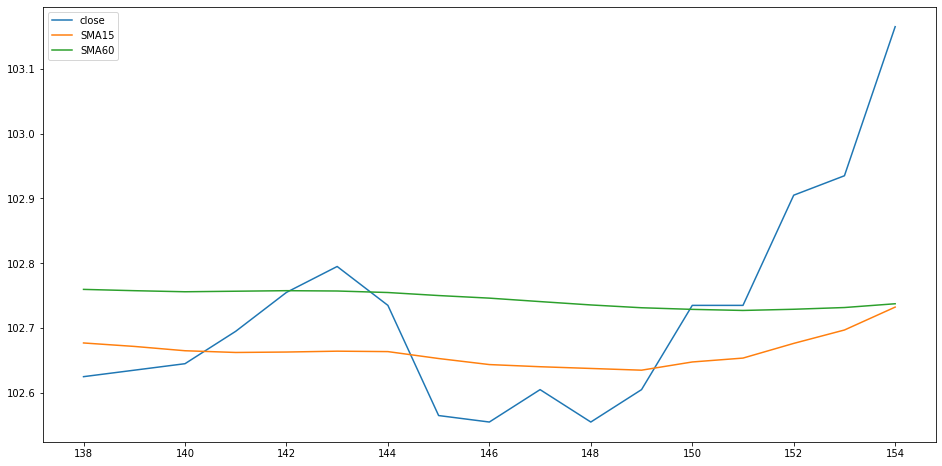

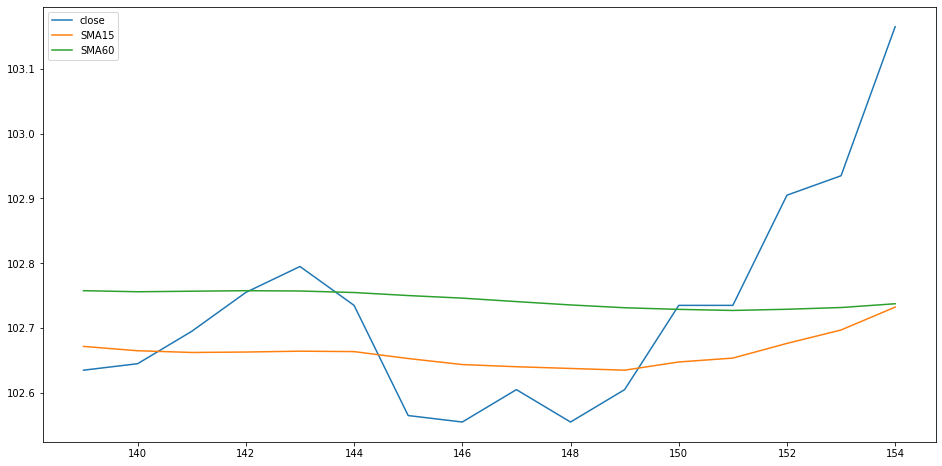

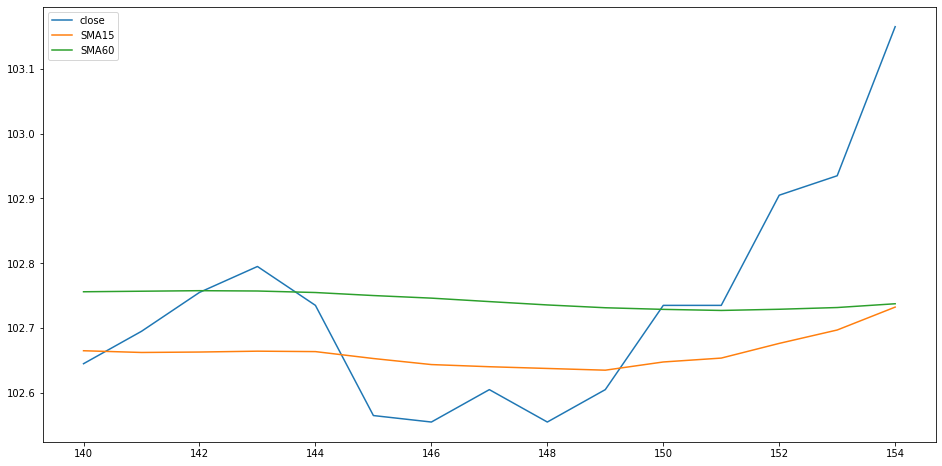

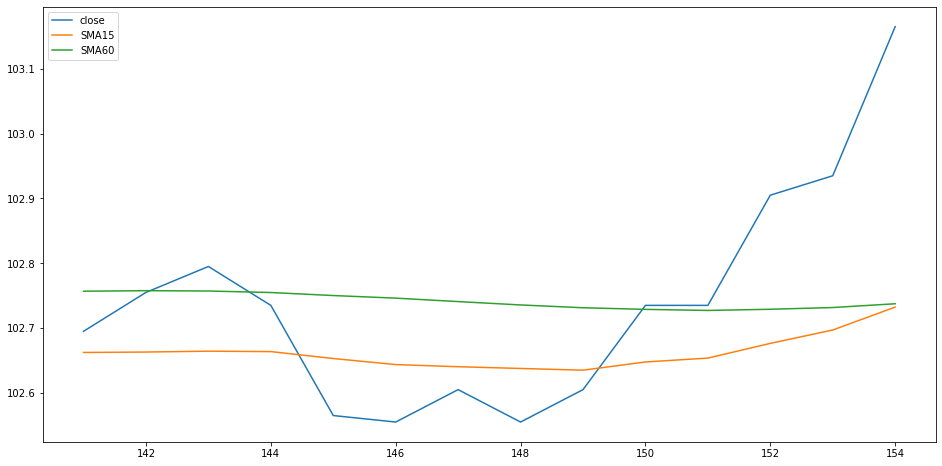

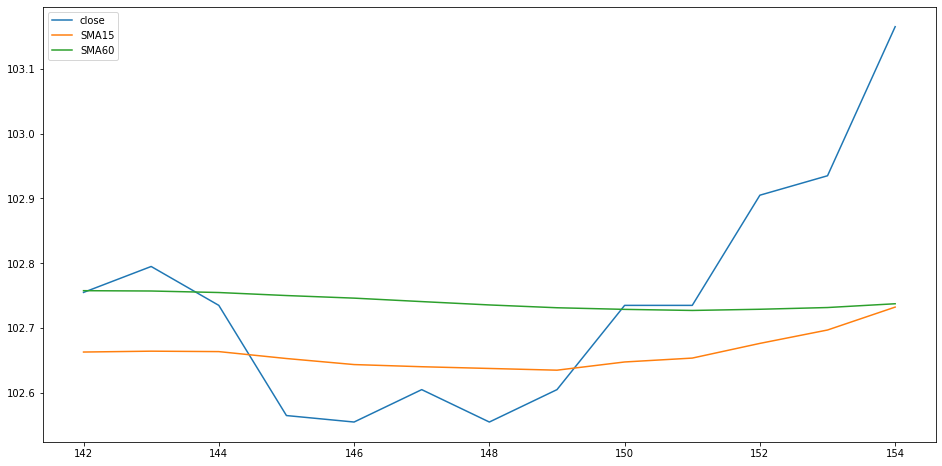

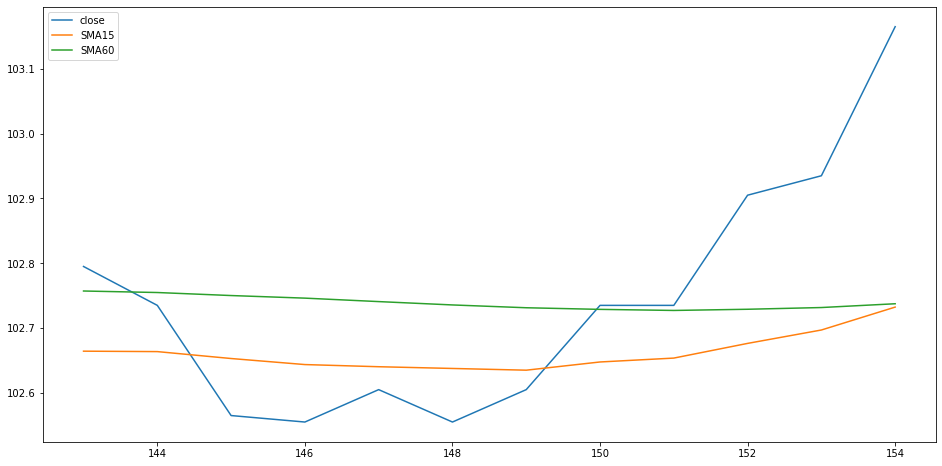

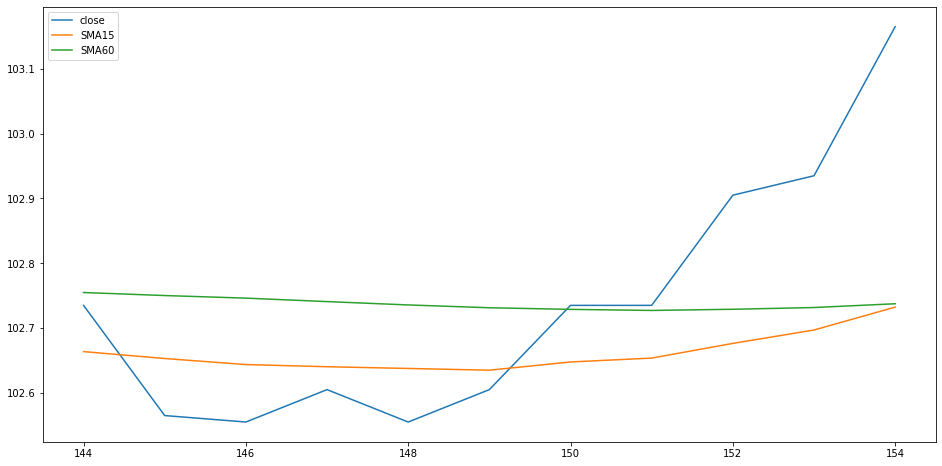

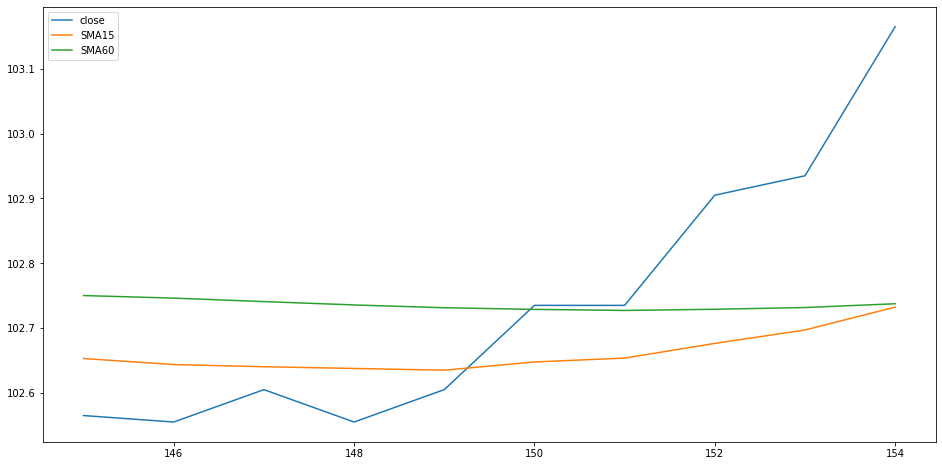

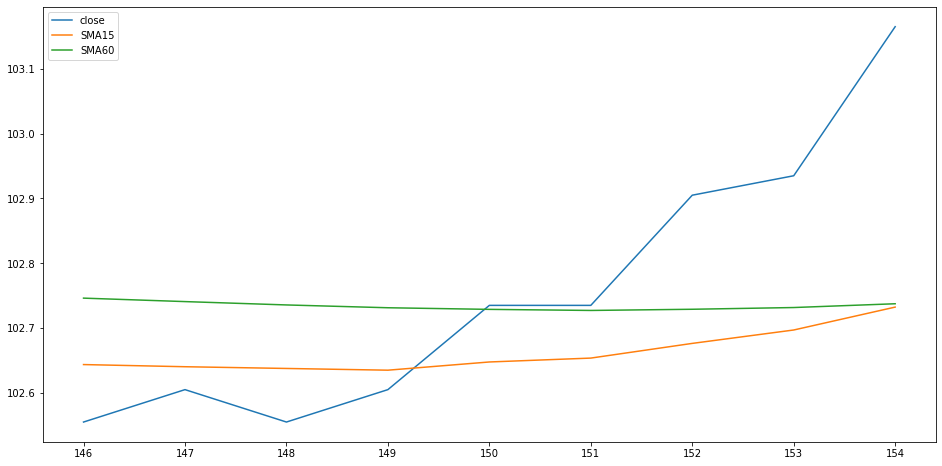

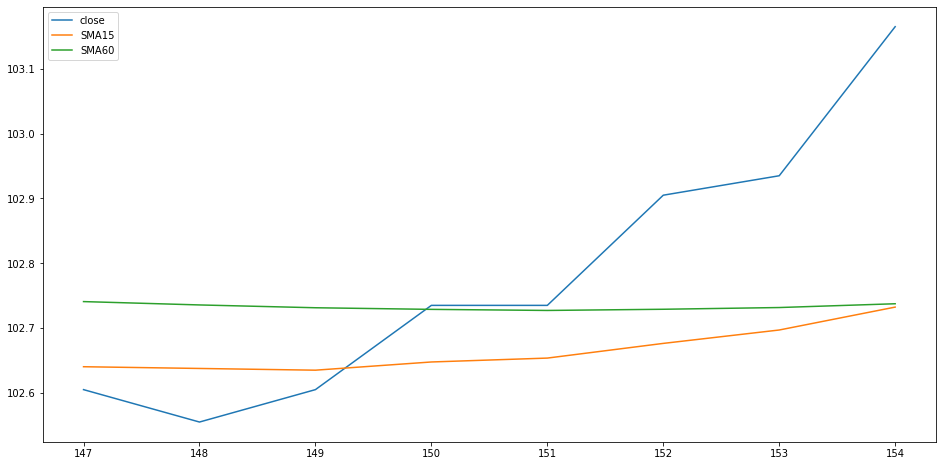

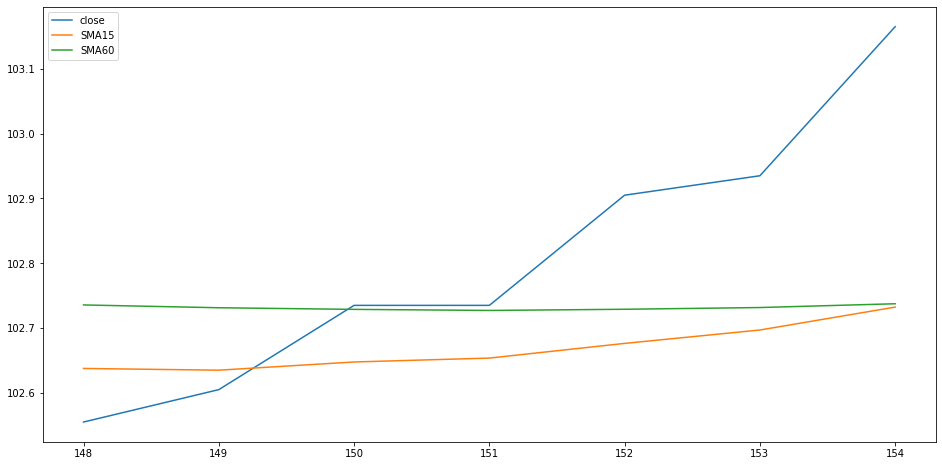

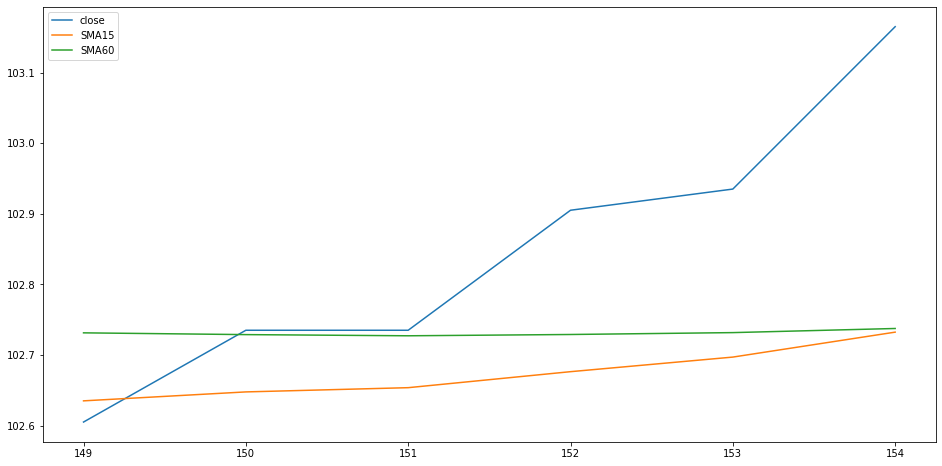

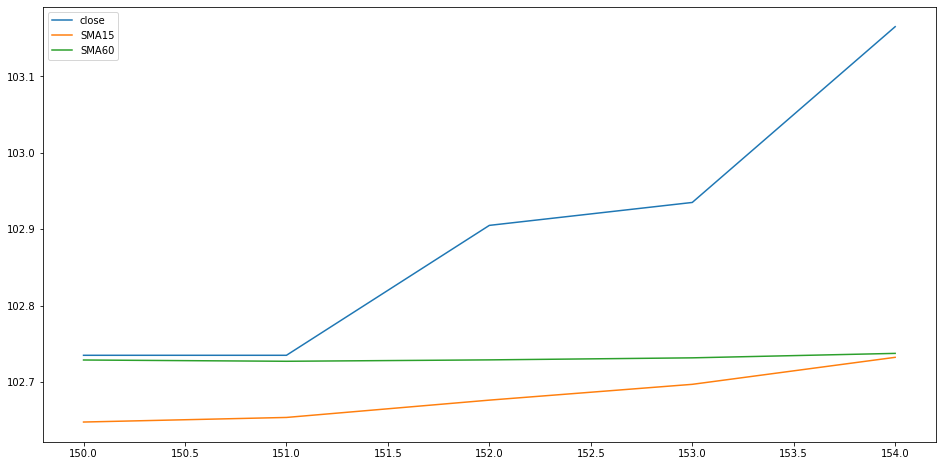

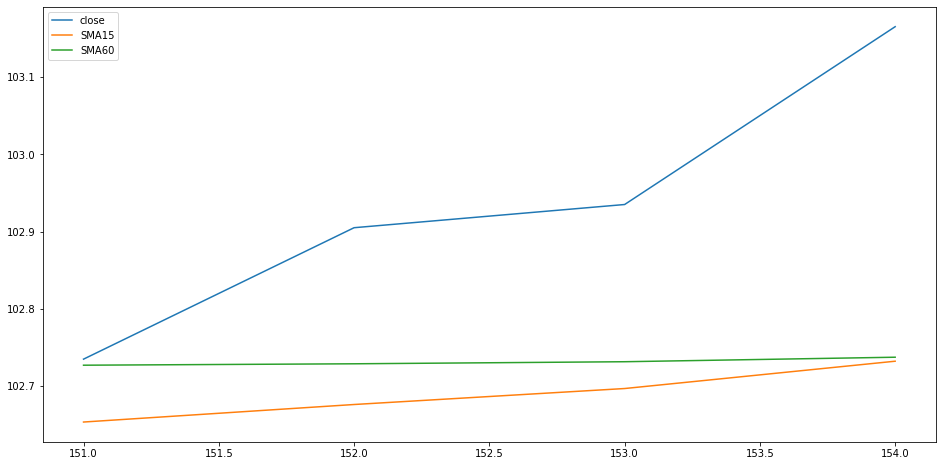

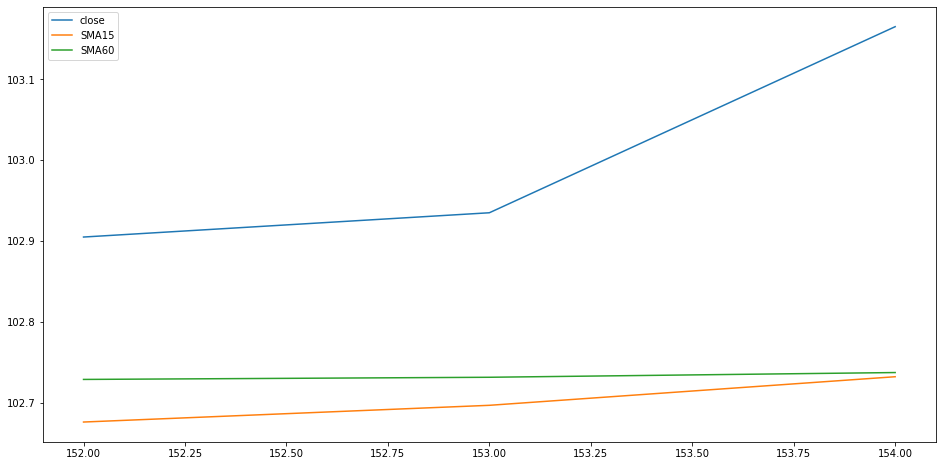

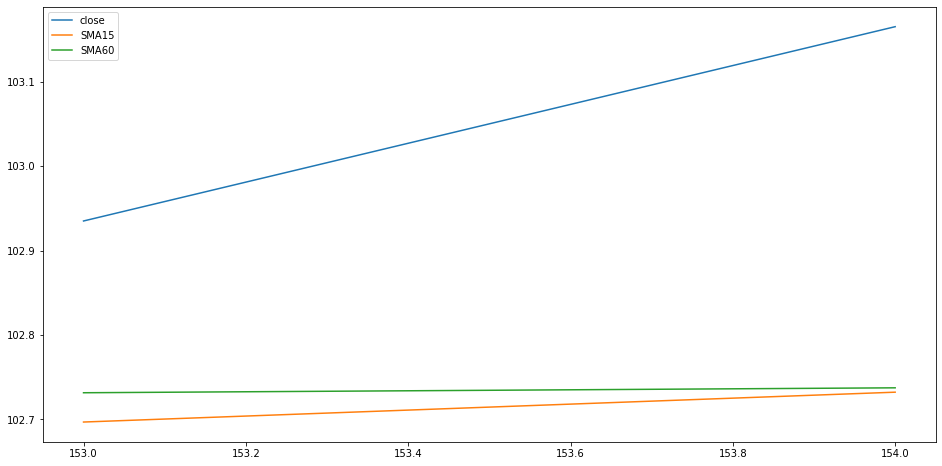

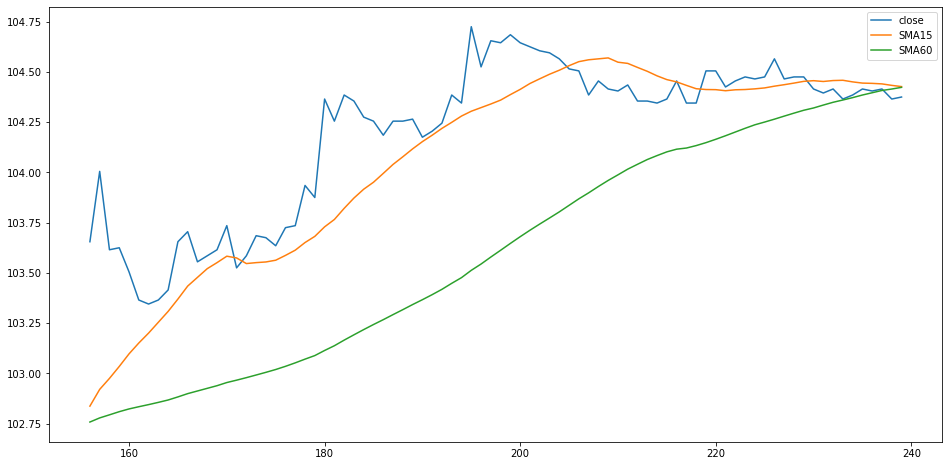

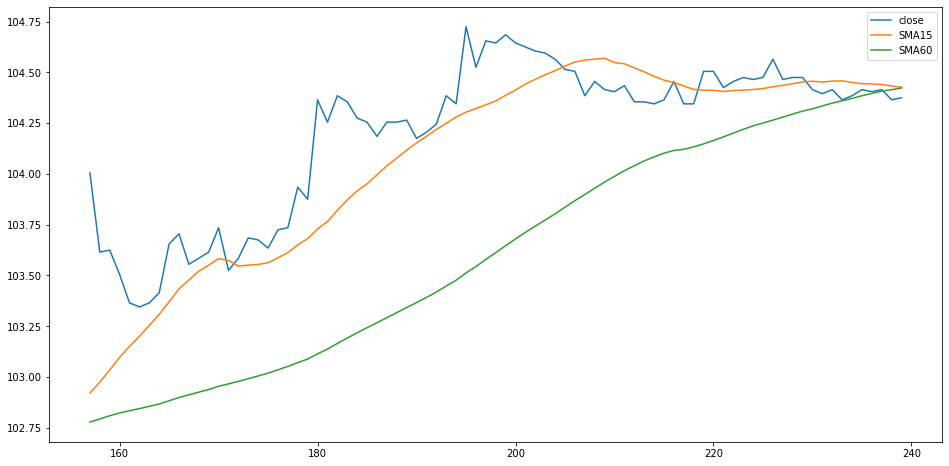

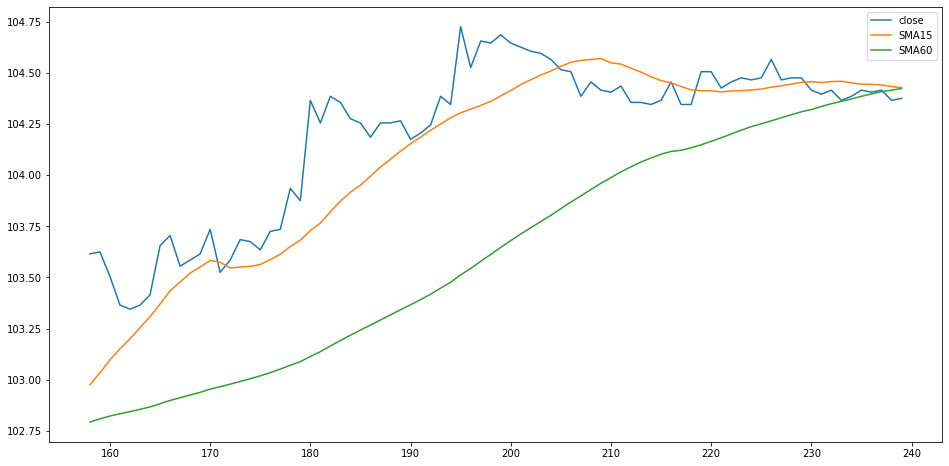

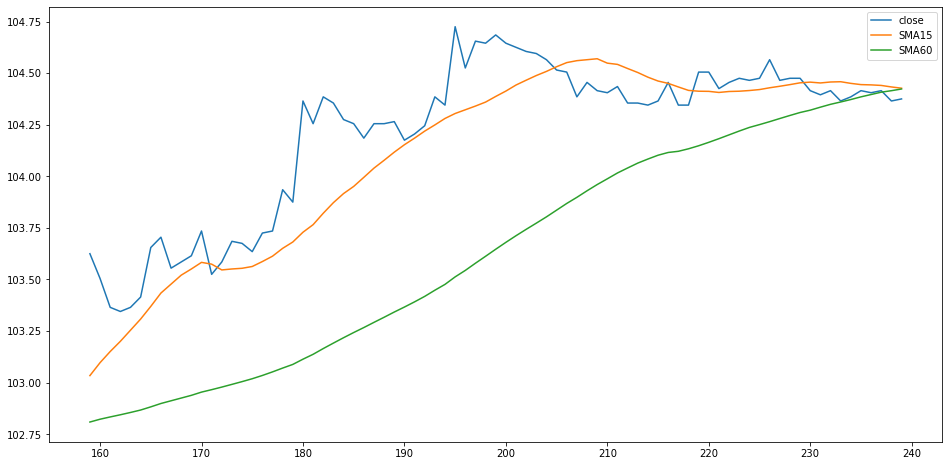

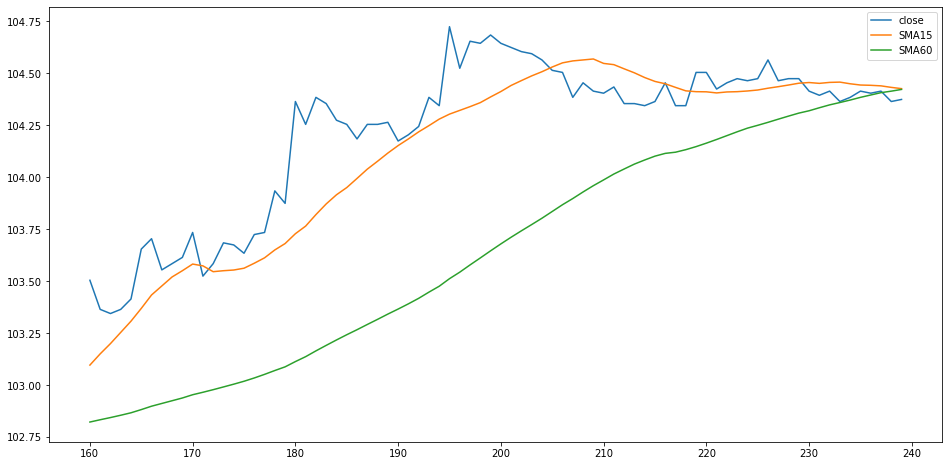

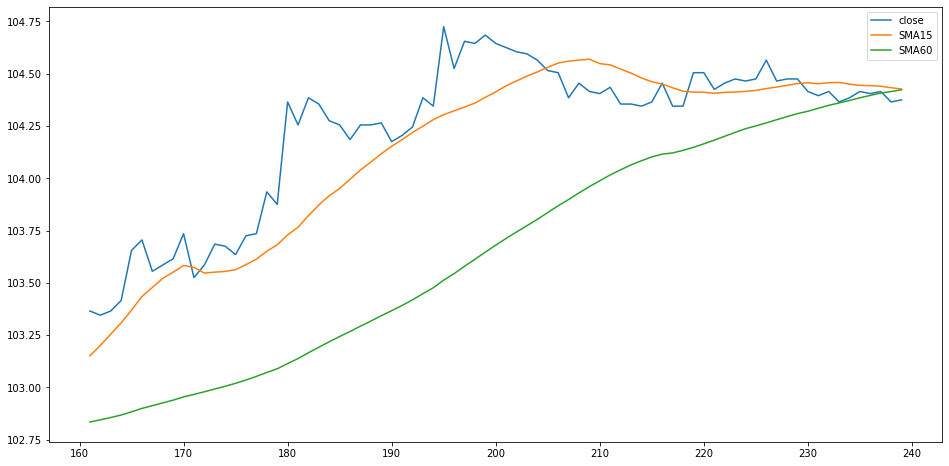

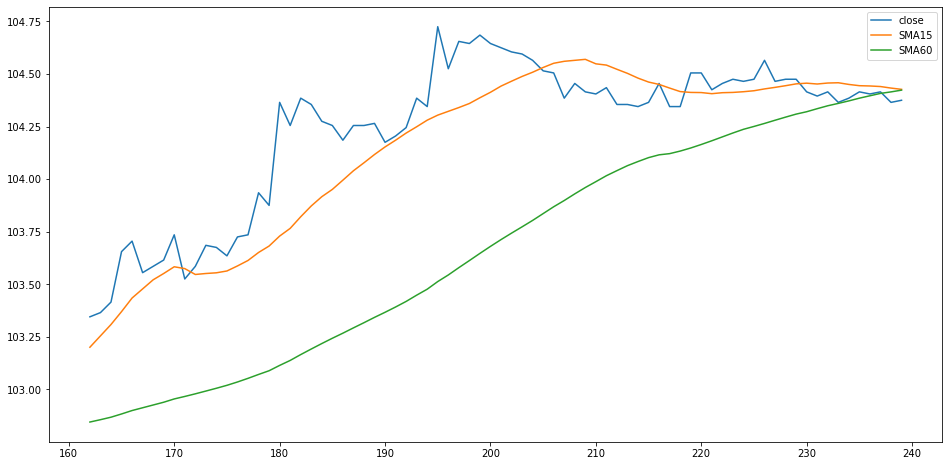

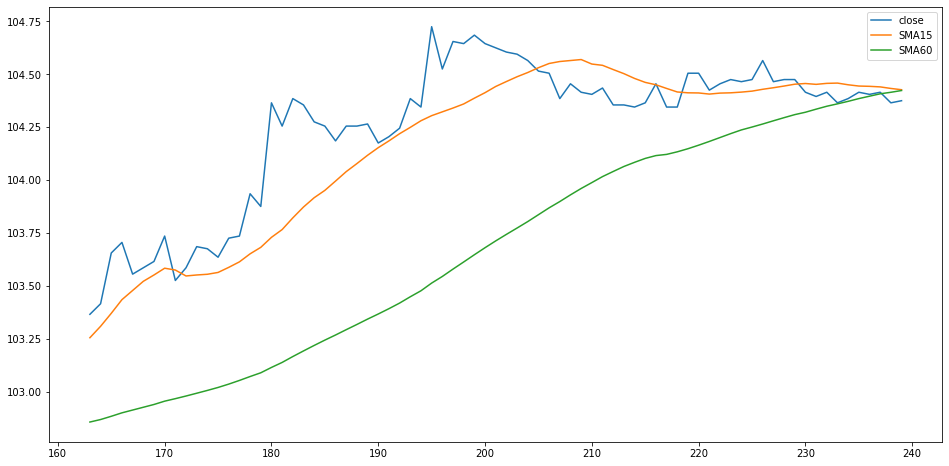

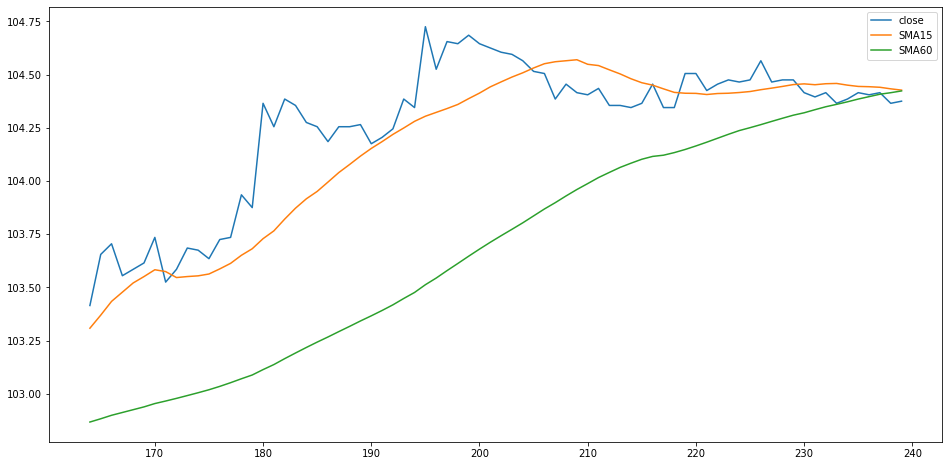

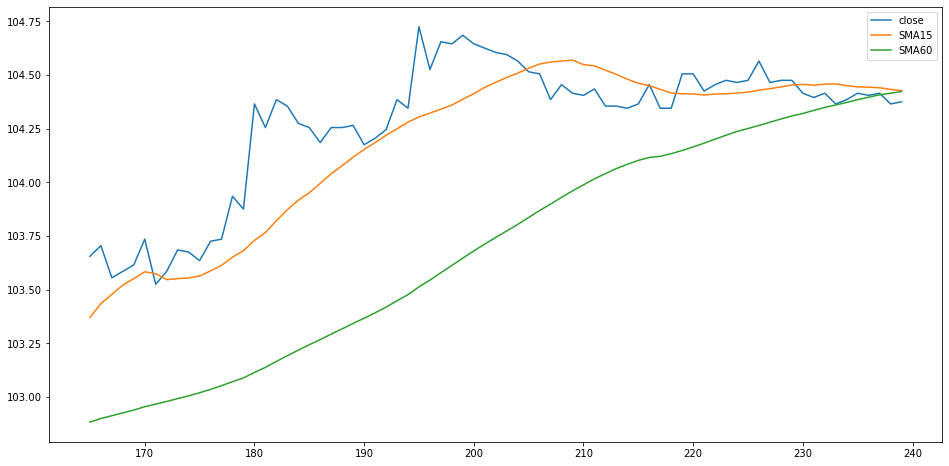

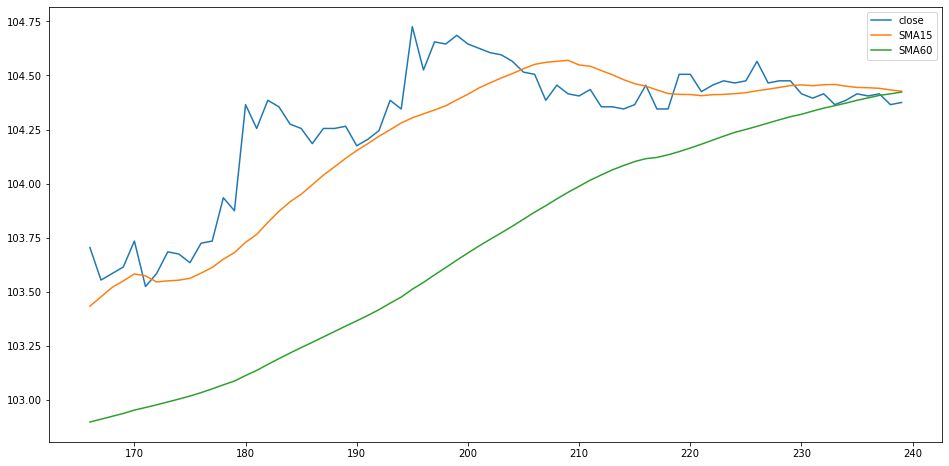

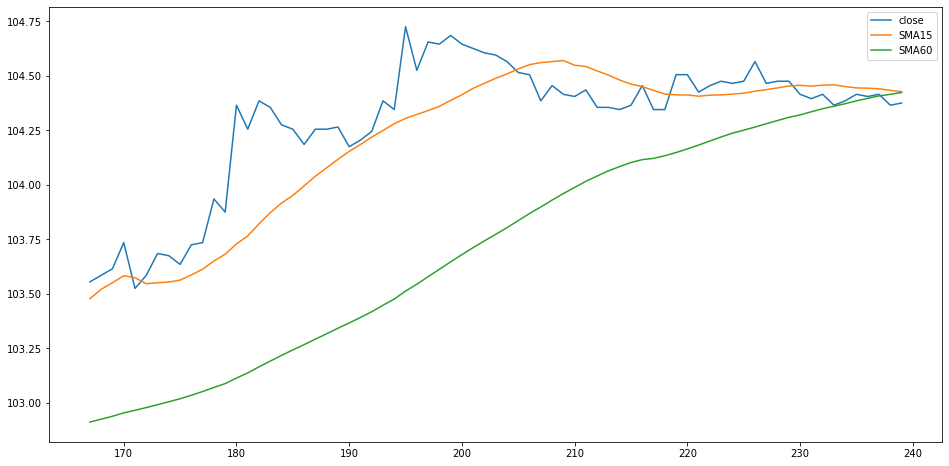

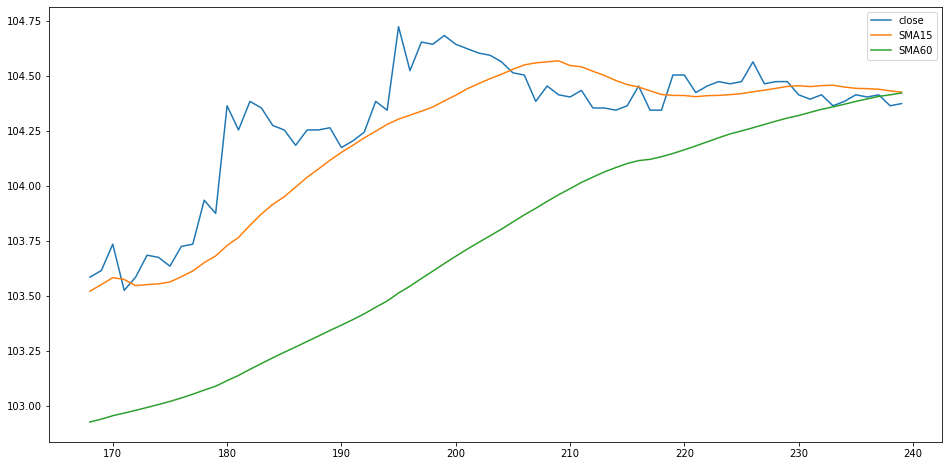

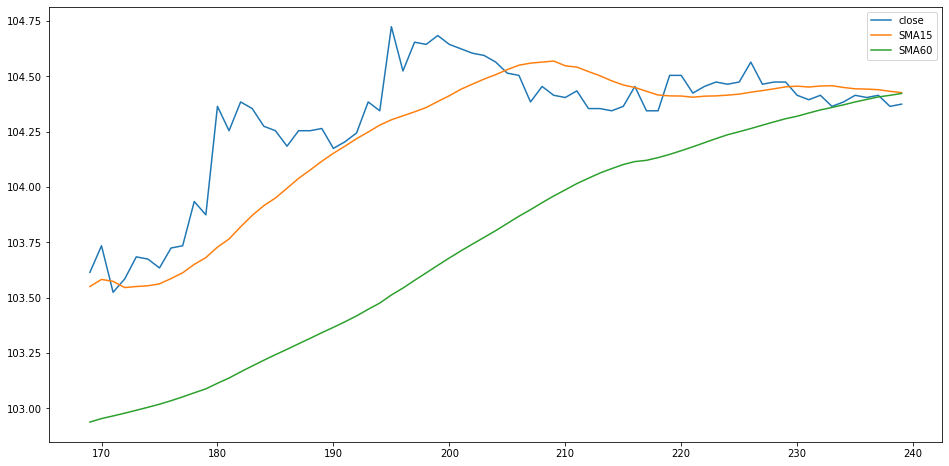

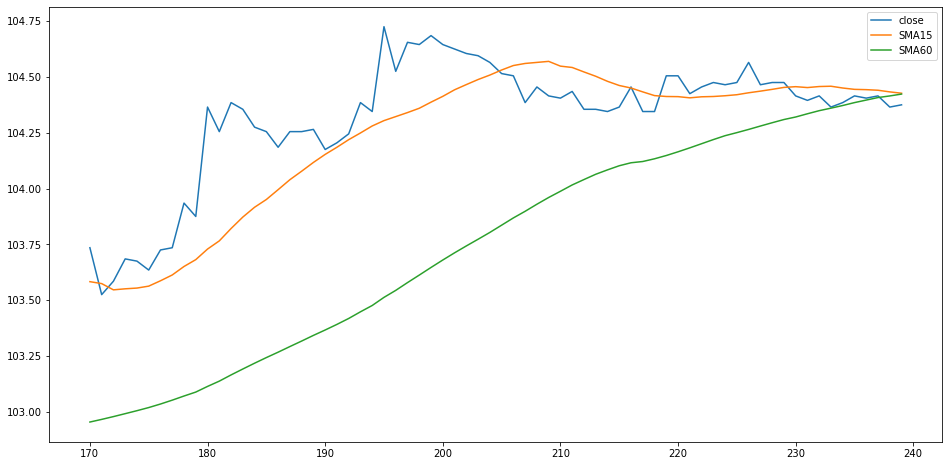

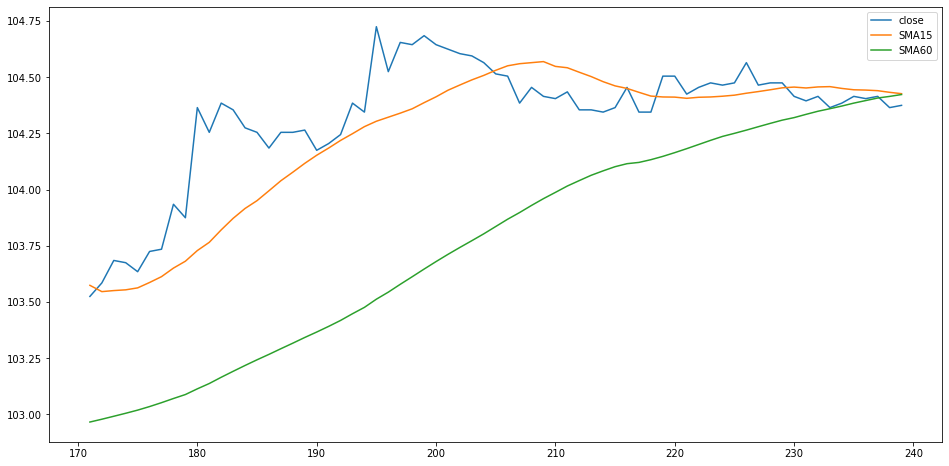

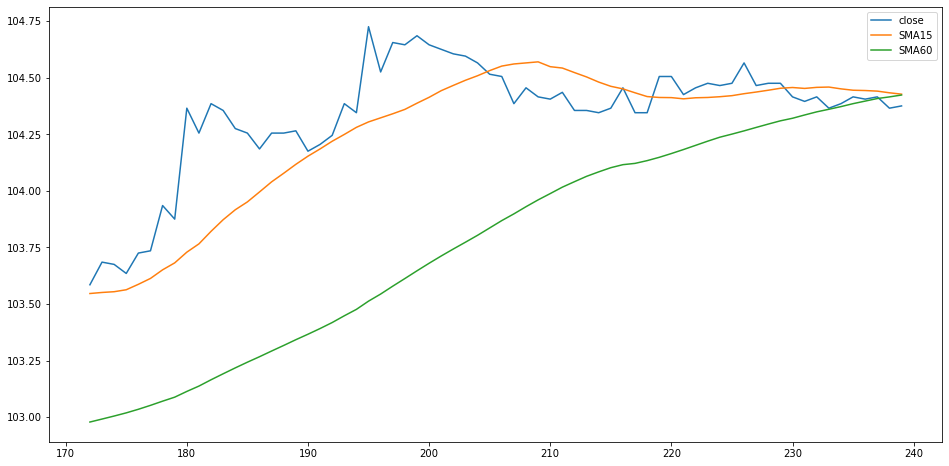

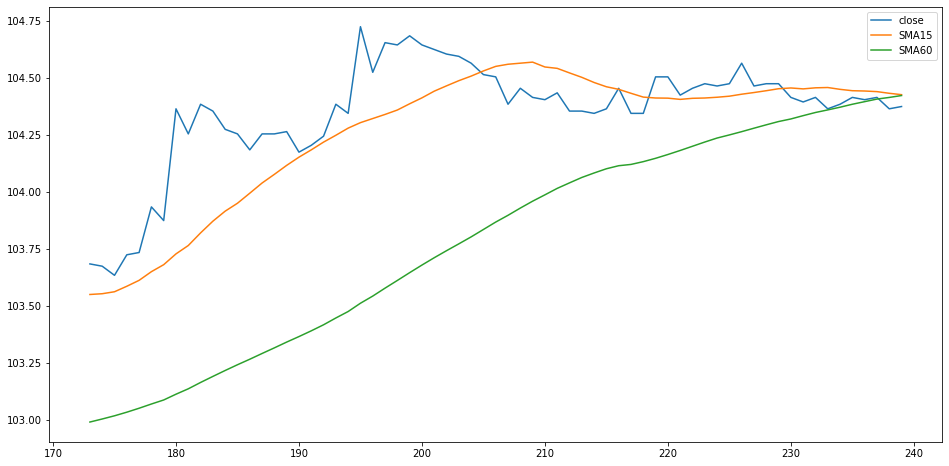

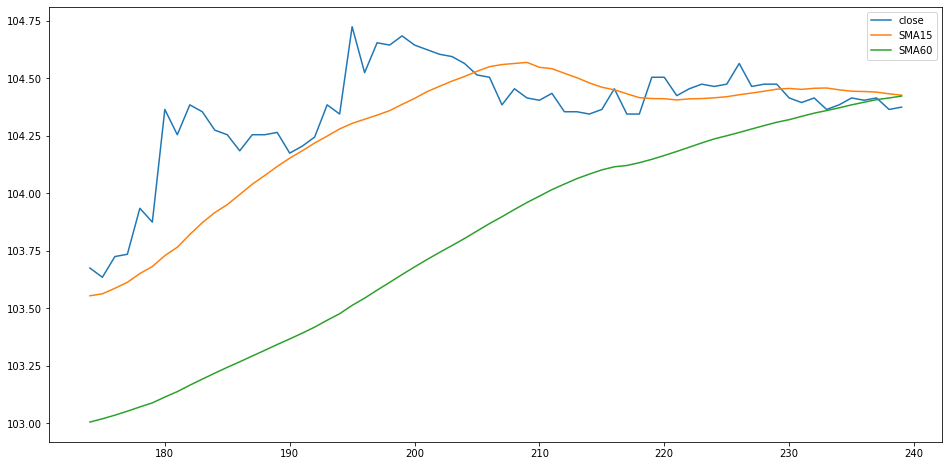

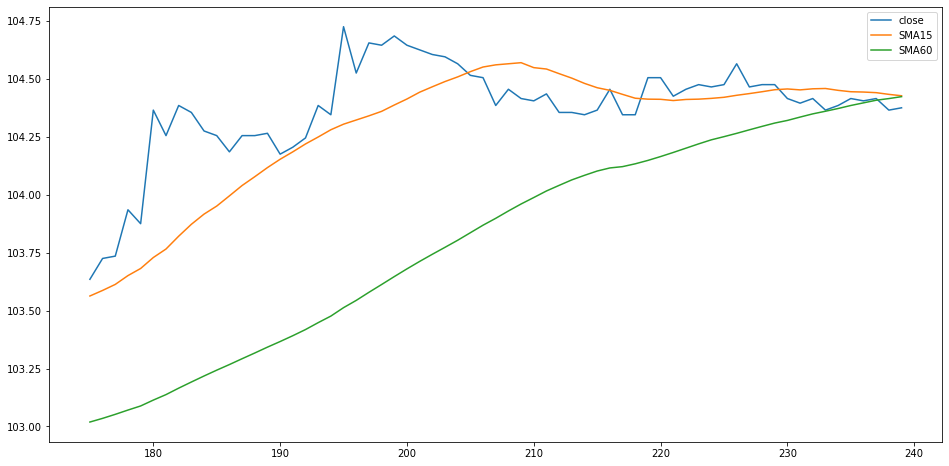

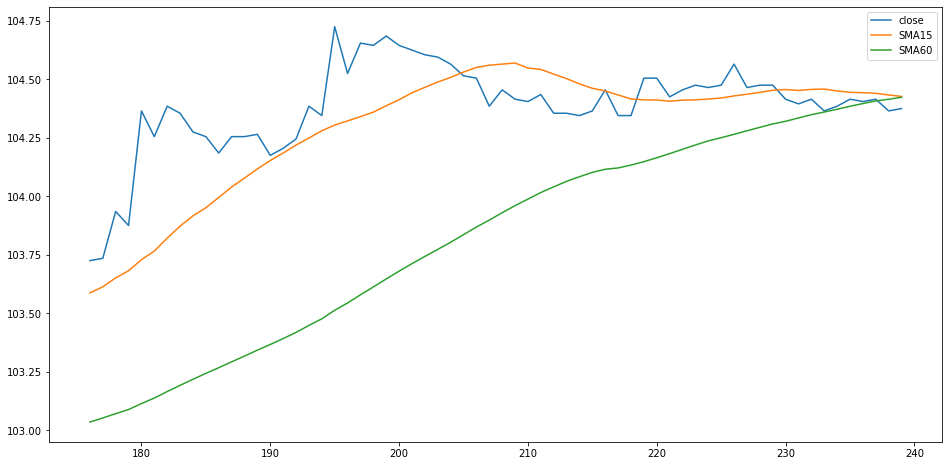

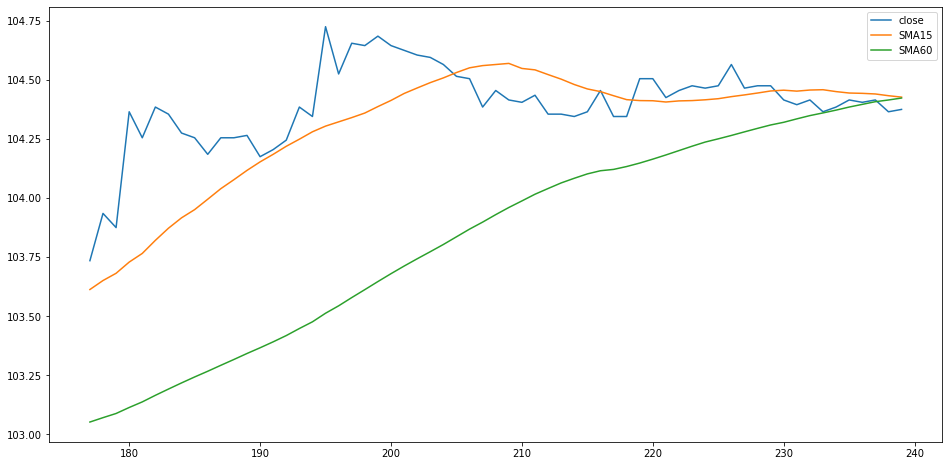

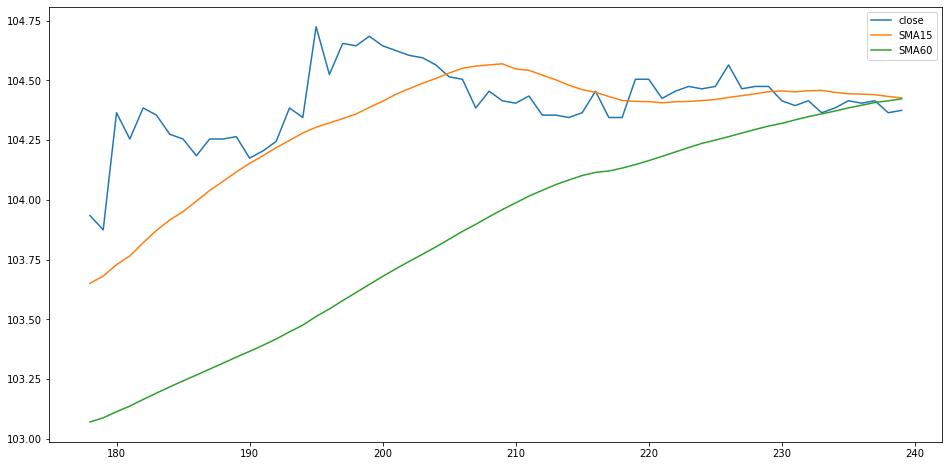

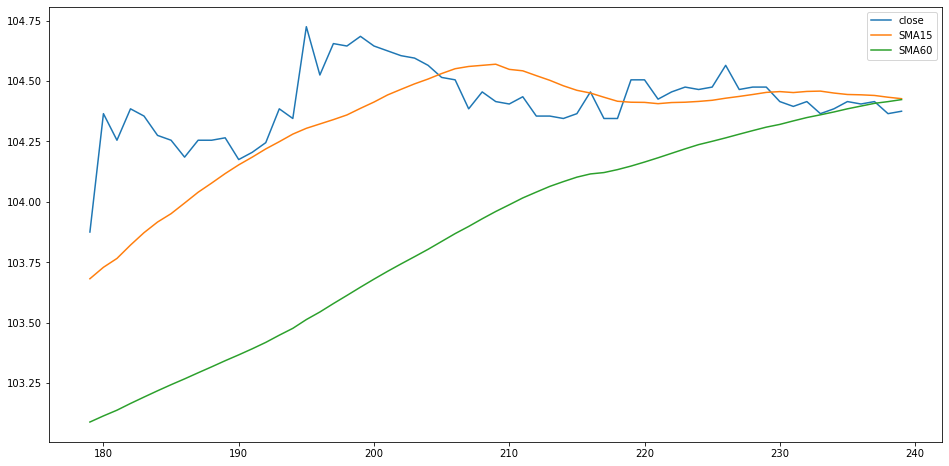

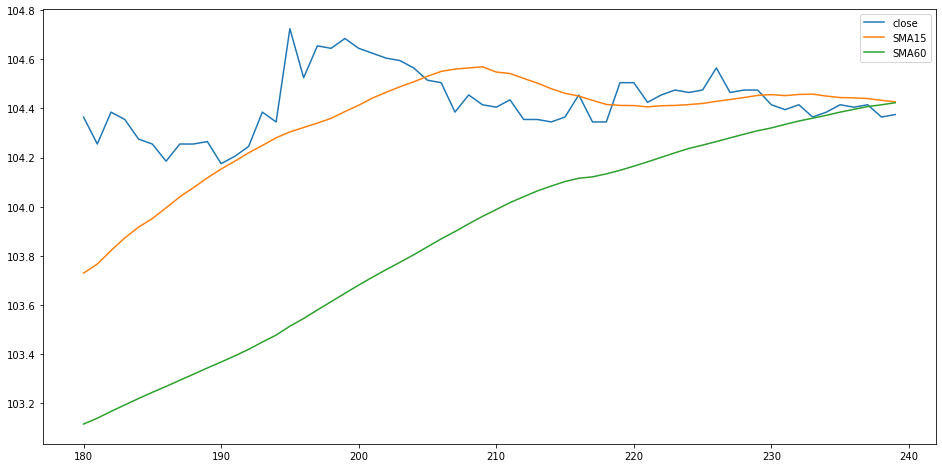

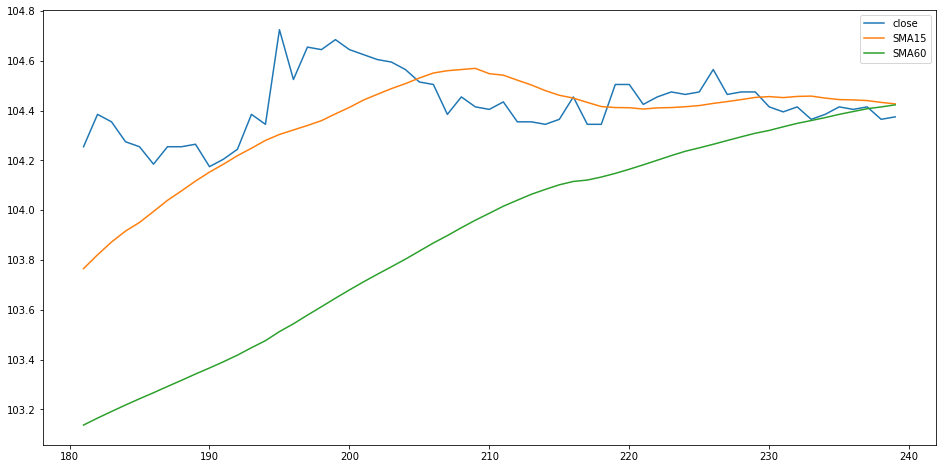

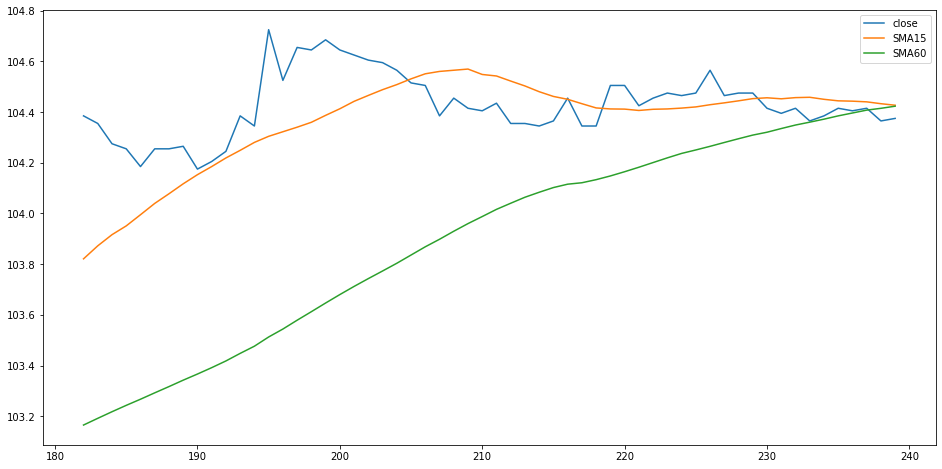

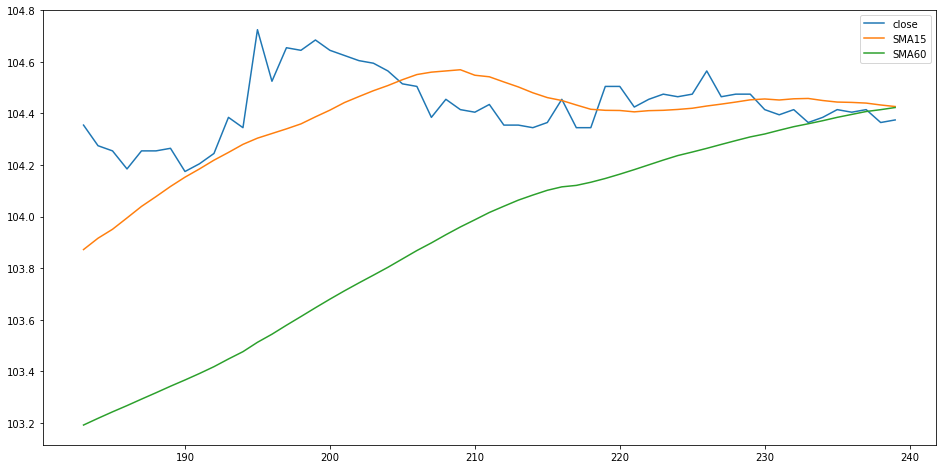

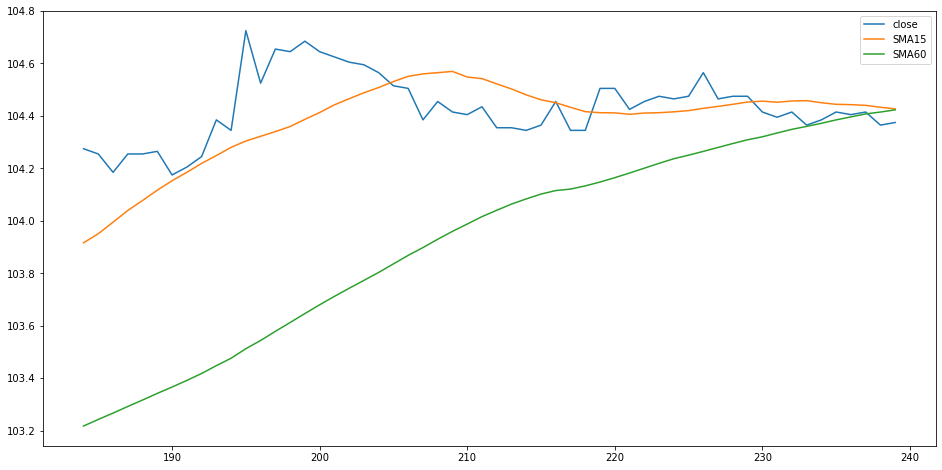

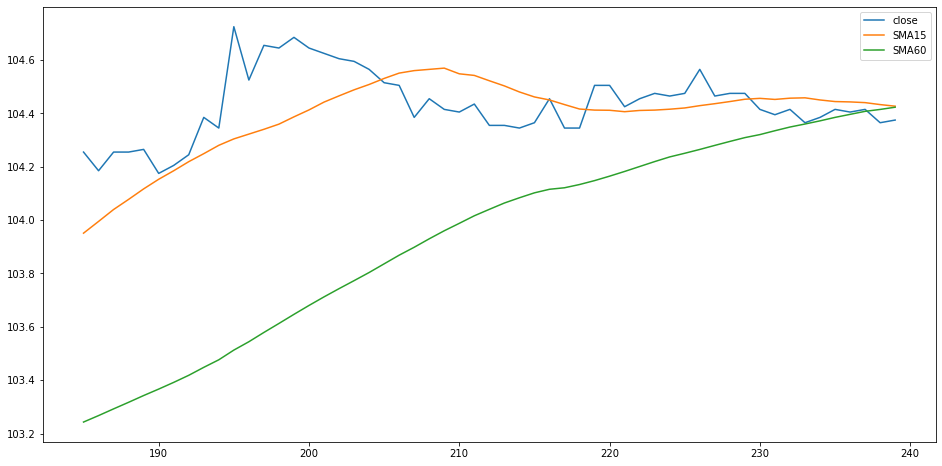

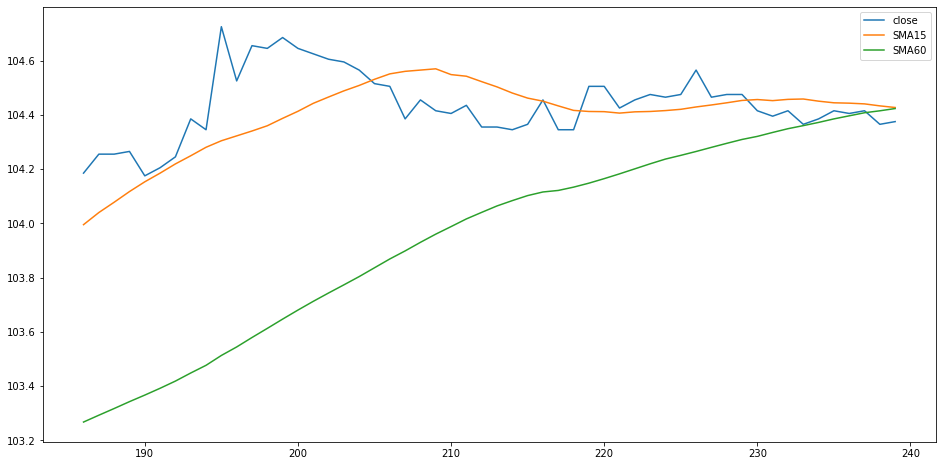

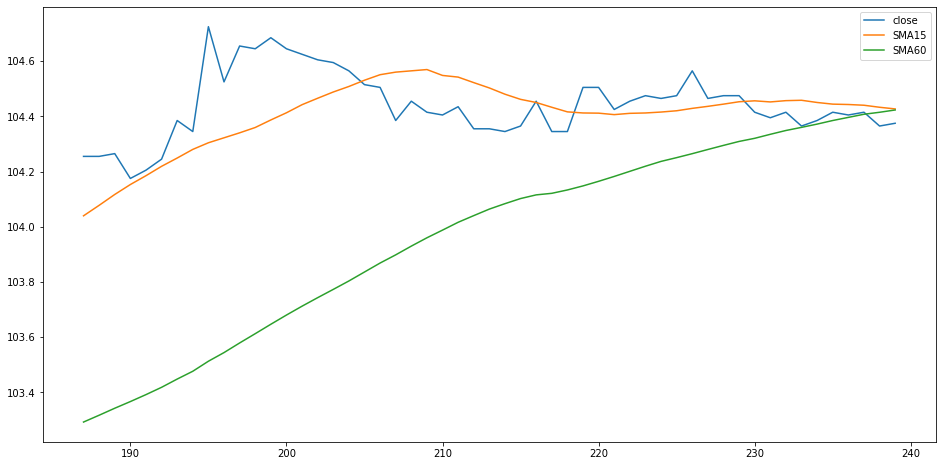

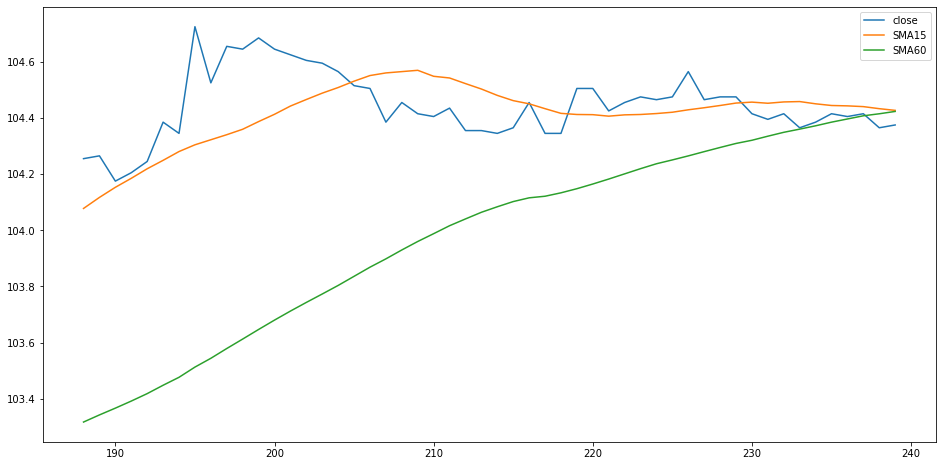

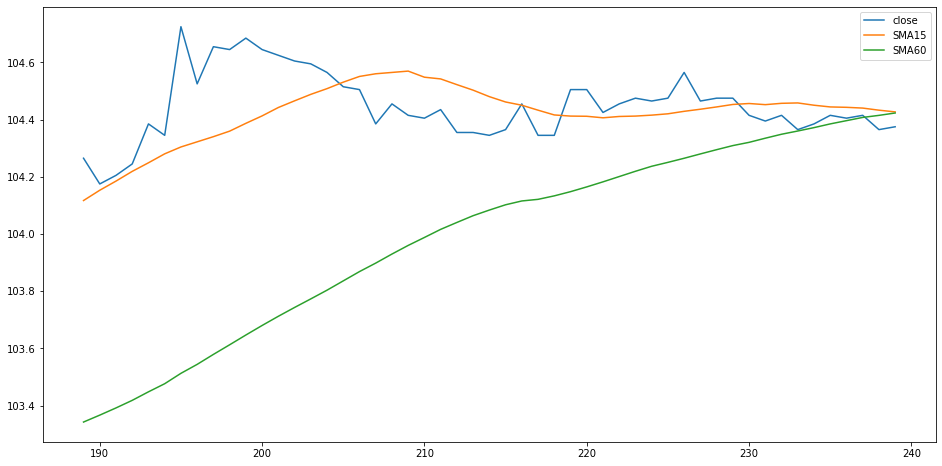

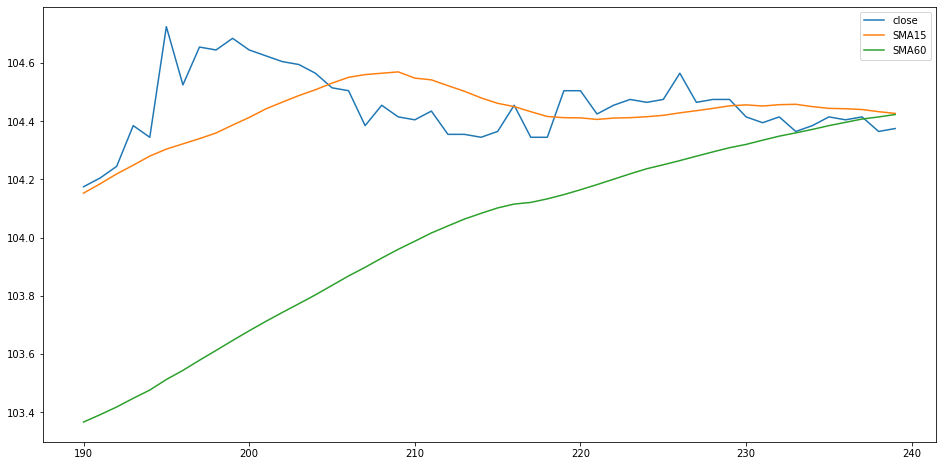

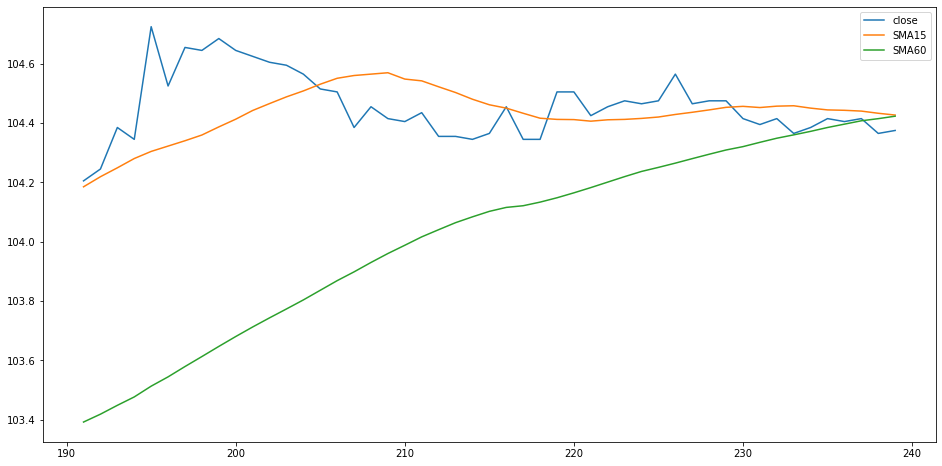

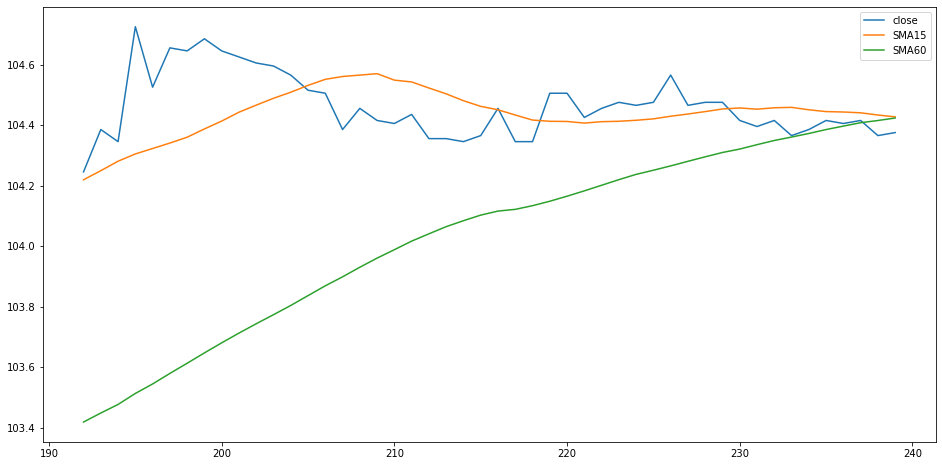

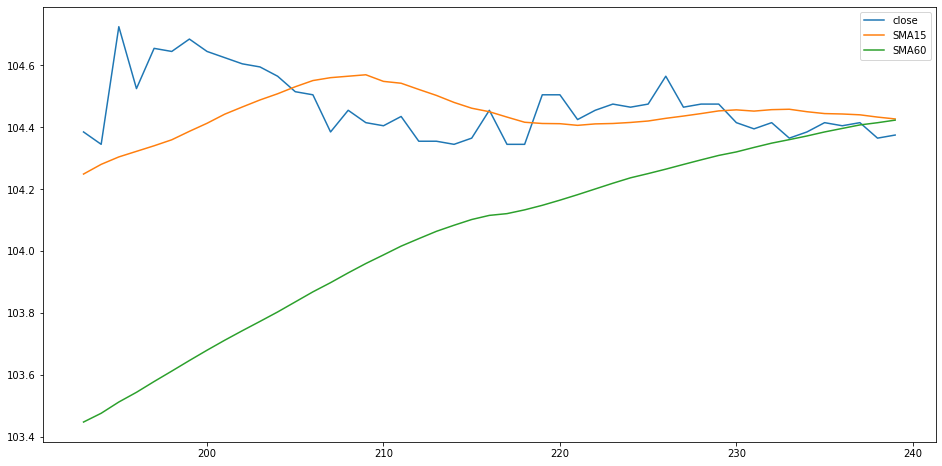

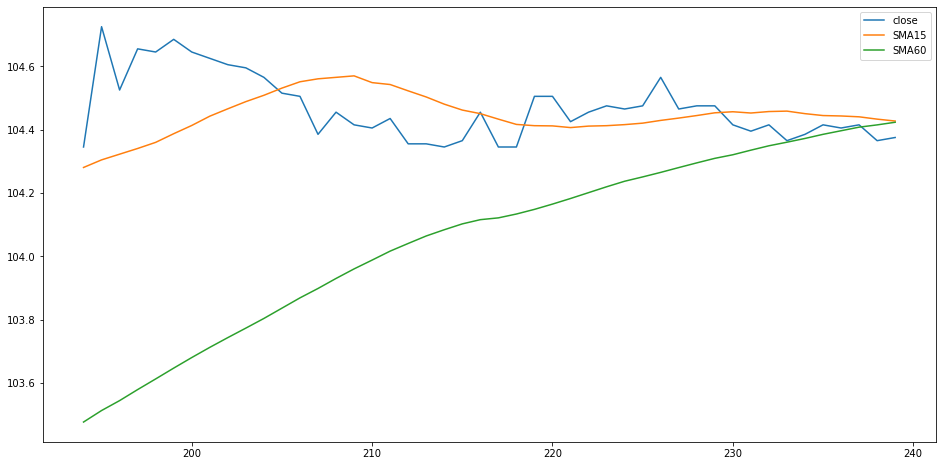

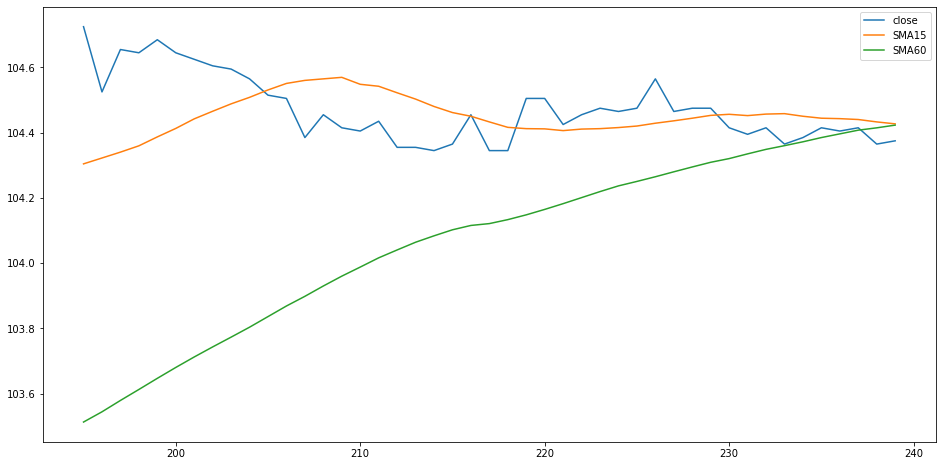

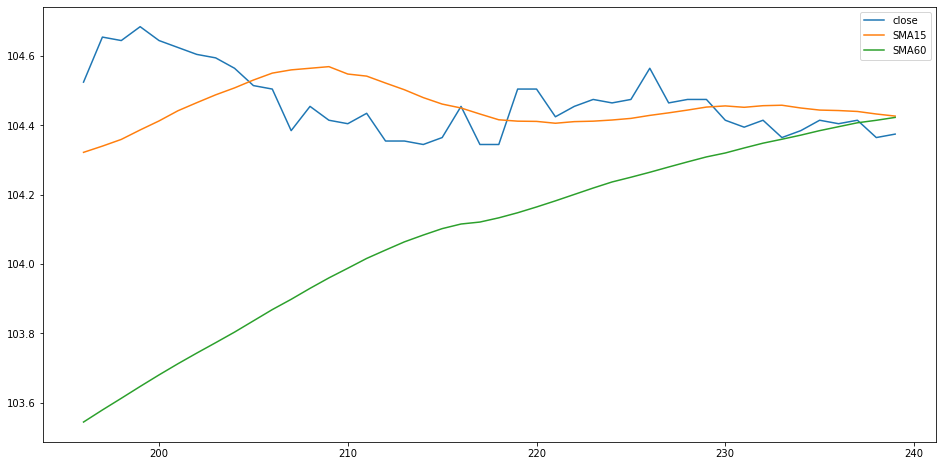

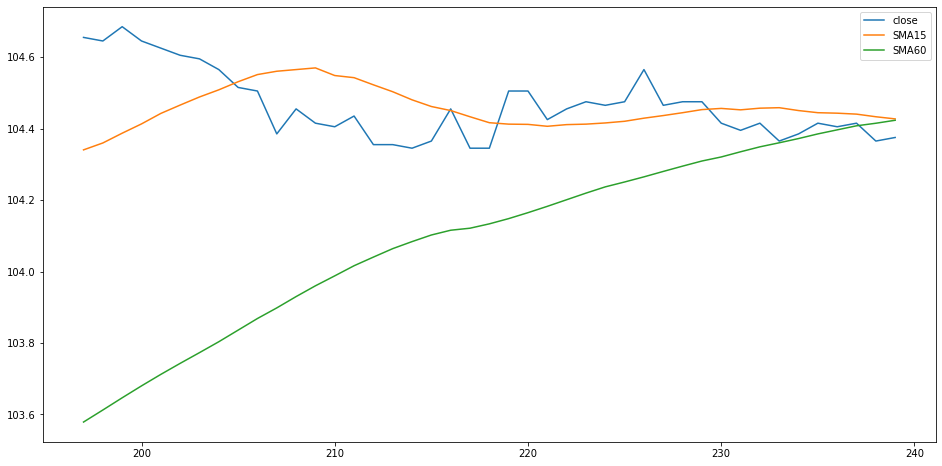

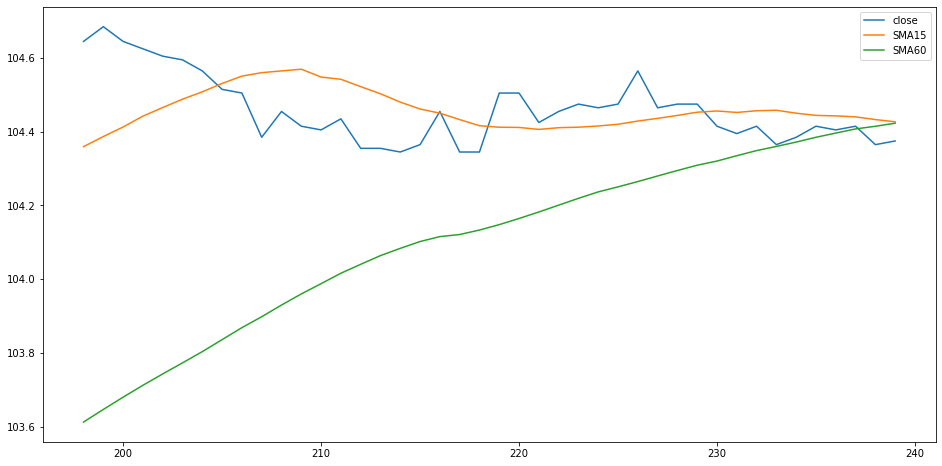

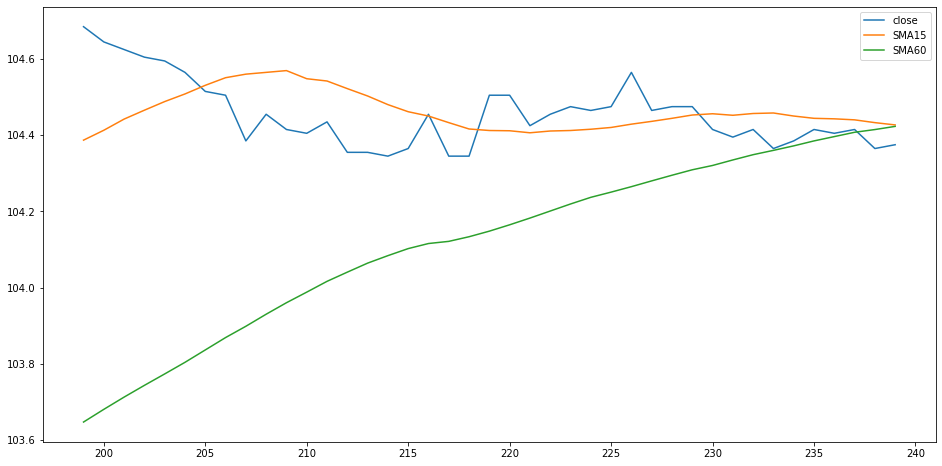

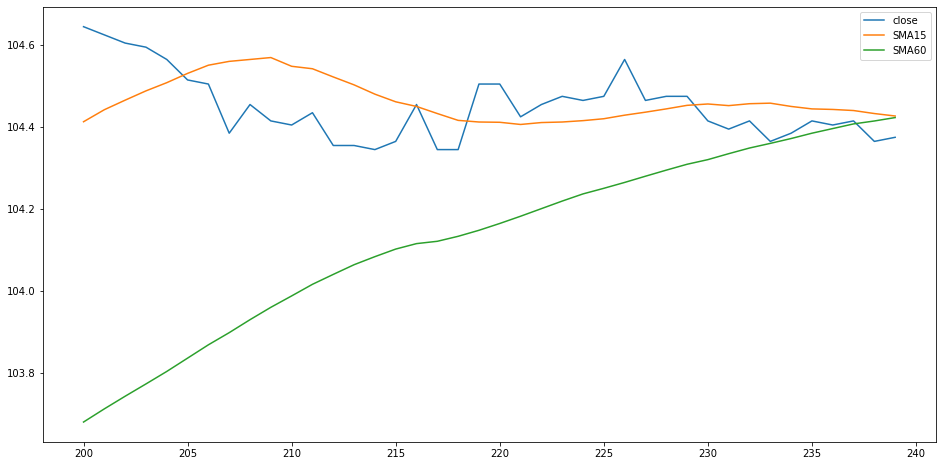

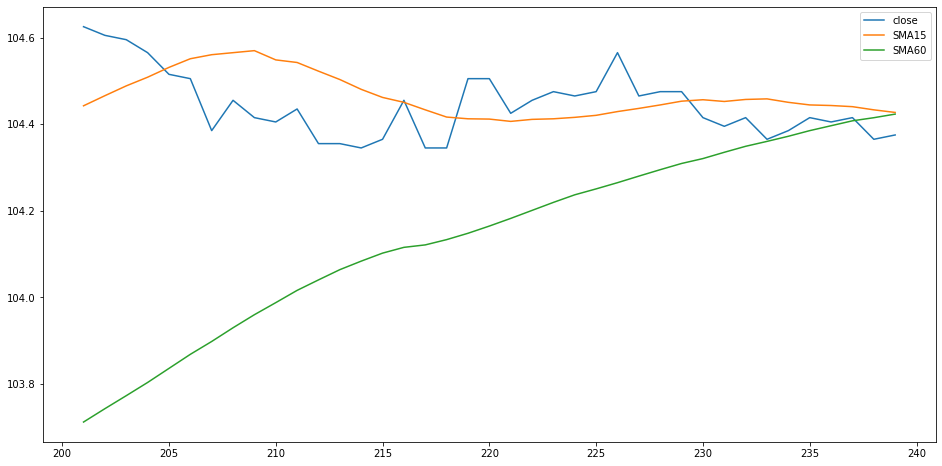

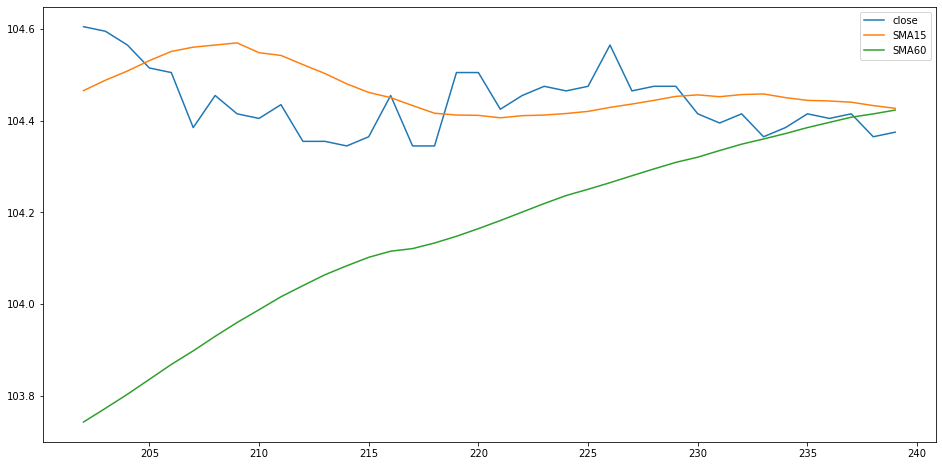

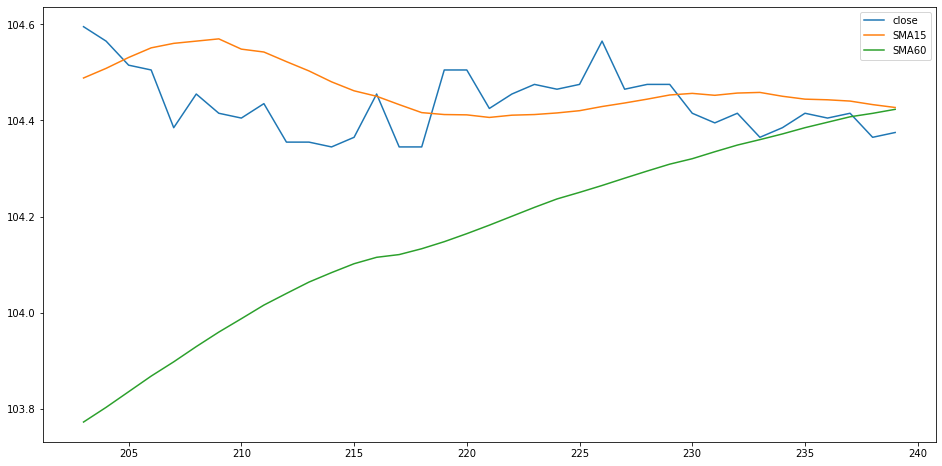

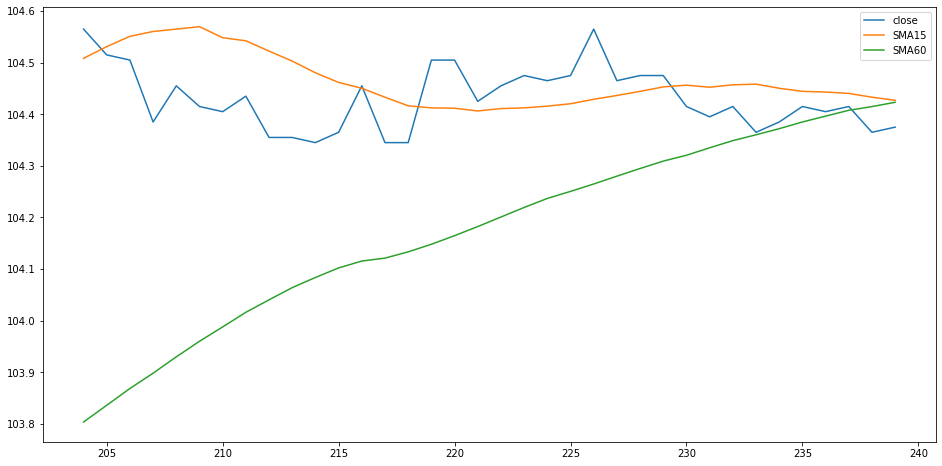

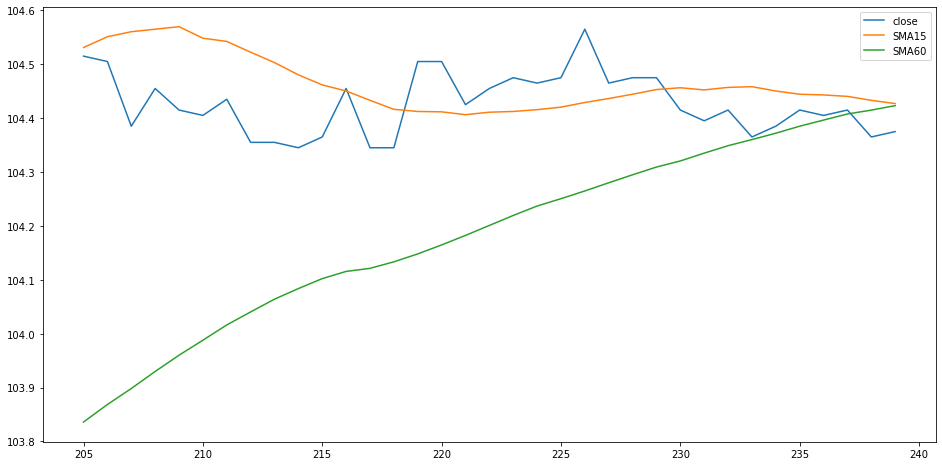

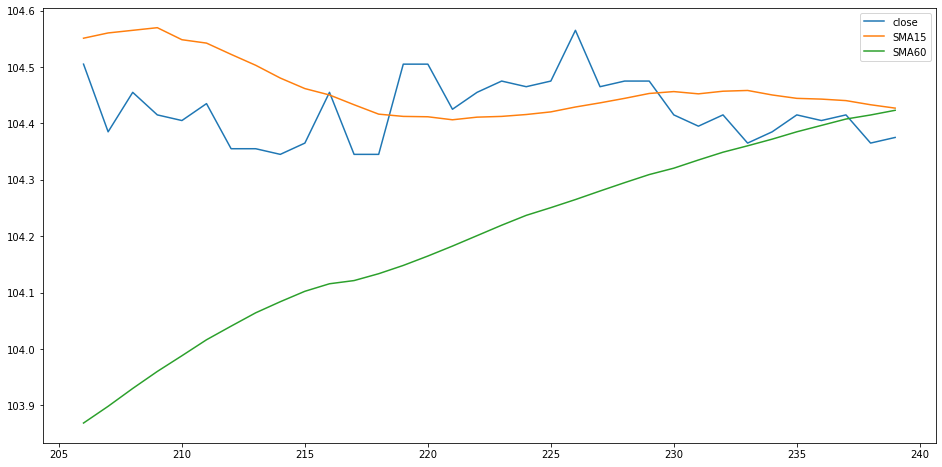

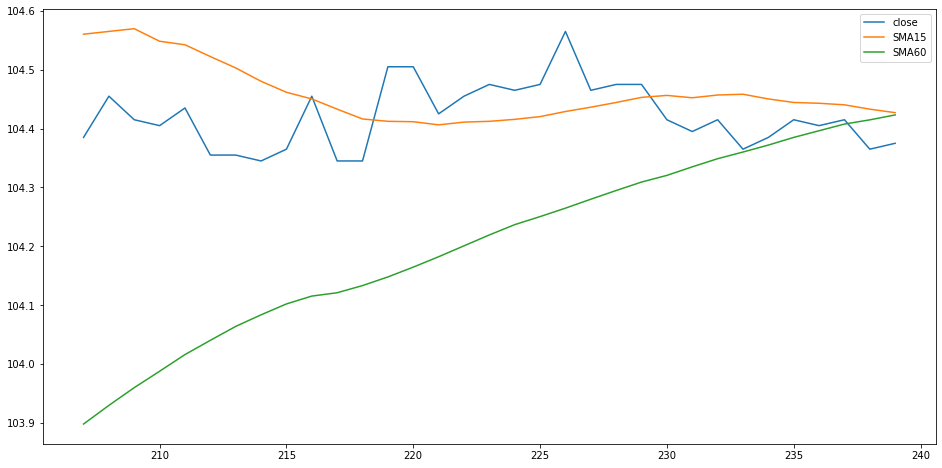

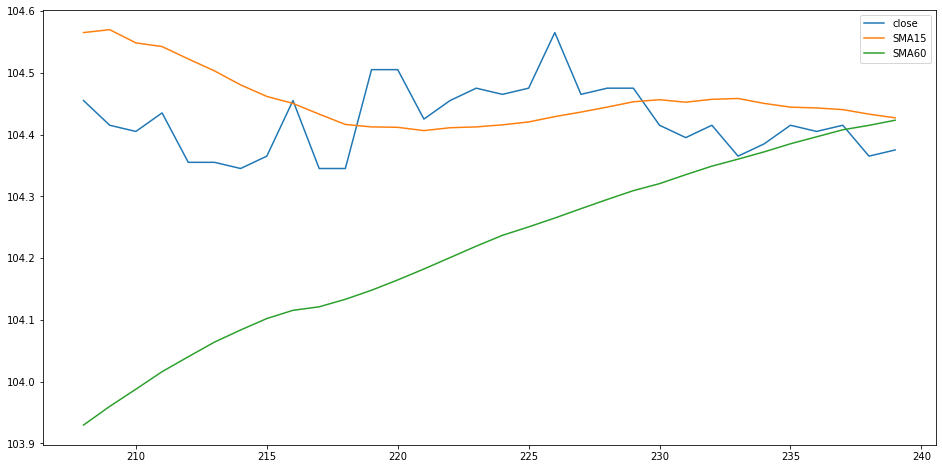

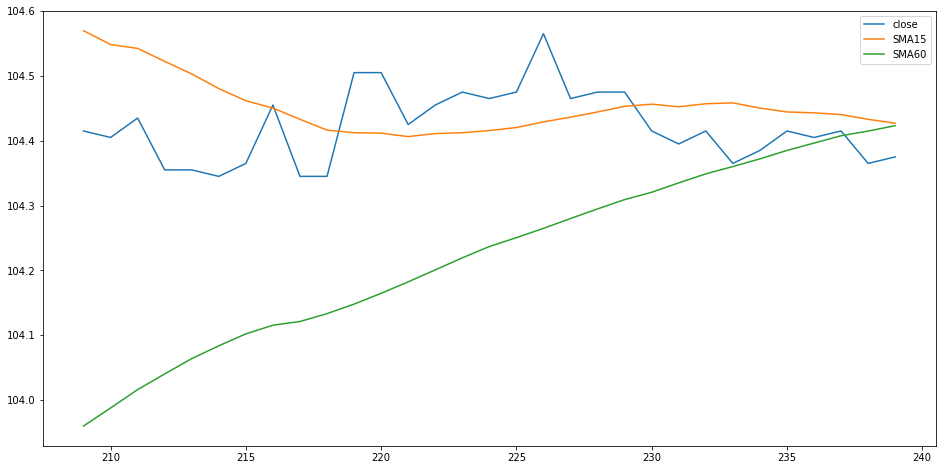

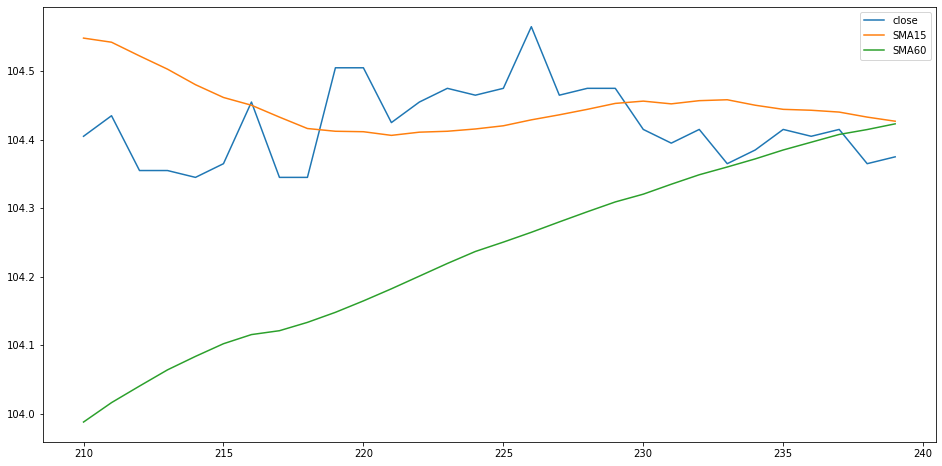

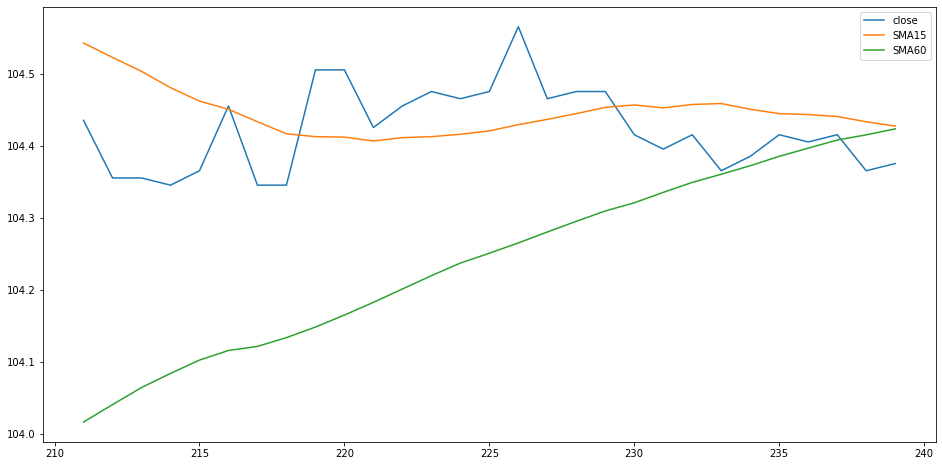

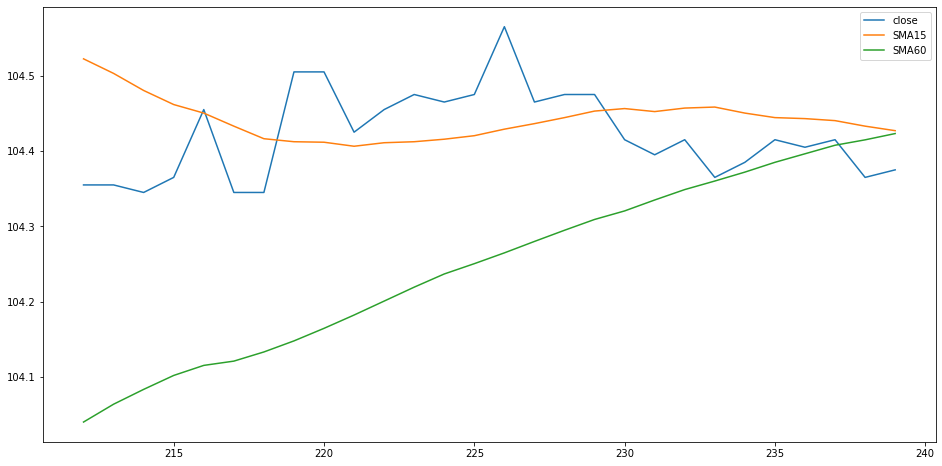

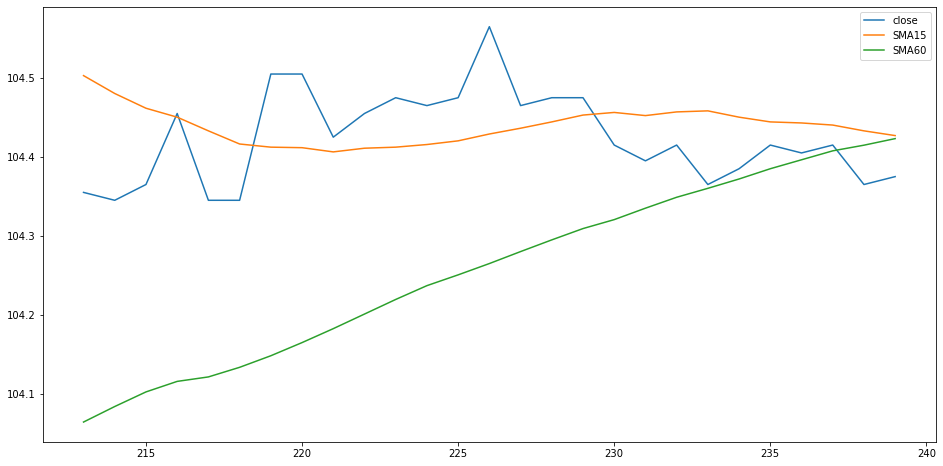

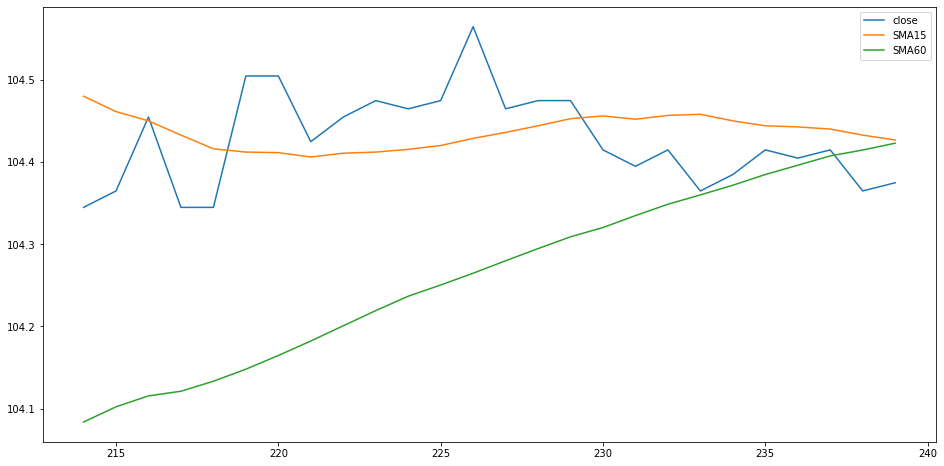

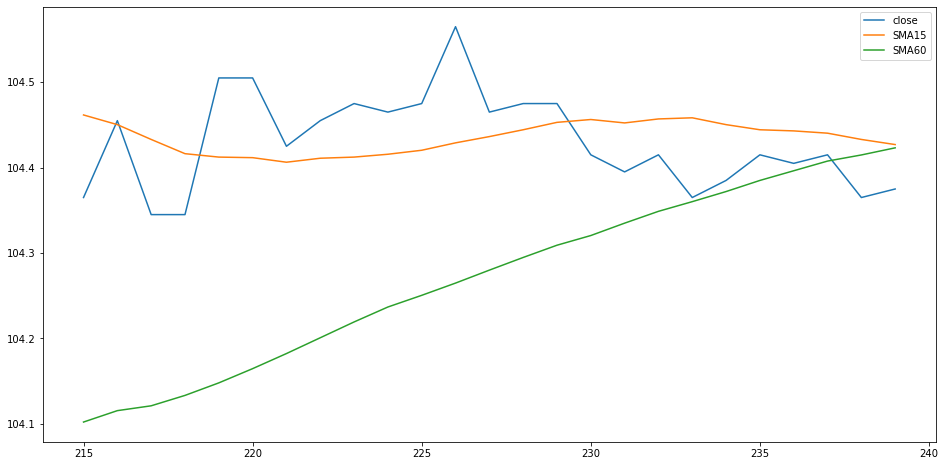

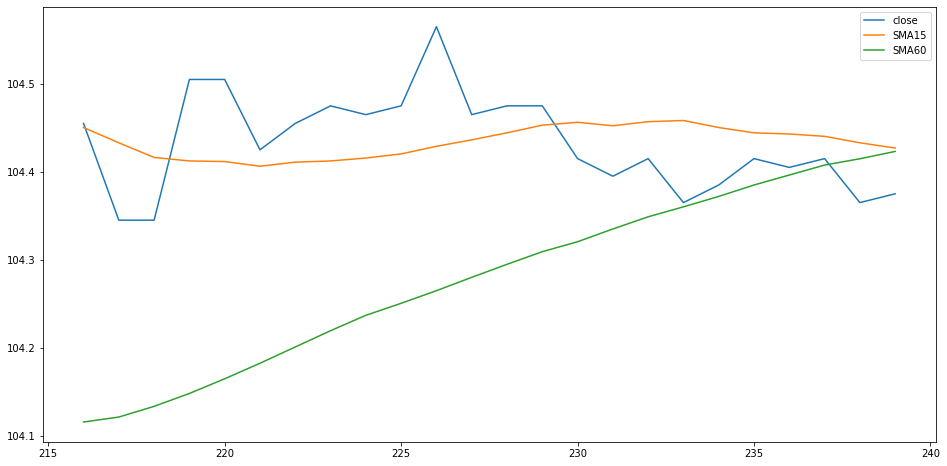

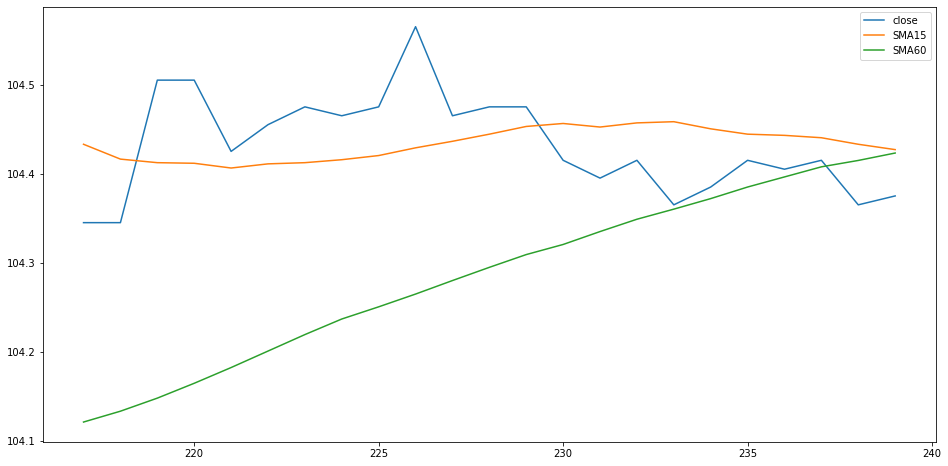

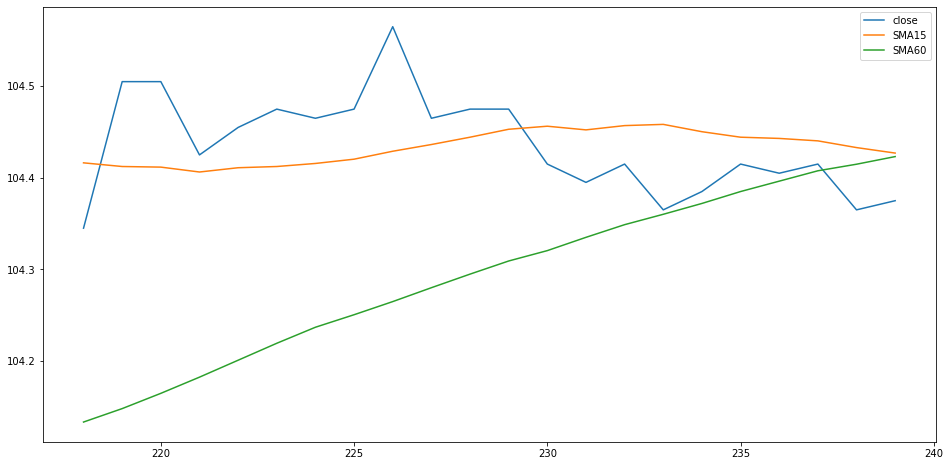

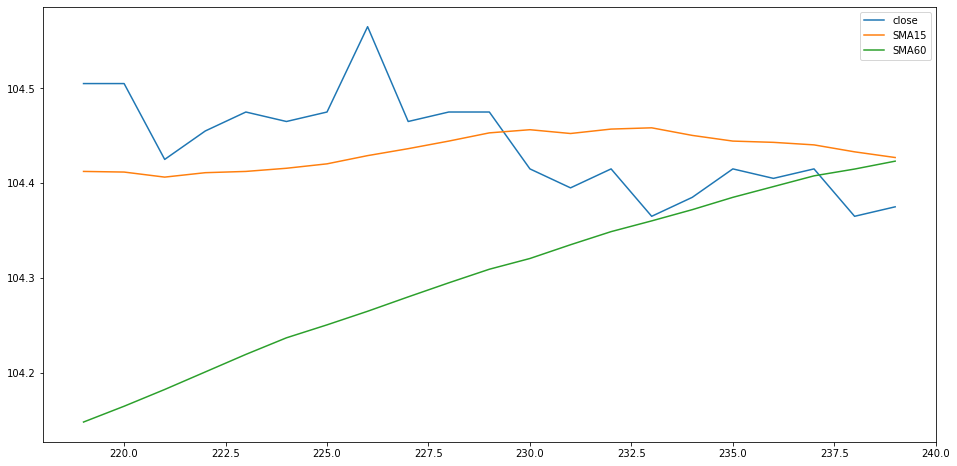

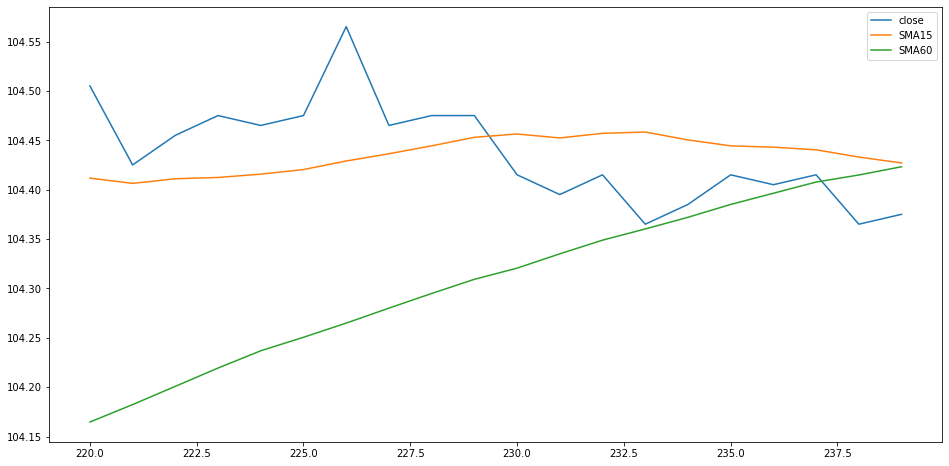

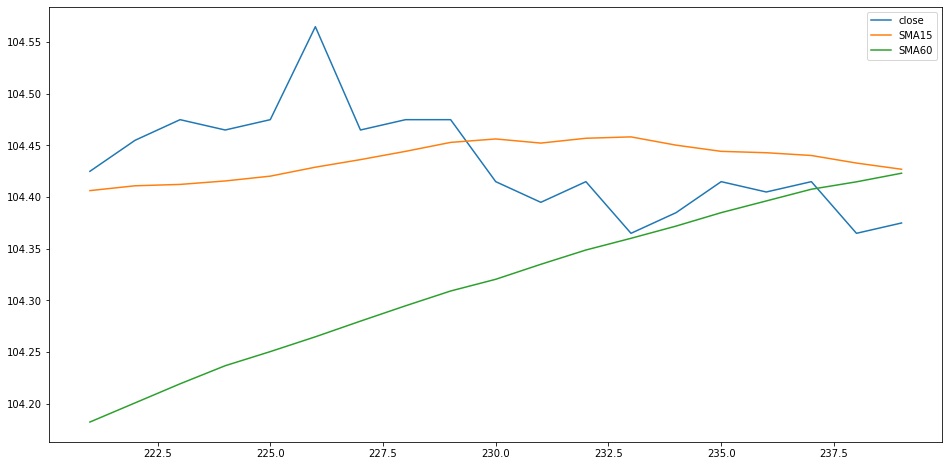

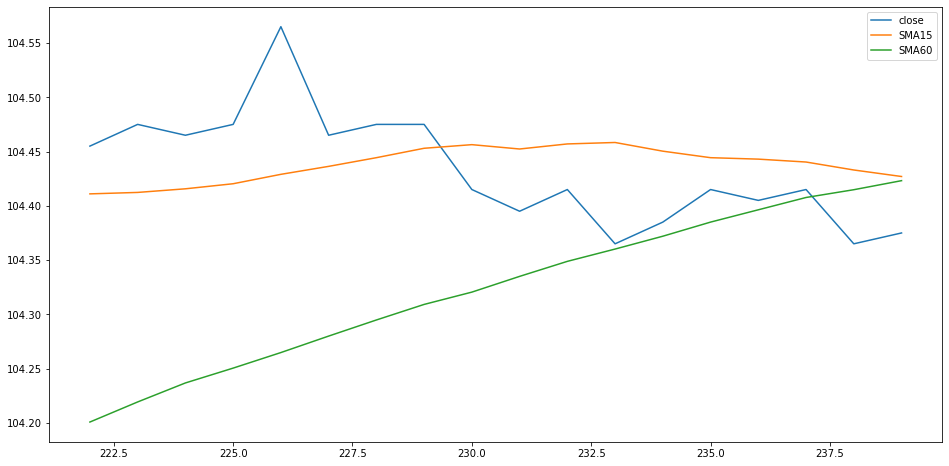

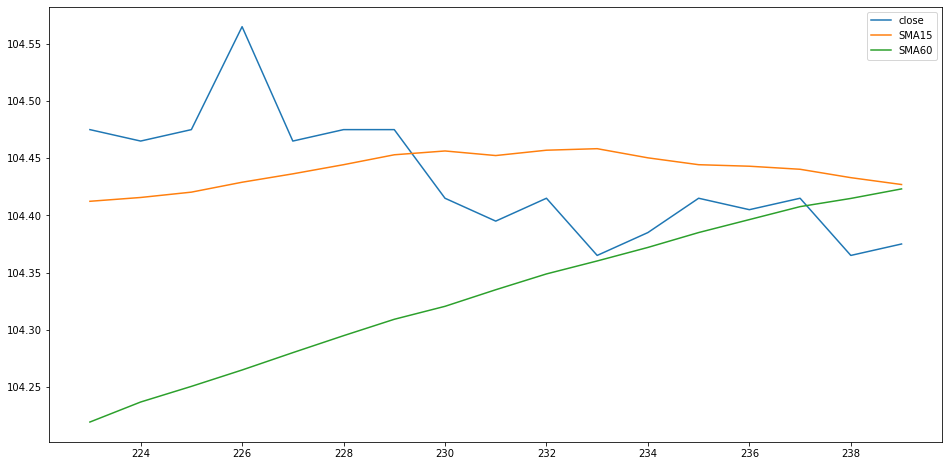

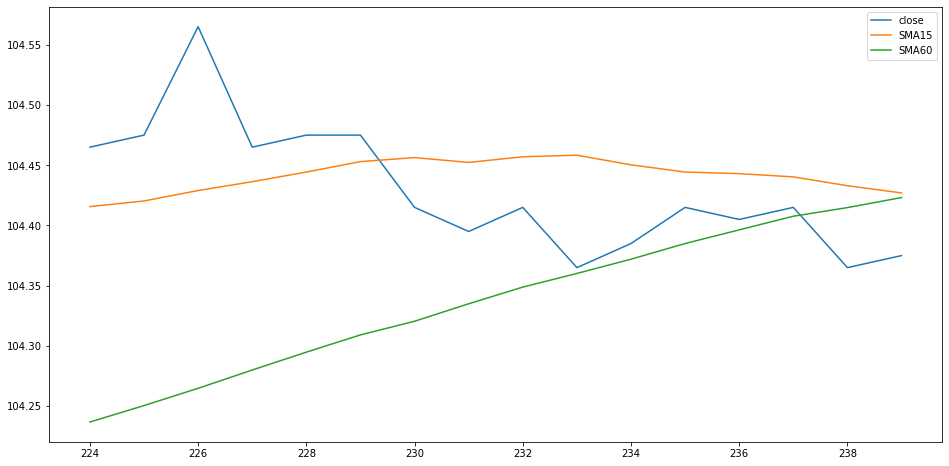

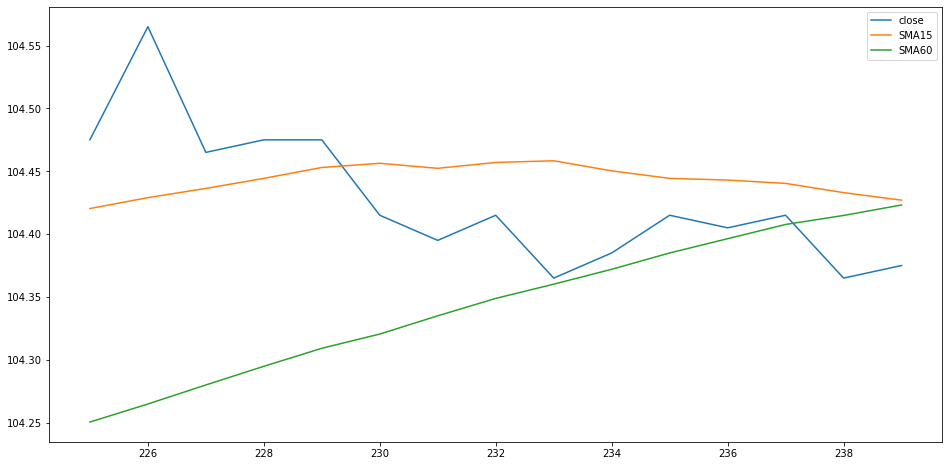

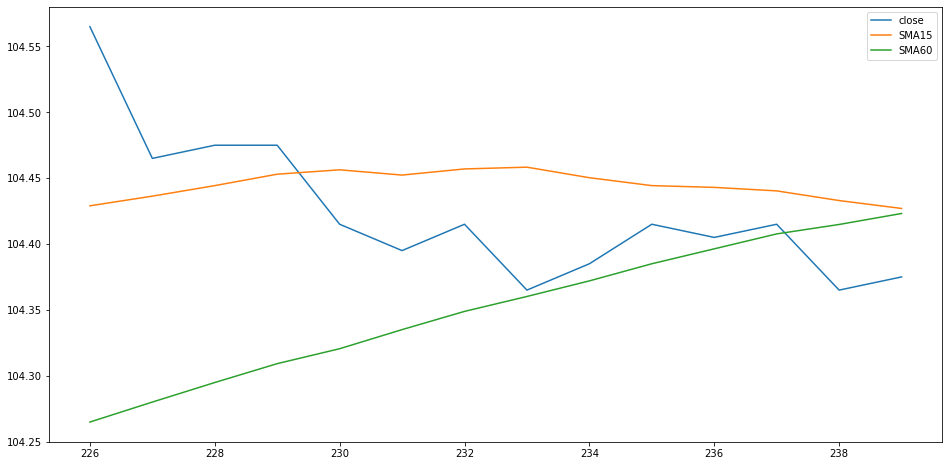

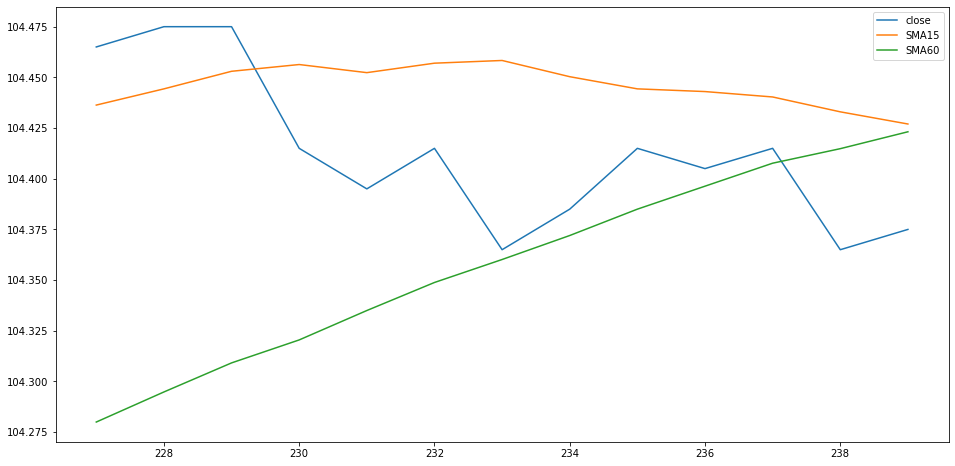

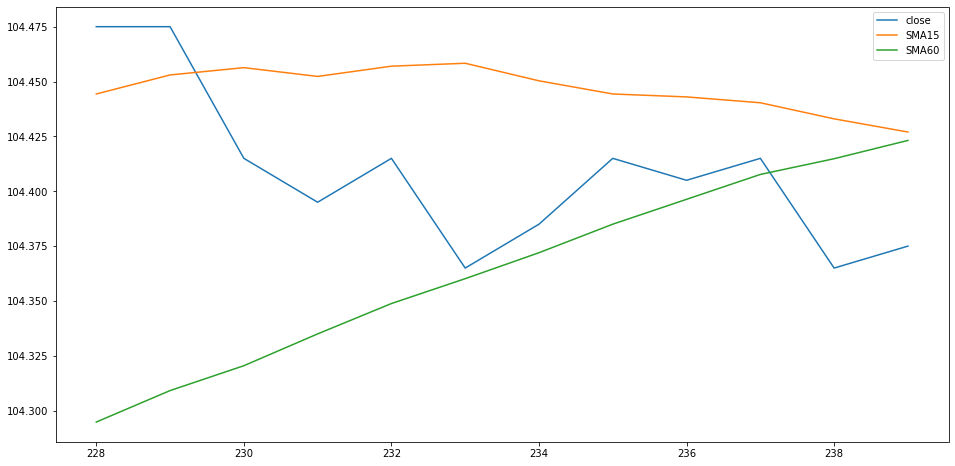

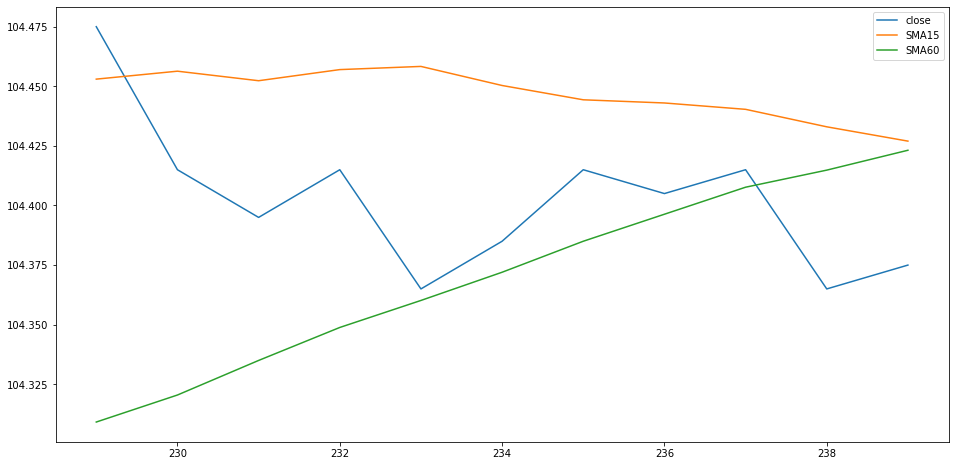

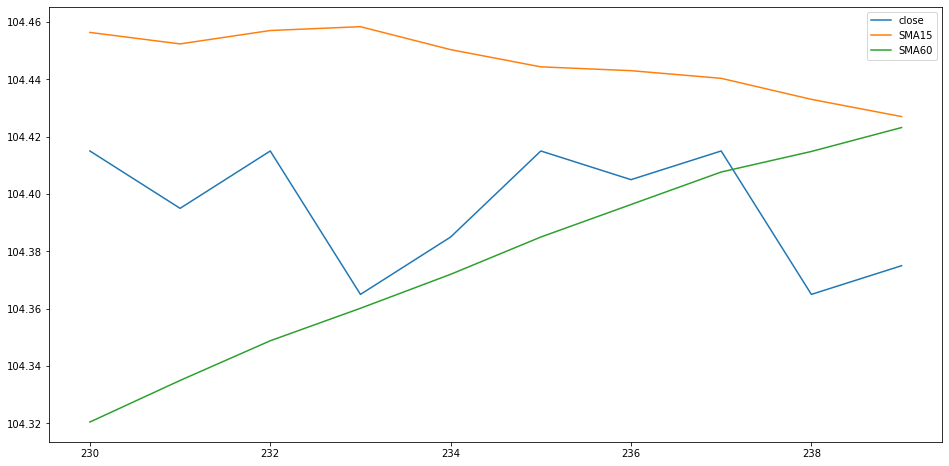

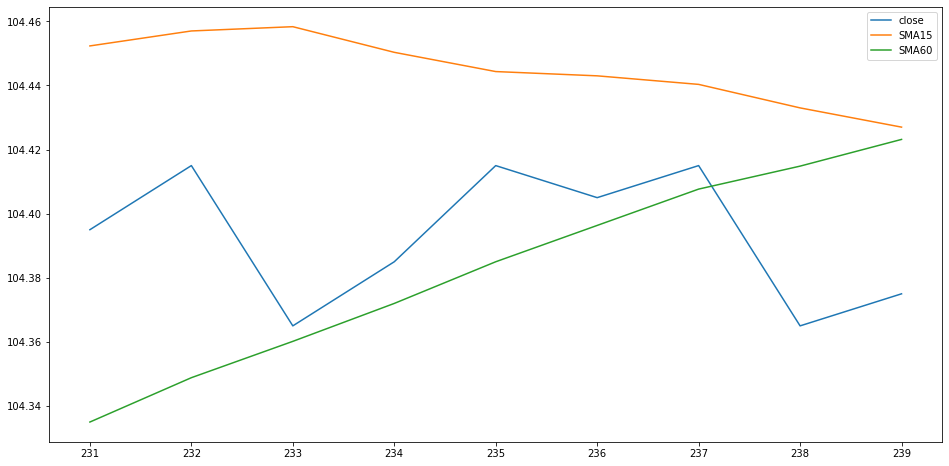

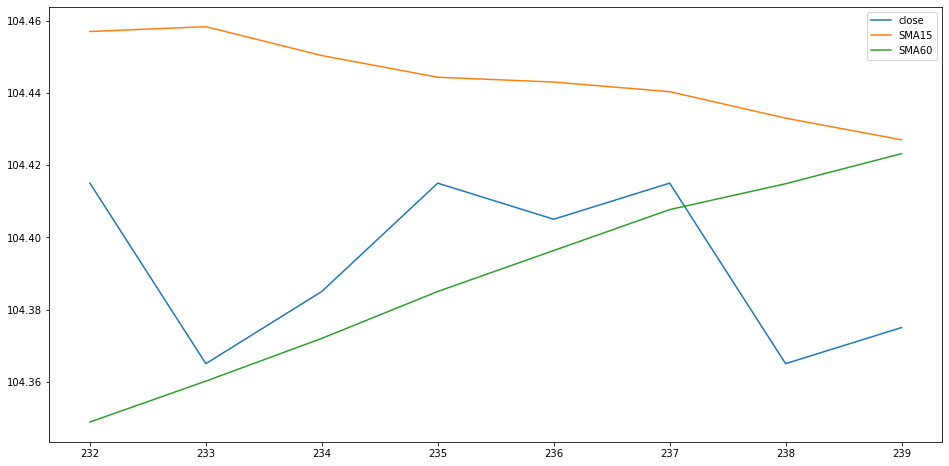

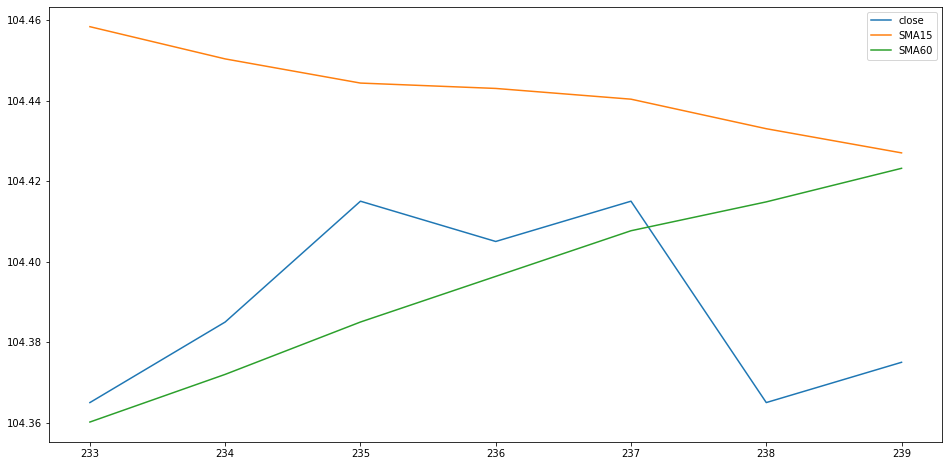

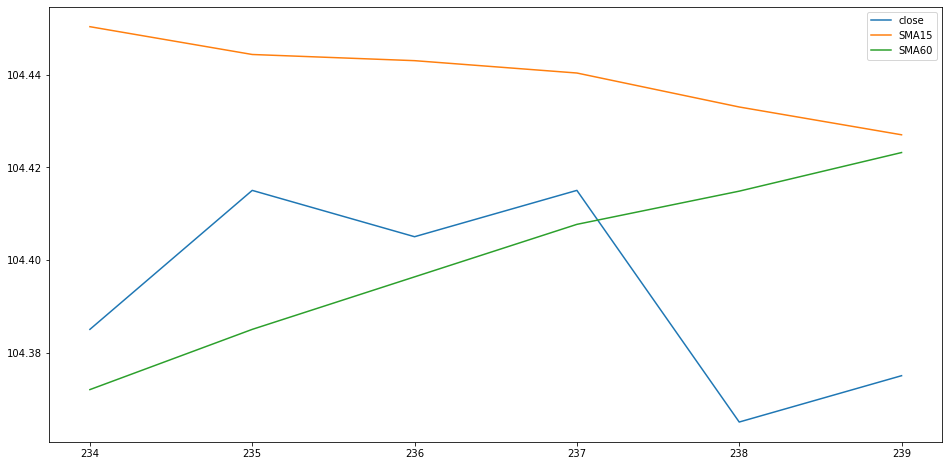

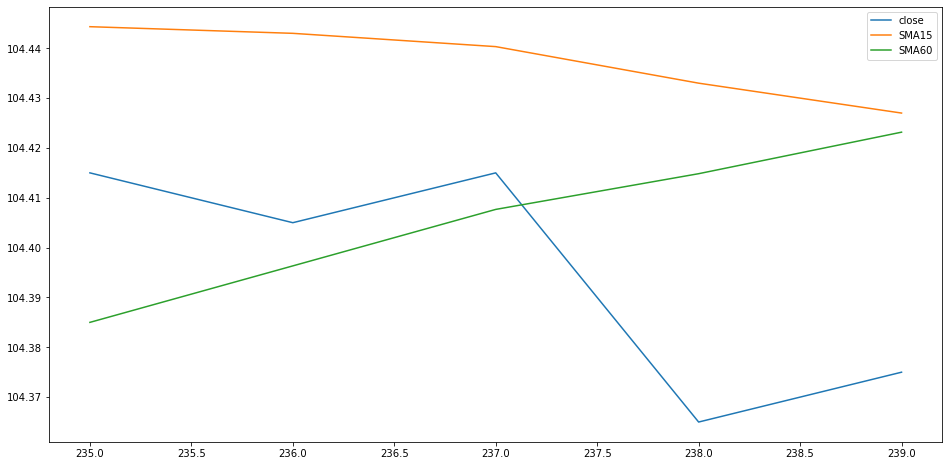

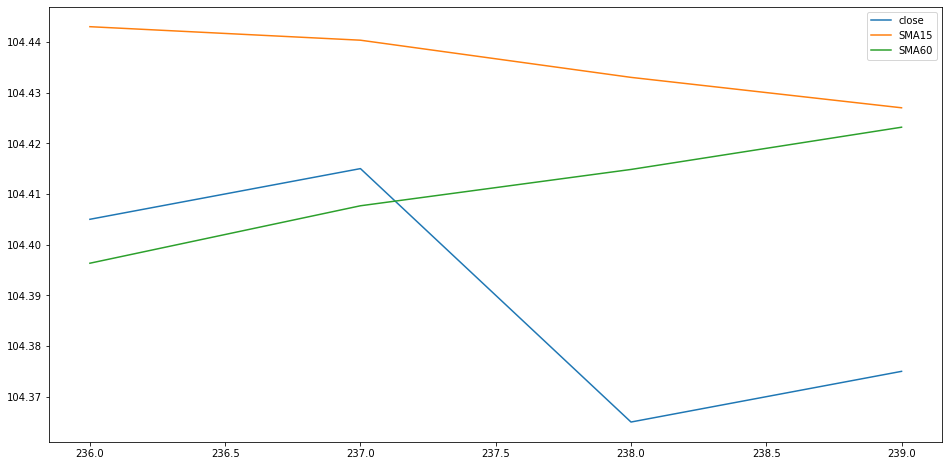

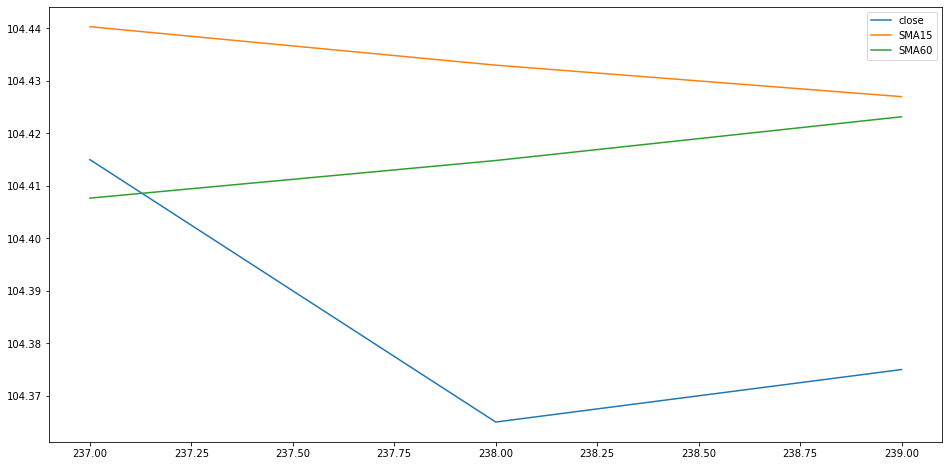

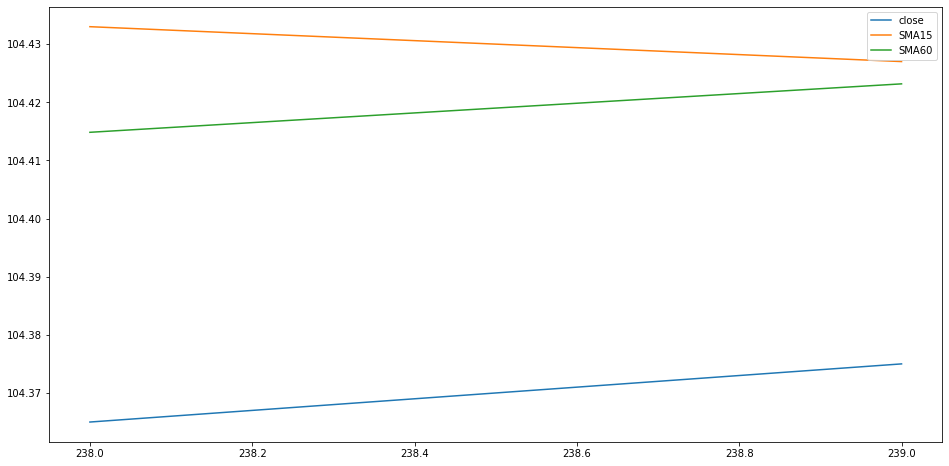

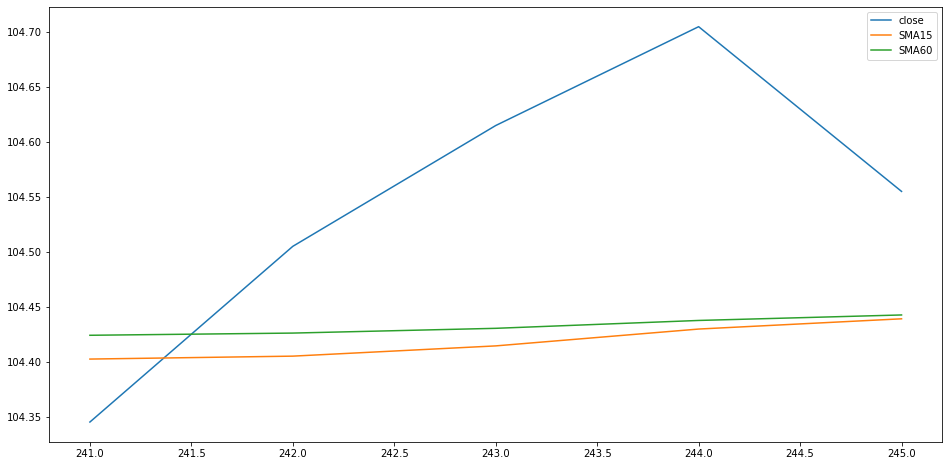

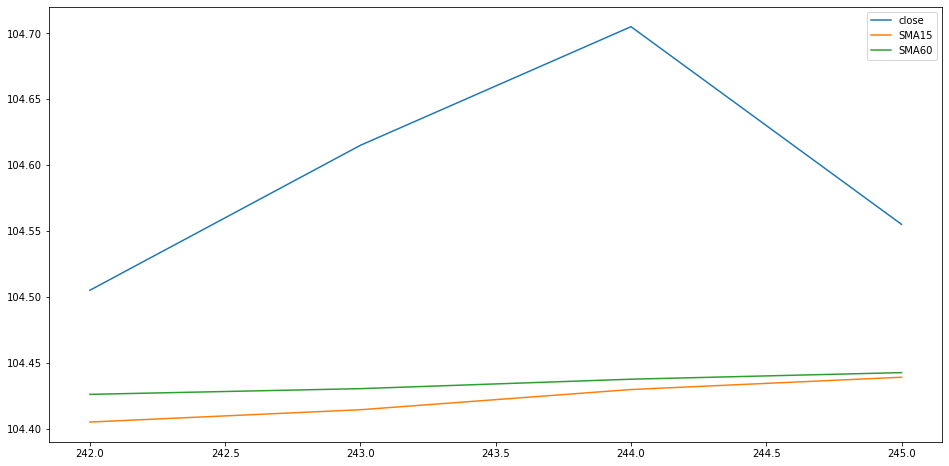

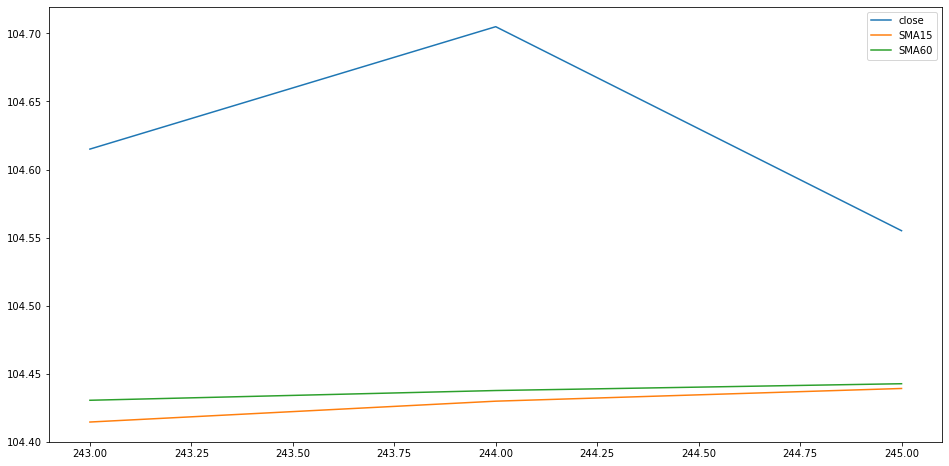

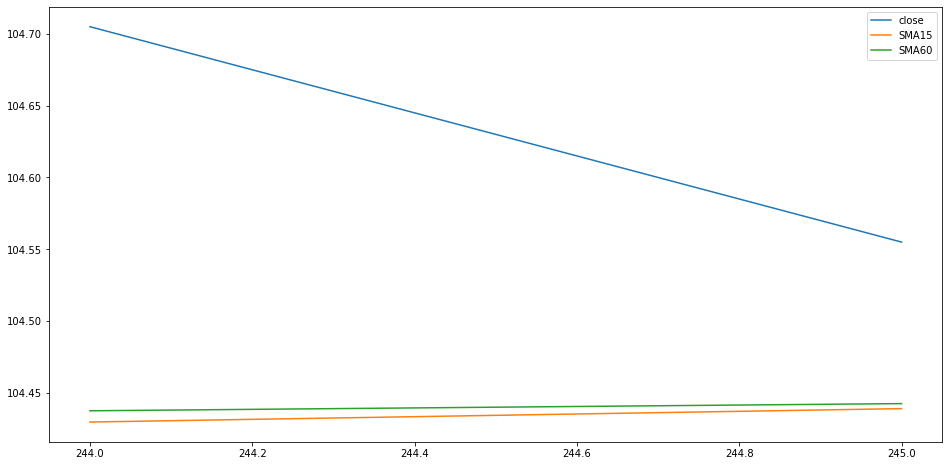

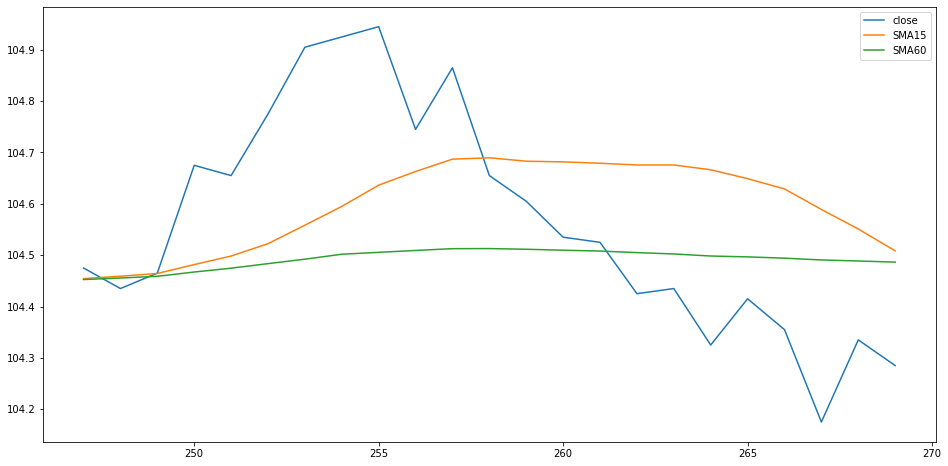

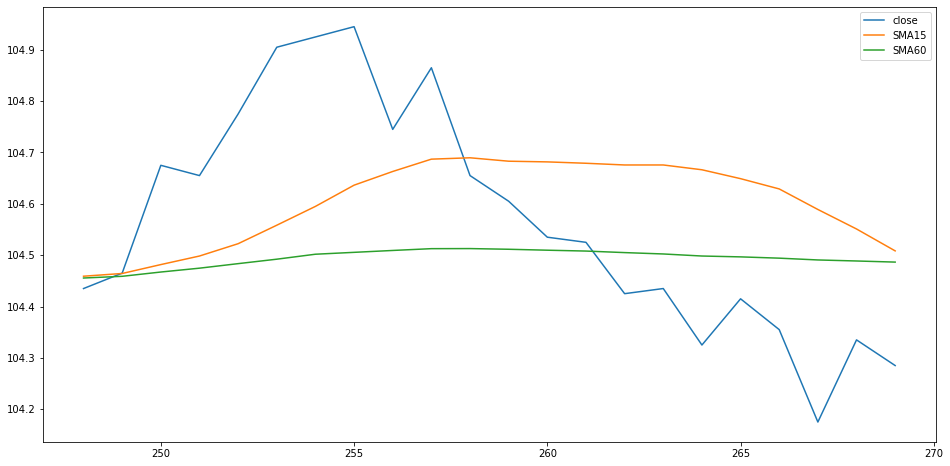

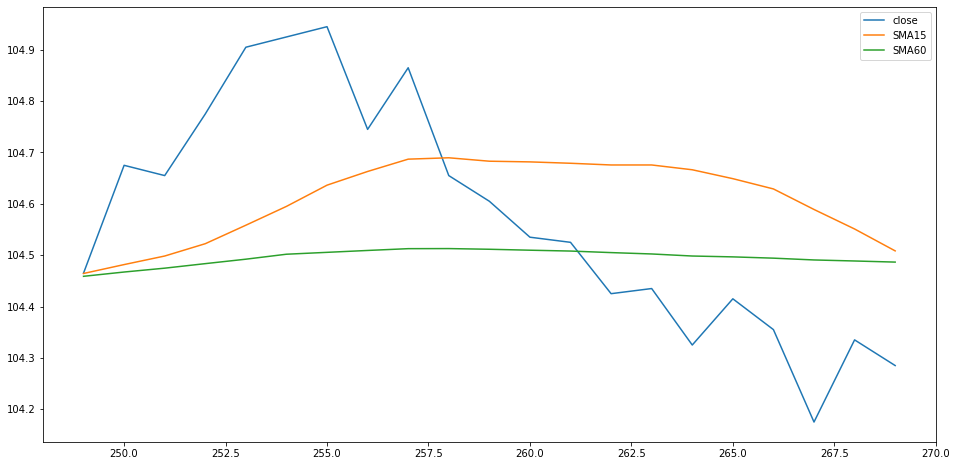

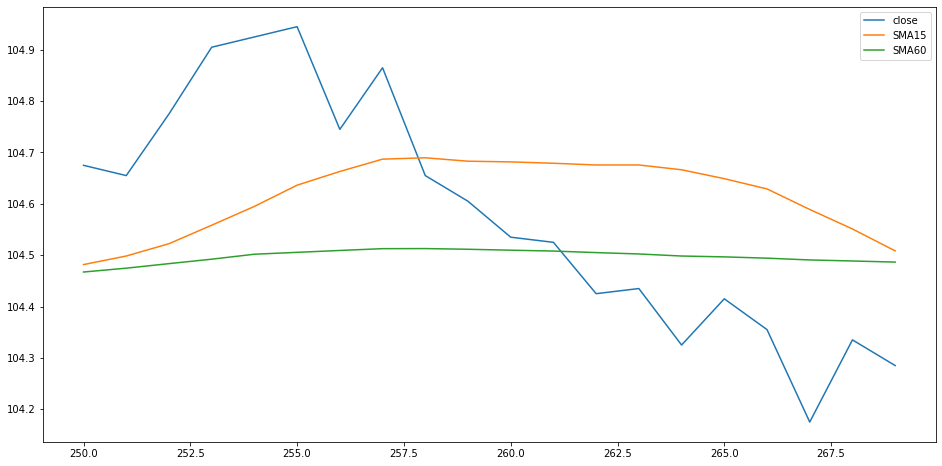

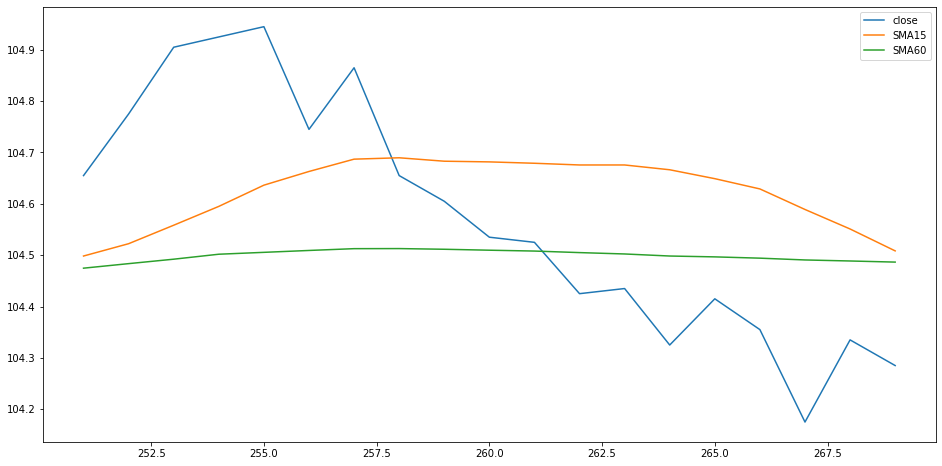

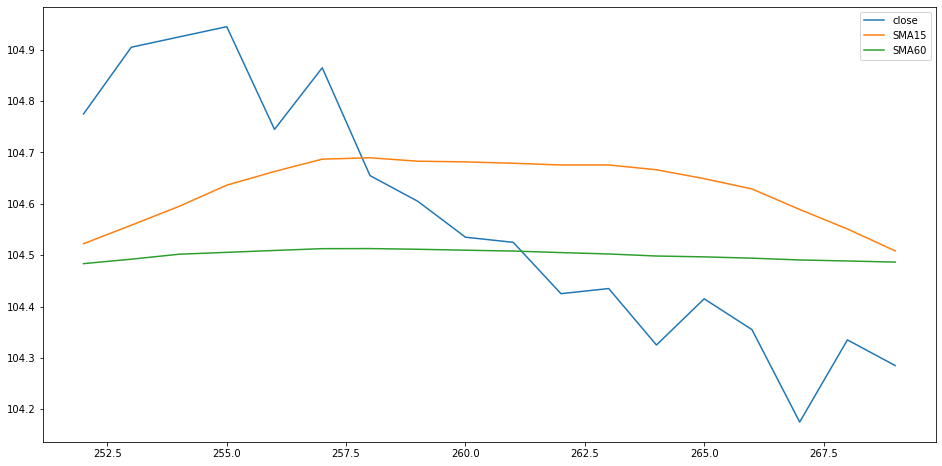

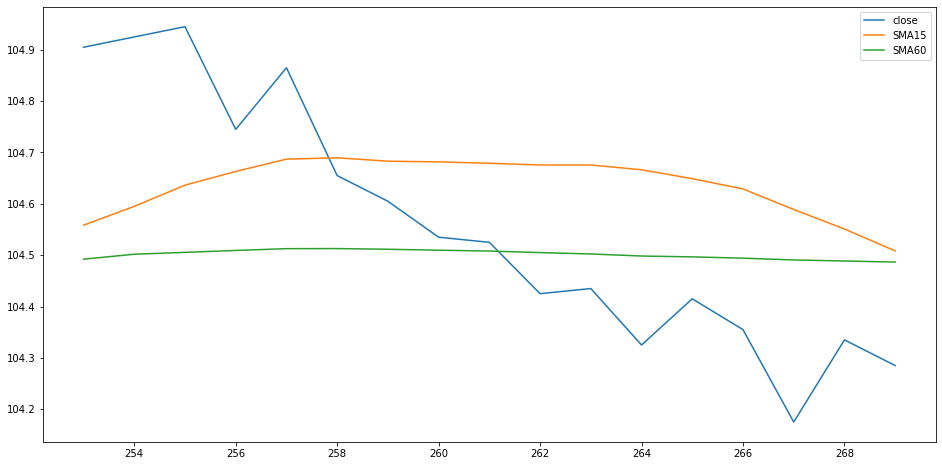

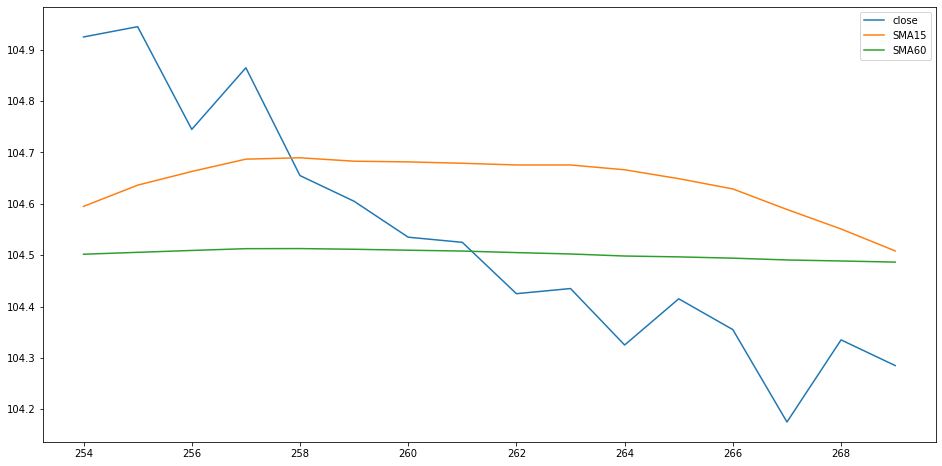

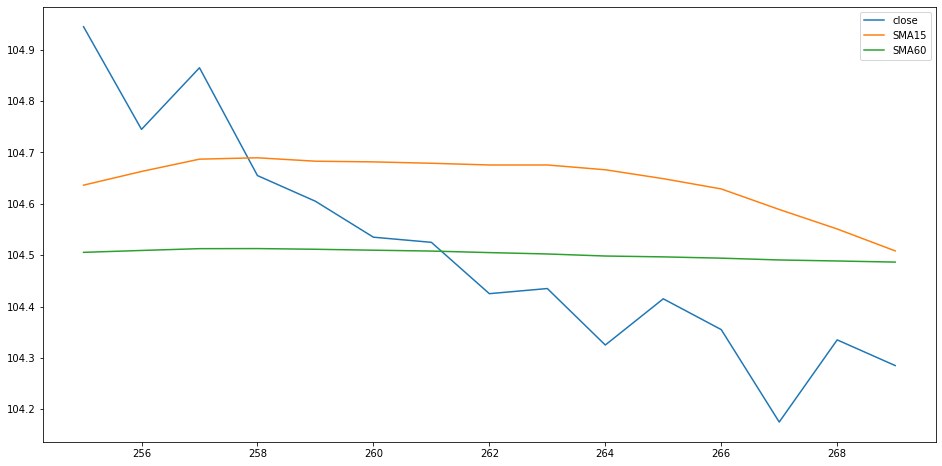

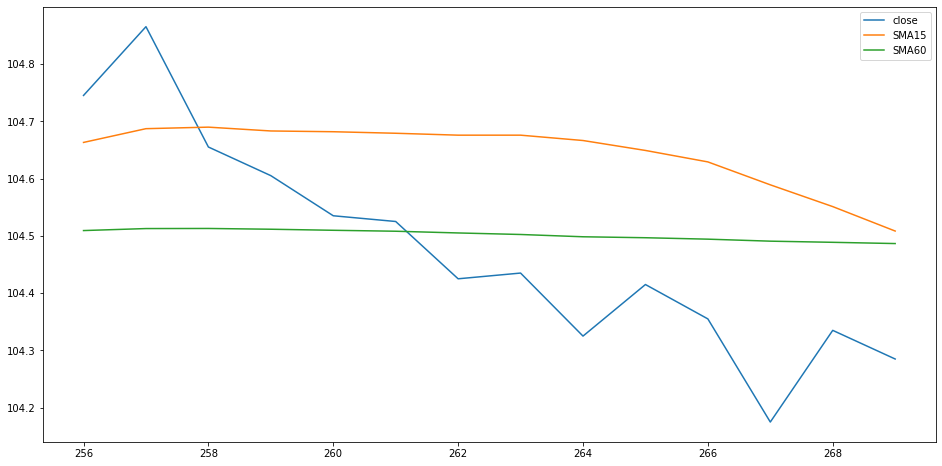

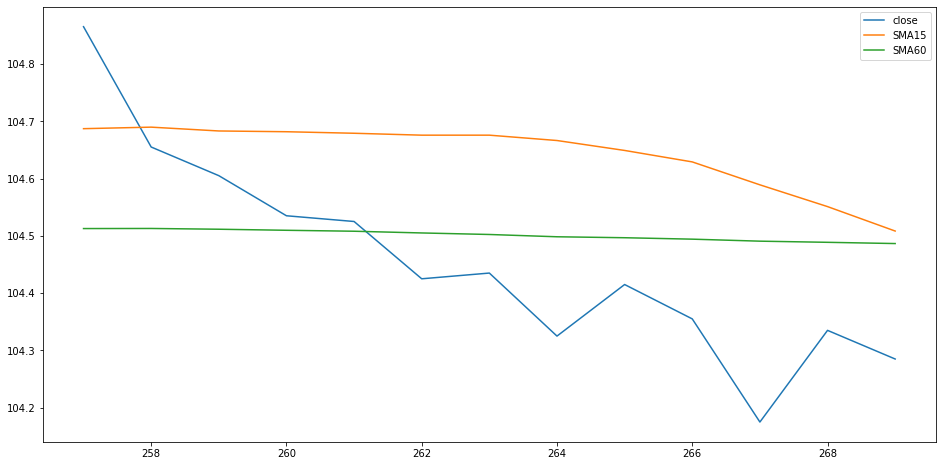

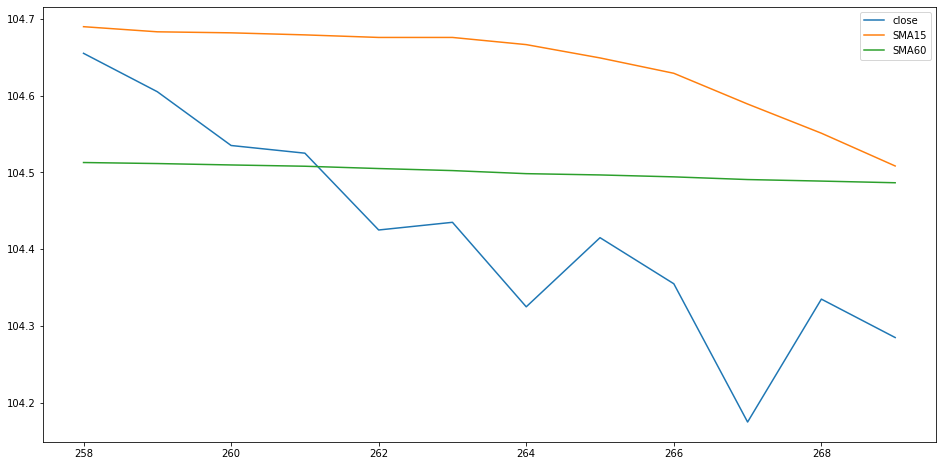

In [145]:
#visualize label no
import plotly.graph_objects as go
from datetime import datetime
from plotly.subplots import make_subplots

for i in range(0,200):
    if df.iloc[i]['label'] == 'no':
        w = 1
        while df.iloc[i+w]['label'] == 'no':
            w +=1
        dfpl_no = df[i:i+w+1]
        dfpl_no[['close', 'SMA15','SMA60']].plot(figsize=(16, 8))

In [136]:
file_name = ['NZD_USD_M15_2005_202206',
              'AUD_USD_M15_2005_202206',
              'EUR_USD_M15_2005_202206',
              'GBP_USD_M15_2005_202206',
              'USD_CAD_M15_2005_202206',
              'USD_CHF_M15_2005_202206',
              'AUD_CAD_M15_2005_202206'
            ]

small_win=15
big_win = 60

for i in range(len(file_name)):
    f = file_name[i]
    df = pd.read_csv(f'/Users/shenyan/desktop/capstone/Data_OANDA/{f}.csv', encoding='utf-8')
    df.reset_index(drop=True, inplace=True)    
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%dT%H:%M:%S.000000000Z')
    
    
    df['SMA15'] = df['close'].rolling(small_win).mean()
    df['SMA60'] = df['close'].rolling(big_win).mean()
    df.dropna(inplace=True)

    # Add columns to df and initialize their values
    df['label'] = 'no'
    df['angle'] = float(0)

    df['top line'] = df.apply(lambda x: 'SMA60' if x['SMA60'] > x['SMA15'] else 'SMA15', axis =1 )

    for i in range(len(df)):

        if (df.iloc[i]['top line'] == 'SMA15' and df.iloc[i-1]['top line']) == 'SMA60' or (df.iloc[i-1]['top line'] == 'SMA15' and df.iloc[i]['top line']=='SMA60'):
            df.iloc[i,7] ='yes'
        
            #angle formed by SMA15 and horizontal line
            a1= np.arctan(abs(df.iloc[i-1]['SMA15']-df.iloc[i]['SMA15']))*180/np.pi  
            #angle formed by SMA60 and horizontal line
            a2= np.arctan(abs(df.iloc[i]['SMA60']-df.iloc[i-1]['SMA15']))*180/np.pi
            #cross over angle =a1+a2
            df.iloc[i,8] =a1+a2

    df.to_excel("/Users/shenyan/desktop/" +f +"MA.xlsx",header=True,index=False)
